## Your First Machine Learning Model in the Cloud
* [tweet](https://twitter.com/romanorac/status/1379779339168980994?s=20)

In [1]:
import requests 
import bs4
import pandas as pd

In [2]:
url = "https://towardsdatascience.com/archive/2020/04/30" 
response = requests.get(url)
soup = bs4.BeautifulSoup(response.text, "html.parser")


In [9]:
class_stories_id = 'postArticle postArticle--short js-postArticle js-trackPostPresentation js-trackPostScrolls'
class_author_class = "postMetaInline postMetaInline-authorLockup ui-captionStrong u-flex1 u-noWrapWithEllipsis"

In [14]:
tag = soup.findAll("div", {"class": class_stories_id})[0] 
title = tag.find('h3').get_text()

'Deep Dive into Netflix’s Recommender System'

In [16]:
subtitle = tag.find('h4').get_text() 
subtitle


'How Netflix achieved 80% stream time\xa0through…'

In [17]:
df_stories = pd.DataFrame(columns=['title', 'subtitle', 'author', 'date', ' reading_time', 'claps'])

In [18]:
dates_list = pd.date_range('2017-05-01', '2020-04-30').astype(str).tolist() 
dates_list[:5]

['2017-05-01', '2017-05-02', '2017-05-03', '2017-05-04', '2017-05-05']

In [19]:
def parse_tag_element(tag, element): 
    try:
        story_title = tag.find(element).get_text() 
    except AttributeError:
        return None 
    return story_title

In [22]:
class_stories_id = 'postArticle postArticle--short js-postArticle js-trackPostPresentation js-trackPostScrolls'
class_author_class = "postMetaInline postMetaInline-authorLockup ui-captionStrong u-flex1 u-noWrapWithEllipsis"
for date in dates_list:
    date = date.replace('-', '/')
    url = "https://towardsdatascience.com/archive/%s" % date 
    print('Scrapping', url)
    response = requests.get(url)
    soup = bs4.BeautifulSoup(response.text, "html.parser")
    for i, tag in enumerate(soup.findAll("div", {"class": class_stories_id} ), 1):
        # parse story title
        story_title = ''
        for element in ['h3', 'h2']:
            title = parse_tag_element(tag, element) 
            if title is not None:
                story_title = title 
                break
        # parse story subtitle
        story_subtitle = ''
        for element in ['h4', 'p']:
            subtitle = parse_tag_element(tag, element) 
            if subtitle is not None:
                story_subtitle = subtitle 
                break
        author_tag = tag.find('div', {'class': class_author_class}) 
        author_name = author_tag.get_text(separator=',').split(',')[0] 
        reading_time = author_tag.find('span', {'class': 'readingTime'})['title']
        n_claps = tag.find(
            'span', {
            'class': 'u-relative u-background js-actionMultirecommendCount u-marginLeft5'
            }).get_text()
        row = {
            'title': story_title, 
            'subtitle': story_subtitle, 
            'author': author_name,
            'author': author_name, 
            'date': date,
            'reading_time': reading_time, 
            'claps': n_claps
        }
        df_stories = df_stories.append(row, ignore_index=True)
        print(i, story_title, story_subtitle, author_name, date, reading_time, n_claps)
    # save DataFrame in each iteration so that progress is not lost if somet hing breaks
    df_stories.to_csv('tds_stories.csv', index=False) 
    print()


Scrapping https://towardsdatascience.com/archive/2017/05/01
1 How to get started in NLP Somewhere I read that if you ever have to answer the same question twice, it’s probably a good idea to turn it… Melanie Tosik 2017/05/01 3 min read 2.1K
2 Data Cleaning Web Scraped Job Data Hi all, Michael Salmon 2017/05/01 7 min read 83
3 Reinforcement Learning : Its necessity and challenges Introduction: Ashis Samal 2017/05/01 3 min read 50
4 Tracking a self-driving car with high precision  Priya Dwivedi 2017/05/01 5 min read 57
5 A Mistake Most Humans Make In the first week of November, before the U.S. Presidential election, what would you have said the probability of a Clinton victory was? Matt Brems 2017/05/01 5 min read 20
6 The Challenge and Importance of Data Flow in Distributed IoT Systems  Bright Wolf 2017/05/01 3 min read 7
7 What does make America great? A scientist’s perspective  dj patil 2017/05/01 8 min read 26
8 Exploratory Analysis: Data Scientist Salaries Across the USA In my previ

1 Boosting algorithm: GBM This article continues the previous post Boosting algorithm: AdaBoost. This time we will turn to GBM (Gradient Boosting Machine). Jiangchun Li 2017/05/07 6 min read 594
2 Supervised, unsupervised and deep learning Machine learning is became, or is just be, an important branch of artificial… Claudio Masolo 2017/05/07 3 min read 150
3 Data is the New Oil Data has supplanted oil as the fuel for creating big business value Will Murphy 2017/05/07 4 min read 18
4 The “Cybersecurity Marketing Scam” that is contributing to Cyber-attacks MELBOURNE, AUSTRALIA… eVestigateSimonSmith 2017/05/07 7 min read 7
5 Deep Love: A Modern Love article generator The NYT has a weekly column called “Modern Love.” It’s a series of intensely personal essays about love in its myriad forms, selected from submissions from the general public. One story is of a crippling crush a woman has on the local bread baker, in… Ludi Rehak 2017/05/07 2 min read 82
6 Grant Gochnauer: Awesome Humans — Iss

1 What i have learned from the first term of Udacity Self driving car nanodegree program.  Hadi N. Abu-Snineh 2017/05/13 12 min read 206
2 My phone use in numbers and graphs Insights and visualizations from Moment app data Miha Gazvoda 2017/05/13 4 min read 61
3 My Cyberclone : Digitized Self #TBT My cyberclone #Trial 1. Loading Preeti… Sampreeti Bhattacharyya 2017/05/13 4 min read 13
4 Where is Artificial Intelligence hiding in Autonomous Cars ?  Krishna Sankar 2017/05/13 4 min read 9
5 How to grow data Data is a vital asset, but how do you grow it? There are four stages: buy, integrate… Edd Wilder-James 2017/05/13 4 min read 19
6 Weekly Selection Dear readers and contributors, TDS Editors 2017/05/13 3 min read 9
7 Why Do This? Do what? Writing. So What? mozz 2017/05/13 3 min read 6

Scrapping https://towardsdatascience.com/archive/2017/05/14
1 Boosting algorithm: XGBoost This article continues the previous post Boosting algorithm: GBM. This time we are going to discuss XGBoost! (Fina

1 How to calculate your company’s growth rate Whether your business is growing or not is an important fact, but understanding how… Outlier AI 2017/05/22 9 min read 104
2 Installing XGBoost on OSX Out project for this week was to work on an old kaggle competition (https://www.kaggle.com/c/predict-west-nile-virus). XGBoost has been used by many of the winners in past kaggle competitions, so we had high hopes that it would improve our results. While it didn’t improve our… Rowan Langford 2017/05/22 3 min read 42
3 What House of Cards Got Right (and Wrong) About Data Science  Matt Brems 2017/05/22 8 min read 40
4 Kaggle: Chicago West Nile Virus I just learned some frustrating lessons — compliments of the Kaggle West Nile Virus competition… Geoff Counihan 2017/05/22 7 min read 20
5 Why Your Data Scientist Can’t Turn Your IoT Data Into Gold Good Data Management Enables Better Data… Bright Wolf 2017/05/22 4 min read 7
6 My Last Week of General Assembly’s Data Science Boot Camp  Adi Bronshtein 

1 The Man in the Machine There is a common belief among the modern illumanati that if a computer can do what a man can do, then the machine must be intellegent in some sense. Of course what it means to be intellegent is never really defined. Patrick Coulton 2017/05/27 3 min read 54

Scrapping https://towardsdatascience.com/archive/2017/05/28
1 Are UUIDs really unique? UUID stands for universally unique identifier. It looks like a 32-character sequence of letters and numbers separated by dashes. Some examples: Ludi Rehak 2017/05/28 3 min read 1.2K
2 Is my Spotify music boring? An analysis involving music, data, and machine learning  Juan De Dios Santos 2017/05/28 10 min read 439
3 AI is Essentially “Artificial Perception” Human intelligence comes from an amazing duality of arriving at conclusions based on… Sharad Gandhi 2017/05/28 8 min read 71
4 Dissecting the NBA Draft  Abhijit Brahme 2017/05/28 7 min read 32
5 Demystifying Artificial Intelligence for Everyone Are sentient robots real

1 Useful Keras features Here is the summary of interesting features that I feel I will find useful to reference when I am building a deep learning pipeline a.k.a things I usually don’t remember. From Keras documentation at https://keras.io and other online posts. Manish Chablani 2017/06/03 10 min read 234
2 “Estimation and Inference of Heterogeneous Treatment Effects using Random Forests” paper review This article originally appeared on blog.zakjost.com Zak Jost 2017/06/03 7 min read 106
3 Building Speech Recognition Using Open Stack Speech recognition is the new UI and will bring a paradigm shift in how we interact with apps and machines. Saying “Turn off microwave”, “order my weekly supplies” is far more easier than using touch and click interfaces and (re)learning app… Vaibhav Aparimit 2017/06/03 3 min read 40
4 Do College Memories Get Better Over Time? Was college really that great or does it just seem that way… George L 2017/06/03 7 min read 29
5 The old, repackaged and re-branded

1 Deep learning weekly piece: the differences between AI, ML, and DL I wanted to step back a bit and put some of the terminology we frequently hear in context, namely “artificial intelligence” (AI), “machine learning” (ML), and “deep learning” (DL). What’s the difference between them? Ophir Samson 2017/06/10 3 min read 147
2 How Much Do People Spend On Haircuts? And do guys or girls spend more on their hair? George L 2017/06/10 5 min read 35
3 Structure and automated workflow for a machine learning project — part 2  Mateusz Bednarski 2017/06/10 7 min read 495
4 Can We Copy the Brain? A review of IEEE Spectrum Special Report: Can We Copy the Brain? Eugenio Culurciello 2017/06/10 15 min read 79
5 How I Tackled My First Kaggle Challenge Using Deep Learning — Part 1  Eddie Forson 2017/06/10 6 min read 155
6 my story with Deep Learning and Neural Networks — part I Note: Originally published onBlogger on November 25th, 2015. Eugenio Culurciello 2017/06/10 7 min read 47
7 Kur, Keras, and Tens

1 How to begin your own data science journey! Hey there , Shreyas Raghavan 2017/06/16 9 min read 684
2 Predicting the Venture Capital Landscape  Mitchell Reynolds 2017/06/16 7 min read 18
3 Precipitation with the InsightR R package One of the benefits of using the Insight API is the quality and resolution of the data… Lee Robb 2017/06/16 3 min read 12
4 Artificial Intelligence is going to change the future  Muhammad Anser 2017/06/16 5 min read 8
5 Weekly Selection  TDS Editors 2017/06/16 3 min read 12
6 A not normal man looking for an interesting number  Arnaldo Gunzi 2017/06/16 3 min read 6

Scrapping https://towardsdatascience.com/archive/2017/06/17
1 Create a model to predict house prices using Python Hey there , Shreyas Raghavan 2017/06/17 10 min read 1.3K
2 DeepClassifyML Week 2 Part 1 This post is a part of the series ‘Hasura Internship’ and covers setting up the development environment for the same. Check out Part 1 , Part 2 for the app idea and some Computer Vision and Neural N

1 Building a Real-Time Object Recognition App with Tensorflow and OpenCV In this article, I will walk through the steps how you can easily build your own real-time object recognition application with Tensorflow’s (TF) new Object Detection API and OpenCV in Python 3 (specifically… Dat Tran 2017/06/22 4 min read 5.6K
2 6 ways people are making money with machine learning  Aaron Edell 2017/06/22 5 min read 293
3 Ethics in Machine Learning The ethics of how a Machine Learning (ML) or an Artificially Intelligent (AI) system is to function is a common thought that arises when we read about significant advancements in those fields. Will this sentience take over humanity? Or will it help us reach a Utopian era? It’s… Apara Venkateswaran 2017/06/22 5 min read 125
4 Steering Self Driving Car without LIDAR Self driving cars use a variety of techniques to detect their surroundings, such as radar, laser light, GPS, odometry, and computer vision. Sensory information is used to identify navigation pa

1 Multi-Layer Neural Networks with Sigmoid Function— Deep Learning for Rookies (2)  Nahua Kang 2017/06/27 15 min read 2.1K
2 How to Hire an AI Consultant So, you know you need some machine learning/AI development. Why not just do it yourself? Well, the short answer is that specialists have more experience than generalists, and can therefore reduce your risk and effort. The longer answer is about knowing where the land mines are… Daniel Shapiro 2017/06/27 11 min read 261
3 GAN — Introduction and Implementation — PART1: Implement a simple GAN in TF for MNIST handwritten digit generation The idea behind GANs is that you have two networks, a generator GG and a discriminator DD, competing against each other. The generator… Manish Chablani 2017/06/27 5 min read 388
4 Deep learning drops : breaking captcha After browsing some sites I found a captcha like this one: Felipe Salvatore 2017/06/27 4 min read 73
5 The truth about Bayesian priors and overfitting  Michael Green 2017/06/27 7 min read 1

1 Face2face — A Pix2Pix demo that mimics the facial expression of the German chancellor Inspired by one of Gene Kogan’s workshop, I created my own face2face demo that translates my webcam image into the German chancellor when giving her New Year’s speech in 2017. It’s not… Dat Tran 2017/07/04 7 min read 607
2 Water Pumps maintenance prediction : data-science illustrated  m.zaradzki 2017/07/04 9 min read 161
3 Natural Language Processing with Quora After using word embeddings in a recommender system, I now want to use these embeddings to create a natural language processing neural network. Gabriel Tseng 2017/07/04 7 min read 82
4 Machine Intelligence Summit 2017 Overview of #reworkMI in Amsterdam Neal Lathia 2017/07/04 6 min read 39
5 Spurious Statistical Significance: Why a large Design of Experiment could be dangerous  Tirthajyoti Sarkar 2017/07/04 4 min read 9
6 July Edition: Taking a deep dive into ML applications 5 Articles To Explore today’s ML applications TDS Editors 2017/07/04 

1 Image Augmentation for Deep Learning using Keras and Histogram Equalization  Ryan Allred 2017/07/11 8 min read 1.3K
2 Is Google Tensorflow Object Detection API the easiest way to implement image recognition? Doing cool things with data! Priya Dwivedi 2017/07/11 4 min read 3.4K
3 Memory, attention, sequences We have seen the rise and success of categorization neural networks. The next big step in neural network is… Eugenio Culurciello 2017/07/11 6 min read 1K
4 From classic AI techniques to Deep Reinforcement Learning  Felipe Sanchez 2017/07/11 11 min read 791
5 Where to invest in Radiology AI As we reach the peak of the hype curve surrounding AI and its impact on the field of radiology, it’s… Hugh Harvey 2017/07/11 8 min read 257
6 A metallurgical scientist’s approach to predicting NBA team success  Peter Tsai 2017/07/11 12 min read 43
7 Social networks, terrorism, and data privacy I’m trying to start a new little project to help me keep up with the general… Hadayat Seddiqi 2017/07/1

1 How to train Tensorflow models Using GPUs DeviceHive 2017/07/18 5 min read 413
2 Big Data Analytics: Its Technologies and Tools  Maruti Techlabs 2017/07/18 5 min read 109
3 Analyzing & Visualizing Terrorist Attacks in Pakistan & India (2002–2015)  Umer Mahasin 2017/07/18 7 min read 70
4 Microsoft Azure Machine Learning Let me start by What is Machine Learning. Well, this is the world in this world we have humans and computers. We humans learn from past experiences whereas computer learns by following instruction which… Adesh Shah 2017/07/18 6 min read 119
5 Describe A Time You Failed Job interviewing can generally be an awkward process. You’re nervous, you need to seem personal yet professional, and you need to sell yourself as an awesome product while not being cocky. What makes it more awkward is when the interviewer probes you about your weaknesses. The… Brendan Bailey 2017/07/18 3 min read 14
6 Observations from Census Data For a while, I’ve wanted to try doing some basic data an

1 Machine Learning, NLP: Text Classification using scikit-learn, python and NLTK.  Javed Shaikh 2017/07/23 7 min read 6.1K
2 Ethics in Web Scraping We all scrape web data. Well, those of us who work with data do. Data scientists, marketers, data journalists, and the data curious alike. Lately, I’ve been thinking more about the ethics of the practice and have been dissatisfied by the lack of consensus on the topic. James Densmore 2017/07/23 3 min read 415
3 Neural Networks: a Mixture of Experts with Attention A Mixture of Experts (MoE) is a special type of neural network: neurons are connected in many small clusters, and each cluster is only active under special circumstances. Lower layers of the network extract features, and experts are… Anthony Repetto 2017/07/23 4 min read 135
4 Experiments with the CM1K Neural Net Chip In March 2017 I received funding from the MIT Sandbox program to build a product using… Noah Moroze 2017/07/23 11 min read 135
5 Artificial Intelligence: Understandin

1 How to train your own Object Detector with TensorFlow’s Object Detector API  Dat Tran 2017/07/28 8 min read 9.5K
2 DIY AI: An old school matrix NN How do NN work and how to create and train NN like many years ago. Part of DIY AI series. Andrew Tch 2017/07/28 10 min read 432
3 Neural Networks: Problems & Solutions Though the concept of artificial neural network has been in existence since the 1950s, it’s only recently that we have capable hardware to turn theory into practice. Neural networks are supposed to be able to mimic any continuous function. But many a times we are… Sayan Sinha 2017/07/28 8 min read 150
4 Exploring the census income dataset using bubble plot  Shir Meir Lador 2017/07/28 6 min read 214
5 Visualising temperatures in Amsterdam as a heatmap in R — Part II  Deepak Gulati 2017/07/28 4 min read 27
6 When not to use Deep Learning ? or A More Liberal Approach to Software Design Nishant Sinha 2017/07/28 4 min read 21
7 Here’s what I learned from writing, coding and desig

1 Sentiment Analysis of Transliterated Texts in Hindi and Marathi Languages Why mix-code sentiment… Mohammed Arshad Ansari 2017/08/03 4 min read 46
2 Political Partisanship: A look at the data Conventional wisdom says that the age of Trump is the most politically polarized time… Akhil Jalan 2017/08/03 4 min read 70
3 12 situations data scientists will totally relate to  Ramesh Ilangovan 2017/08/03 6 min read 105
4 High Resolution Weather Data with R One of the pain points we run into at WeatherDecTech is customers that need bulk weather data but… Lee Robb 2017/08/03 2 min read 35

Scrapping https://towardsdatascience.com/archive/2017/08/04
1 The mostly complete chart of Neural Networks, explained  Andrew Tch 2017/08/04 11 min read 5.9K
2 A Gentle Introduction To Neural Networks Series — Part 1  David Fumo 2017/08/04 8 min read 1K
3 Deep Learning with Tensorflow: Part 3 — Music and text generation  Matteo Kofler 2017/08/04 7 min read 638
4 How to Price an AI Project I have been asked ma

1 Language Models: Spellchecking and Autocorrection “Anyone who can only think of one way to spell a word obviously lacks imagination.” — Mark Twain Sanket Patil 2017/08/10 12 min read 296
2 A Dummies’ Intro to Bioinformatics The word Bioinformatics is making quite a turnaround in today’s world of Science. The word seems to… Vijini Mallawaarachchi 2017/08/10 5 min read 774
3 Attention models in NLP a quick introduction Credits: Here is abridged version of wildml article: http://www.wildml.com/2016/01/attention-and-memory-in-deep-learning-and-nlp/ Manish Chablani 2017/08/10 5 min read 190
4 The Present and Future of Quantum Computing for AI Quantum computing is still in it’s infancy, and no universal architecture for quantum computers exists right now. However, their prototypes are already here and showing promising results in cryptography, logistics, modelling and optimization… Egor Dezhic 2017/08/10 3 min read 795
5 The Complete Guide on Learning Deep Learning The rise of artificial i

1 CycleGANS and Pix2Pix Credits: Presenting abridged version of these blogs to explain the idea and concepts behind pix2pix and cycleGANs. Manish Chablani 2017/08/15 6 min read 550
2 Handwritten digit recognition with MNIST on iOS with Keras  Eridy Lukau 2017/08/15 9 min read 173
3 Random Forest Learning-Essential Understanding  Ramraj Chandradevan 2017/08/15 6 min read 49
4 Deep learning and machine learning 14 Jul 2015 Humphrey Sheil 2017/08/15 14 min read 11
5 AI + eSports: Thoughts on the Future eSports is the new frontier for AI companies like DeepMind and… Arkin Dharawat 2017/08/15 4 min read 22
6 Differentiable Neural Computers (DNCs) — Nature article thoughts 17 Oct 2016 Humphrey Sheil 2017/08/15 5 min read 73
7 Digital Economics Let’s take a quick look at what digital economics is all about, and how it impacts both organizations and markets…. Lee Schlenker 2017/08/15 3 min read 20
8 How to make devices smart Using Machine Learning algorithms, Amazon Alexa and DeviceHive Device

1 YOLO — You only look once, real time object detection explained  Manish Chablani 2017/08/21 8 min read 1.91K
2 Linear Regression in Python In linear regression, you are attempting to build a model that allows you to predict the value of new data, given the training data used to train your model. This will become clear as we work through this post. Dannar Mawardi 2017/08/21 4 min read 456
3 [Lecture] How to build a recognition system (Part 1): best practices  Supervise.ly 2017/08/21 2 min read 342
4 [Lecture] Evolution: from vanilla RNN to GRU & LSTMs  Supervise.ly 2017/08/21 1 min read 217
5 Artificial intelligence: what it is and how the technology can be used in a business environment  IQUII 2017/08/21 8 min read 75
6 COUNTLESS — High Performance 2x Downsampling of Labeled Images Using Python and Numpy  William Silversmith 2017/08/21 16 min read 157
7 Curated list Machine Learning and NLP resources for healthcare UPDATE 12/20/2017 This article will longer be updated as I’m moving t

1 DenseNet Many papers: Manish Chablani 2017/08/25 12 min read 587
2 Sizing Up: Market Sizing for Your Business Do you know your market size? Knowing market size can help you figure out how big is your business relative to the market, and how much potential it has. Here’s… Outlier AI 2017/08/25 8 min read 484
3 Self Driving Cars, The Most Hyped Thing Since…The Segway? How to Accelerate Our Autonomous Future Michael Guo 2017/08/25 8 min read 725
4 Big Data will be biased, if we let it How data may be discriminating you Federica Pelzel 2017/08/25 7 min read 541
5 CDN — Content Delivery Networks What, Why and How? Anuradha Wickramarachchi 2017/08/25 3 min read 192
6 GSoC-2017 : Working on Anomaly Detection at CERN-HSF  Vyom Sharma 2017/08/25 8 min read 90
7  Why Bother to Bootstrap Your AI Startup? Daniel Shapiro 2017/08/25 6 min read 88
8 Data Visualization with D3.js & Dimple Friday Open Sourcery Training: Volume# 9 Alex Wilson 2017/08/25 4 min read 101
9 Creative Artificial Intelligenc

1 The 7 Steps of Machine Learning From detecting skin cancer, to sorting cucumbers, to detecting escalators in need of repairs, machine… Yufeng G 2017/08/31 9 min read 2.7K
2 DNA Sequence Data Analysis — Starting off in Bioinformatics  Vijini Mallawaarachchi 2017/08/31 5 min read 682
3 Humanities Graduates Should Consider Data Science  Carson Forter 2017/08/31 5 min read 641
4 What it Means to “Do” Math in Data Science As the next generation of eager youth look to make their first major career choice… Sean McClure 2017/08/31 6 min read 201
5 Which European Countries are Overrun with Tourists? A Data Story Which countries in Europe have… David Peterson 2017/08/31 6 min read 50
6 DIY (Part 1): How to Create Your Own .NET Bot You’ve heard a lot of buzz about bots, artificial intelligence, and machine… Oleg Romanyuk 2017/08/31 7 min read 74
7 A Deep Dive into The Internet of Things On reading “Analytics for the Internet of Things (IoT)” by Andrew Minteer Eric van Rees 2017/08/31 5 min read

1 Activation Functions in Neural Networks Sigmoid, tanh, Softmax, ReLU, Leaky ReLU EXPLAINED !!! SAGAR SHARMA 2017/09/06 5 min read 11.8K
2 Python Speed Test: 5 Methods To Remove The ‘$’ From Your Data in Python  Chaim Gluck 2017/09/06 5 min read 452
3 Linear Regression “An approximate answer to the right problem is worth a good deal more than an exact answer to an approximate problem.” — John Tukey Parag Radke 2017/09/06 3 min read 329
4 The Simply Deep, Yet Convoluted World of Supervised vs Unsupervised Learning  Jason Roell 2017/09/06 5 min read 85
5 Elements of a Data Scientist’s Salary My favorite part about my General Assembly experience thus far has been the web scraping… Andres Gonzalez 2017/09/06 4 min read 14

Scrapping https://towardsdatascience.com/archive/2017/09/07
1 Linear Regression Using Gradient Descent in 10 Lines of Code My goal is to eventually write out articles like this for other optimization techniques. Let’s start with gradient descent. Note: This isn’t a comp

1 A Brief Overview of Outlier Detection Techniques What are outliers and how to deal with them? Sergio Santoyo 2017/09/12 9 min read 2.7K
2 How To Ace Data Science Interviews: SQL This is part of an ongoing series on interviewing for data science roles. You can check… Carson Forter 2017/09/12 9 min read 2.7K
3 Data Science Jobs for Computer Science Students, Grads, and Software Engineers  BrainStation 2017/09/12 6 min read 116
4 How Organizations gain from a Technology driven Big Data strategy?  Maruti Techlabs 2017/09/12 4 min read 49
5 Future-Proof Your Startup: Data Network Effects in Healthcare  Mason Hall 2017/09/12 3 min read 108
6 Distributional semantics — Reading between the lines The human language is constantly evolving but these changes often go unnoticed while it’s happening. However, if you were to take an article or piece of literature from a few decades or century ago, you would surely notice the change in… Meyyappan MeenakshiSundaram 2017/09/12 2 min read 12
7 Mining t

1 ConvNets Series. Spatial Transformer Networks In this post, we see inner working of one of the… Kirill Danilyuk 2017/09/19 11 min read 800
2 Neural Networks: Is Your Brain Like A Computer?  Shamli Prakash 2017/09/19 5 min read 251
3 Artificial Intelligence: Get your users to label your data I wanted to call this article “Parasitic Labeling of AI Training Data,” but apparently that’s too complicated. What I want to tell you about is an often neglected aspect of machine learning: data labeling. Daniel Shapiro 2017/09/19 4 min read 842
4 Fake News Classifier (using LSTMs) This lesson is part of the lessons offered by DeepSchool.io. We use Deep Learning (Recurrent Neural… Sachin Abeywardana 2017/09/19 2 min read 219
5 Predicting Web Traffic on Wikipedia  Shubhankar Srivastava 2017/09/19 6 min read 96
6 How we visualize data at Amino A behind-the-scenes look at our data visualization process, plus how… Sohan Murthy 2017/09/19 10 min read 38
7 Is Your Organization Ready for Advanced Analyt

1 A Gentle Introduction on Market Basket Analysis — Association Rules Introduction Susan Li 2017/09/25 6 min read 1.5K
2 Solving the Multi-Armed Bandit Problem The multi-armed bandit problem is a classic reinforcement learning example where we are… Anson Wong 2017/09/25 6 min read 1K
3 PyTorch tutorial distilled Migrating from TensorFlow to PyTorch Illarion Khlestov 2017/09/25 7 min read 1.8K
4 DeepSchool.io: Deep Learning Learning DeepSchool.io is an open-source, community based project to teach the A-Z of Deep Learning… Sachin Abeywardana 2017/09/25 2 min read 449
5 A Year in Computer Vision — Part 3 of 4 — Part Three: Toward a 3D understanding of the world MTank 2017/09/25 19 min read 77
6 Sequence to Sequence Learning In Sequence to Sequence Learning, RNN is trained to map an input sequence to an output sequence which is… Pranoy Radhakrishnan 2017/09/25 1 min read 135
7 Soft Skills are the Decisive Factor in Hiring Great Data Scientists  Sean McClure 2017/09/25 4 min read 257
8 Pre

1 Deep Learning in Finance I am writing this post as a follow up on a talk by the same name given at Re-work Deep Learning Summit, Singapore… Sonam Srivastava 2017/09/30 5 min read 3.2K
2 [Learning Note] Dropout in Recurrent Networks — Part 2 Recurrent Dropout Implementations in Keras and PyTorch Ceshine Lee 2017/09/30 6 min read 111
3 Three Schools of Thought on Decision Analysis And none of the three is predictive analytics Paul Simpson 2017/09/30 7 min read 1
4 How can data spur innovation? If management is about reducing risk, uncertainty and ambiguity; data science is about transforming data… Lee Schlenker 2017/09/30 3 min read 37

Scrapping https://towardsdatascience.com/archive/2017/10/01
1 Jupyter Data Science Stack + Docker in under 15 minutes Motivation: Say you want to play around with some cool data science libraries in Python or R but what you don’t want to do is spend hours on installing Python or R, working out what libraries you need, installing each and every one… Tanb

1 The YCombinator application procedure or How we almost made it — part 2 (of 2)  Shivalik Sen 2017/10/05 8 min read 815
2 A Gentle Introduction to the Discussion on Algorithmic Fairness  Gal Yona 2017/10/05 10 min read 367
3 The second Ghost of Experimentation: The fallacy of session based metrics  Skyscanner Engineering 2017/10/05 7 min read 846
4 5 Advantages Recommendation Engines can Offer to Businesses  Maruti Techlabs 2017/10/05 4 min read 105
5 Pokemon Generation Gap? (Python Data Analysis) — Part 1: cleaning, EDA  Ricky Kim 2017/10/05 7 min read 164
6 Big data for training models in the cloud What happens when our training data is too big to fit on our machine, or training the… Yufeng G 2017/10/05 3 min read 212
7 The #$%! of Dimensionality Hello World! My name is Gavin Patient and I am a Data Scientist. I’m here to talk about all things data science… Gavin Patient 2017/10/05 5 min read 34
8 If You Want To Increase Risk of Death By Firearm, Don’t Regulate Guns. Oh, wait, that’

1 L1 and L2 Regularization Methods Machine Learning Anuja Nagpal 2017/10/13 2 min read 5.1K
2 Find Your Best Customers with Customer Segmentation in Python  Susan Li 2017/10/13 5 min read 2K
3 What Are the Qualities of a Great Data Science Manager? This is something that I’ve been asked many times. Babar Bhatti 2017/10/13 3 min read 152
4 Vehicle Detection and Tracking From a Front-Face Camera  Alberto Escarlate 2017/10/13 6 min read 123
5 Probabilistic Graphical Models — Introduction  Parag Radke 2017/10/13 4 min read 243
6 From webdev to computer vision and machine learning For the past four years, I’ve had the notion that… Leonard Bogdonoff 2017/10/13 7 min read 212
7 Hacking Hippocampus: the Next Frontier for Machine Learning and beyond…  Yuri Barzov 2017/10/13 8 min read 48
8 Weekly Selection — Oct 13, 2017 What Makes A Good Data Scientist At A Small Company TDS Editors 2017/10/13 3 min read 45

Scrapping https://towardsdatascience.com/archive/2017/10/14
1 Why OpenMined is Becomin

1 Linear Regression in Python; Predict The Bay Area’s Home Prices  Susan Li 2017/10/25 8 min read 1.1K
2 Deep Learning Specialization by Andrew Ng — 21 Lessons Learned  Ryan Shrott 2017/10/25 10 min read 4.6K
3 Dog Breed Classification: hands-on approach End-to-end example of how to build a deep learning model… Kirill Panarin 2017/10/25 8 min read 1K
4 Role of Data Analytics in the Oil Industry In 2006, marketing commentator Michael Palmer had blogged Deena Zaidi 2017/10/25 6 min read 186
5 Teaching Cars To See — Vehicle Detection Using Machine Learning And Computer Vision  Eddie Forson 2017/10/25 10 min read 491
6 Overview of GANs (Generative Adversarial Networks) - Part I  Zak Jost 2017/10/25 5 min read 808
7 Notes on Deep Reinforcement Model for Abstractive Summarization — Salesforce AI Research (Paper of the day — PoD; Dare I say Summary) The original paper is by Romain Paulus, Caiming Xiong and Richard Socher at Salesforce.com. The original… Shengyu Chen 2017/10/25 4 min read 82
8

1 Implementing a Generative Adversarial Network (GAN/DCGAN) to Draw Human Faces  Felix Mohr 2017/11/04 7 min read 845
2 Understanding objective functions in neural networks.  Lars Hulstaert 2017/11/04 9 min read 1.3K
3 10 Years of Data Science Visualizations My career in data science started a decade ago, when I took my first machine learning… Ben Weber 2017/11/04 6 min read 392
4 Steering away from end-to-end deep learning  Nishant Sinha 2017/11/04 8 min read 84

Scrapping https://towardsdatascience.com/archive/2017/11/05
1 Analyse the migration of scientific researchers  Hannah Yan Han 2017/11/05 4 min read 474
2 Google Colaboratory — Simplifying Data Science Workflow Google has recently made public its internal tool for data science and machine learning workflow called Colaboratory. Although it is very similar to Jupyter Notebook upon top of which it is built, the real value comes from the free… Dmitry Rastorguev 2017/11/05 3 min read 1.6K
3  Machine Learning — What it is and why it

1 Regularization in Machine Learning One of the major aspects of training your machine learning model is avoiding overfitting. The model… Prashant Gupta 2017/11/15 7 min read 8K
2 InfoGAN — Generative Adversarial Networks Part III  Zak Jost 2017/11/15 6 min read 536
3 Essential Algorithms Every ML Engineer Needs to Know  Christopher Dossman 2017/11/15 4 min read 1.8K
4 The missing part of the Machine Learning revolution Despite the widespread adoption of AI, scaling and deploying AI-based products is as hard as ever; but some new technology is looking to change that… Justin Gage 2017/11/15 6 min read 537
5 5 things I learned training an AI model on every NBA player It sounded easy. Just train a facial recognition model on every NBA player for the 2017 season. But it was actually really challenging. Here is what I learned that might end up saving you a lot of time. Aaron Edell 2017/11/15 3 min read 111
6 November Edition: Speech Recognition 6 Must-Read Articles TDS Editors 2017/11/15 2 

1 Demystifying “Matrix Capsules with EM Routing.”  Sahaj Garg 2017/11/23 13 min read 770
2 Fun with small image data-sets Baseball or Cricket? US $ or Canadian $? Nikhil B 2017/11/23 4 min read 617
3 Is there a relationship between countries’ wealth or spending on schooling and its students’ performance in PISA?  Marta Klajnerok 2017/11/23 13 min read 246
4 Probability Part 1: Probability for Everyone a.s.  jontysinai 2017/11/23 8 min read 79

Scrapping https://towardsdatascience.com/archive/2017/11/24
1 Structured Deep Learning  Kerem Turgutlu 2017/11/24 10 min read 3.1K
2 Beautiful Data Science Presentations An introduction to making visually attractive PowerPoint slides. James Chen 2017/11/24 5 min read 5.4K
3 Weekly Selection — Nov 24, 2017 Estimating an Optimal Learning Rate For a Deep Neural Network TDS Editors 2017/11/24 3 min read 51

Scrapping https://towardsdatascience.com/archive/2017/11/25
1 Why Your Organization Shouldn’t Be Afraid of AI  Derek Russell 2017/11/25 10 min re

1 PCA using Python (scikit-learn)  Michael Galarnyk 2017/12/05 8 min read 6.5K
2 Data science with Python: Turn your conditional loops to Numpy vectors It pays to even vectorize… Tirthajyoti Sarkar 2017/12/05 4 min read 1.6K
3 kegra: Deep Learning on Knowledge Graphs with Keras  Daniel Shapiro 2017/12/05 7 min read 924
4 Building and Leveraging an Event-Based Data Model for Analyzing Online Data  Dan Schoenbaum 2017/12/05 8 min read 41
5 Data For Black Lives: the inaugural conference held at MIT  Jamelle Watson-Daniels 2017/12/05 8 min read 619
6 Photoshop 2.0 If Software 2.0 is Deep Learning, Photoshop 2.0 is GAN Pranoy Radhakrishnan 2017/12/05 4 min read 265
7 I support vector machines and so should you. A week or so I gave a talk a talk on support vector machines at General Assembly… Dale Wahl 2017/12/05 5 min read 236
8 December Edition: Deep Learning 9 Must-Read Articles TDS Editors 2017/12/05 3 min read 118
9 5 Takeaways from Big Data Spain 2017 I recently had the chance to atten

1 Algorithms are the New Drugs Once upon a time, apothecaries and healers sold their medicinal lotions and potions in backstreets and… Hugh Harvey 2017/12/15 9 min read 1.94K
2 How a simple algorithm classifies texts with moderate accuracy  kenta suzuki 2017/12/15 12 min read 219
3 The data as a driver of Business Transformation In the era of digital transformation, AI will deliver… Felipe Sanchez 2017/12/15 7 min read 51
4 Saving Millions in Naira with Simple Decision Tree Classifier  Olalekan Elesin 2017/12/15 3 min read 60
5 Weekly Selection — Dec 15, 2017 Grow Your Own Experts TDS Editors 2017/12/15 2 min read 25
6 The Present: A Data Science Christmas Story Ularbek’s mind wandered as he began reviewing the specifications of this year’s… Lee Schlenker 2017/12/15 5 min read 5

Scrapping https://towardsdatascience.com/archive/2017/12/16
1 Understanding GRU Networks In this article, I will try to give a fairly simple and understandable explanation of one really fascinating… Simeon Kos

1 A Zero-Math Introduction to Markov Chain Monte Carlo Methods  b 2017/12/22 11 min read 12.1K
2 Jupyter Notebook Shortcuts  Ventsislav Yordanov 2017/12/22 4 min read 1.4K
3 Simulating Text With Markov Chains in Python In my last post, I introduced Markov chains in the context of Markov chain Monte Carlo methods. This post is a small addendum to that one, demonstrating one fun thing you can do with Markov chains: simulate text. b 2017/12/22 3 min read 781
4 Only Numpy: Vanilla Recurrent Neural Network Deriving Back propagation Through Time Practice — part 1/2  Jae Duk Seo 2017/12/22 4 min read 325
5 Meet Artificial Neural Networks Brief Introduction to Artificial Neural Networks Sidath Asiri 2017/12/22 5 min read 358
6 Working as a Data Scientist at Scout24 The European unicorn applies innovative structures and methods… Jan Zawadzki 2017/12/22 6 min read 423
7 Weekly Selection — Dec 22, 2017 Become a Patron of Towards Data Science TDS Editors 2017/12/22 5 min read 101
8 The 3 Tragedies

1 Probability concepts explained: Maximum likelihood estimation Introducing the method of maximum… Jonny Brooks-Bartlett 2018/01/03 8 min read 17.9K
2 Artificial Intelligence, AI in 2018 and beyond  Eugenio Culurciello 2018/01/03 13 min read 3K
3 Logistic Regression in Python to evaluate profitability of Sales-Marketing System  Sai Vishnu Kanisetty 2018/01/03 6 min read 206
4 Can a simple CNN work as well as Facial Recognition for differentiating Redheads?  Scott Vogel 2018/01/03 4 min read 122
5 Applying AI and Machine Learning to Media and Entertainment Recap Formulatedby 2018/01/03 9 min read 94
6 Journey to Machine Learning Part 1: Introductions, Motivations, and Roadmap  Matthew McAteer 2018/01/03 6 min read 971
7 Five Steps for Using Legal Data to Improve Drafting Legal data is incredibly valuable. In the insurance field, data about the average similarity score of the clauses in a policy — a measure of the relative similarity or divergence for one clause in relation to a set of o

1 Hyperparameter Tuning the Random Forest in Python  Will Koehrsen 2018/01/10 12 min read 6.3K
2 Another Twitter sentiment analysis with Python — Part 4 (Count vectorizer, confusion matrix)  Ricky Kim 2018/01/10 12 min read 481
3 Want To Become a Data Scientist? Try Feynman Technique.  Venkat Raman 2018/01/10 4 min read 3.3K
4 Neural Network Optimization Algorithms A comparison study based on TensorFlow Vadim Smolyakov 2018/01/10 6 min read 781
5 Super Simple Machine Learning — Simple Linear Regression Part 1 [Concept and R]  Bernadette Low 2018/01/10 7 min read 910
6 Advice for getting a job in data science: The CV  Jonny Brooks-Bartlett 2018/01/10 6 min read 505
7 A Foray into Time Series Forecasting using Ethereum Closing Prices  Charlie Bonfield 2018/01/10 11 min read 404

Scrapping https://towardsdatascience.com/archive/2018/01/11
1 I trained fake news detection AI with >95% accuracy, and almost went crazy  Aaron Edell 2018/01/11 7 min read 8.5K
2 Spiking Neural Networks, the Next

1 Stock Prediction in Python Make (and lose) fake fortunes while learning real Python Will Koehrsen 2018/01/19 12 min read 8.5K
2 Basics of image classification with Keras In my previous post, I delved into some of the theoretical concepts underlying… John Olafenwa 2018/01/19 5 min read 818
3 End-to-end Distributed ML using AWS EMR, Apache Spark (Pyspark) and MongoDB Tutorial with MillionSongs Data  Kerem Turgutlu 2018/01/19 10 min read 398
4 Error Analysis to Your Rescue! Strategies to follow when fixing errors in your algorithm Kritika Jalan 2018/01/19 6 min read 135
5 AI vs electricity: The AI startup playbook It’s 1850. Michael Faraday is feeling good — he’s tinkering about with… Avinash Royyuru 2018/01/19 11 min read 632
6 Several Great Books for Getting Started in Data Science  Cass Petrus 2018/01/19 5 min read 291
7 Only Numpy: Deriving Forward Feed on Multi-Dimensional Recurrent Neural Networks (Spatial LSTM) by “ Generative Image…  Jae Duk Seo 2018/01/19 5 min read 403
8 Mappi

1 Measuring Object Detection models — mAP — What is Mean Average Precision?  Tarang Shah 2018/01/26 9 min read 419
2 Deep Misconceptions About Deep Learning I started this article with the hopes of confronting a few misconceptions about Deep… Jesse Moore 2018/01/26 12 min read 2.6K
3 How to make Windows 10 Toast Notifications with Python  Jithu R Jacob 2018/01/26 2 min read 736
4 The Evolution of the NBA 3-Point Line In the past few years, we’ve seen various statistics showing the NBA audience all the new… Benjamin Xiao 2018/01/26 3 min read 159
5 Machine Learning in practice, what are the steps?  Le Nguyen The Dat 2018/01/26 3 min read 347
6 5 critical success factors for Big Data mining Successful Big Data mining relies on the correct analytical model, choosing the relevant data sources, receiving worthy results and using them to ensure the positive end-users’ experience. Vladimir Fedak 2018/01/26 6 min read 26
7 [Review] Kaggle Corporación Favorita Grocery Sales Forecasting — Part 1

1 Statistical Significance Explained What does it mean to prove something with data? Will Koehrsen 2018/02/02 10 min read 6.9K
2 Dealing with Imbalanced Classes in Machine Learning Introduction Devin Soni 👑 2018/02/02 5 min read 9.6K
3 Family fun with deepfakes. Or how I got my wife onto the Tonight Show  Sven Charleer 2018/02/02 5 min read 9.8K
4 16 Useful Advices for Aspiring Data Scientists Why is data science sexy? It has something to do with so many new applications… James Le 2018/02/02 21 min read 3.3K
5 7 Practical Deep Learning Tips  George Seif 2018/02/02 8 min read 2.1K
6 On The Subject of Thinking Machines 68 years ago, Alan Turing proposed the question “Can Machines Think” in his seminal paper titled… John Olafenwa 2018/02/02 11 min read 382
7 Random Forest Encoder Random Forests are one of the most used techniques in machine learning. They are fast in computation, can be computed in… Martin Schmitz 2018/02/02 3 min read 294
8 Learning Artistic Styles from Images It’s curre

1 Custom Keras Generators A short intro to writing Keras generators Nilesh 2018/02/07 2 min read 396
2 Building Prediction APIs in Python (Part 3): Automated Testing  Chris Moradi 2018/02/07 14 min read 358
3 The Misleading Effect of Noise: The Multiple Comparisons Problem  Will Koehrsen 2018/02/07 6 min read 358
4 Predicting MS Admission It’s almost admission season and I’ve couple of friends who are in panic mode waiting for a call from the… Naman Doshi 2018/02/07 7 min read 71
5 Only Numpy: Implementing Mini VGG (VGG 7) and SoftMax Layer with Interactive Code  Jae Duk Seo 2018/02/07 5 min read 289
6 The stages of the data organization Background Le Nguyen The Dat 2018/02/07 6 min read 219
7 How to Create a Custom Image Classifier with CustomVision.ai  Philip Roimon Domingo 2018/02/07 5 min read 52
8 The Coming Healthcare Revolution  Eric Down 2018/02/07 12 min read 220
9 An ethical code can’t be about ethics This is why I can’t support Data for Democracy’s data science code of ethic

1 10 things every aspiring data scientist needs to know  Ayodele Oluleye 2018/02/13 6 min read 3.5K
2 Deep Learning and Visual Question Answering  franky 2018/02/13 3 min read 264
3 Unravelling Bayesian Dark Magic: Non-Bayesianist Implementing Bayesian Regression  Thushan Ganegedara 2018/02/13 12 min read 244
4 Fighting Cancer with Artificial Intelligence: Part 0 — Deep Learning  Andrew DeCotiis-Mauro 2018/02/13 9 min read 531
5 How to potty train a Siamese Network Time for an update on my One-Shot learning approach using a Siamese LSTM-based Deep Neural… Pascal Potvin 2018/02/13 4 min read 178
6 Only Numpy Medical: Denosing Lung CT Scans using Neural Networks with Interactive Code — Part 1, Vanilla Auto Encoder…  Jae Duk Seo 2018/02/13 8 min read 210
7 If machine learning isn’t saving you money, you’re doing it wrong Note from Towards Data Science’s editors: While we allow independent authors to publish articles in accordance with our rules and guidelines, we do not endorse each autho

1 A Gentle Introduction to Maximum Likelihood Estimation The first time I heard someone use the term maximum likelihood estimation, I went to Google and found out what it meant. Then I went to Wikipedia to find out what it really meant. I got this: Jonathan Balaban 2018/02/20 9 min read 2.8K
2 Interpreting machine learning models Regardless of the end goal of your data science solutions, an end-user will always prefer… Lars Hulstaert 2018/02/20 8 min read 4K
3 Ordinal Logistic Regression An overview and implementation in R Akanksha Rawat 2018/02/20 5 min read 279
4 The Difference Between Blockchains & Distributed Ledger Technology  Shaan Ray 2018/02/20 3 min read 2.2K
5 Text Classification: Applications and Use Cases  Shashank Gupta 2018/02/20 5 min read 253
6 10 Common Mistakes in Hiring Data Scientists Are you having trouble hiring data scientists? or, once you hire them, do they not… Formulatedby 2018/02/20 11 min read 385
7 Predicting Film Ratings With Simple Linear Regression  Vla

1 Functional Programming in R with purrr Replication without repetition! Thomas Mock 2018/02/27 10 min read 288
2 The Algorithmization of Payments How Algorithms are going to change the Payments Industry Dwayne Gefferie 2018/02/27 6 min read 3.9K
3 A framework for evaluating data scientist competency  Schaun Wheeler 2018/02/27 16 min read 845
4 Machine Learning for Product Managers Part I — Problem Mapping Machine learning(ML) and AI are hot topics these days. So, I find a lot of product managers and would-be product managers come up to me and ask how they can become better ML PMs. Since the intersection of machine learning… Uzma Barlaskar 2018/02/27 5 min read 1.2K
5 How to be a bad data scientist! A few stereotype of peoples not ready to be data scientists and some… Pascal Potvin 2018/02/27 4 min read 2.6K
6 Implementing the up-trendline indicator with Python — From acquiring data to modeling an algorithm and implementing a…  Vedran Markulj 2018/02/27 9 min read 65
7 Data Scientist: 

1 Implementing word2vec in PyTorch (skip-gram model)  Mateusz Bednarski 2018/03/06 6 min read 1.2K
2 Collaborative Filtering based Recommendation Systems exemplified..  Chhavi Saluja 2018/03/06 5 min read 522
3 Machine Learning 101: An Intuitive Introduction to Gradient Descent  Thalles Silva 2018/03/06 8 min read 1.4K
4 Get Started With Examples of Reactivity in Shiny apps. Finding it hard to understand Reactivity? Lorna Maria A 2018/03/06 4 min read 101
5 The Cold Start Problem with Artificial Intelligence  Dwayne Gefferie 2018/03/06 7 min read 1.7K
6 Hello World in TensorFlow TensorFlow is an open-source software library developed by Google which is used for machine learning. It is… Sidath Asiri 2018/03/06 5 min read 488
7 Machine Learning From Scratch: Part 3 Arrays and representations Sebastian Kwiatkowski 2018/03/06 12 min read 994
8 TensorFlow Serving client. Make it slimmer and faster!  Vitaly Bezgachev 2018/03/06 3 min read 265
9 Google Knows How To Teach “Enough is enough! I’

1 A hands-on intuitive approach to Deep Learning Methods for Text Data — Word2Vec, GloVe and FastText Understanding Feature Engineering (Part 4) Dipanjan (DJ) Sarkar 2018/03/14 29 min read 3.1K
2 Ten Machine Learning Algorithms You Should Know to Become a Data Scientist  Shashank Gupta 2018/03/14 9 min read 6.3K
3 Auto Tagging Stack Overflow Questions One of the most interesting applications of NLP is automatically infer and tag the topic of a… Susan Li 2018/03/14 9 min read 967
4 Data Science Performance Metrics for Everyone Accuracy, recall, precision, sensitivity, specificity, … — data scientists use… Andrew Long 2018/03/14 5 min read 423
5 Building an AI that Can Beat You at Your Own Game  Louis Lafair 2018/03/14 16 min read 233
6 How Turi Create is Disrupting the Machine Learning Landscape  Jonathan Balaban 2018/03/14 7 min read 228
7 Kaggle Tensorflow Speech Recognition Challenge A walk through of my approach Chris Dinant 2018/03/14 12 min read 1.5K
8 What a CEO needs to know abo

1 Reinforcement Learning 101 Learn the essentials of Reinforcement Learning! Shweta Bhatt 2018/03/19 6 min read 862
2 Using Tensorflow Object Detection to do Pixel Wise Classification  Priya Dwivedi 2018/03/19 4 min read 3.2K
3 Training Object Detection (YOLOv2) from scratch using Cyclic Learning Rates  Santosh GSK 2018/03/19 6 min read 701
4 GPU-accelerated Neural Networks in JavaScript An Overview Sebastian Kwiatkowski 2018/03/19 6 min read 921
5 What’s In Your Customer’s Next Shopping Cart? Instacart Market Basket Analysis competition on Kaggle is a great example of how machine learning can be applied to a business problem and a useful exercise for feature engineering. Basically, the problem comes down to predicting which products a… Vladimir Lazovskiy 2018/03/19 5 min read 272
6 What is a DAPP?  Shaan Ray 2018/03/19 3 min read 328
7 [ Paper Break Down ] Ten Quick Tips for Machine Learning in Computational Biology  Jae Duk Seo 2018/03/19 4 min read 93

Scrapping https://towardsdatas

1 Synoptic reporting makes better radiologists, and algorithms  Hugh Harvey 2018/03/25 11 min read 404
2 Everything you’ve ever wanted to know about New York City’s restaurant ratings What do the food… Branko Blagojevic 2018/03/25 7 min read 24
3 How to use API to make a Deep learning satellite image repository?  Shubrashankh Chatterjee 2018/03/25 4 min read 20
4 How do Vancouverites feel about (de)-congestion pricing? A social media text mining approach.  Mohamed Salah Mahmoud 2018/03/25 15 min read 28

Scrapping https://towardsdatascience.com/archive/2018/03/26
1 Basic Linear Algebra for Deep Learning The concepts of Linear Algebra are crucial for understanding the theory behind Machine… Niklas Donges 2018/03/26 9 min read 10.5K
2 5 Types of Regression and their properties Linear and Logistic regressions are usually the first… George Seif 2018/03/26 6 min read 5K
3 Genetic Algorithms + Neural Networks = Best of Both Worlds Learn how Neural Network training can be… Suryansh S. 2018/03

1 Data Visualization with Bokeh in Python, Part III: Making a Complete Dashboard  Will Koehrsen 2018/03/31 10 min read 3.6K
2 Renko Brick Size Optimization Hi everyone! Sergey Malchevskiy 2018/03/31 8 min read 801
3 Basics of Image Recognition using Python’s Scikit-Learn implementation  Syed Sadat Nazrul 2018/03/31 1 min read 302
4 DIY Pokedex with Python! As careers and lifestyles develop, we are becoming more and more dependent on software development. A few decades… Syed Sadat Nazrul 2018/03/31 1 min read 232
5 The World of Data Visualization Regardless of where you work or what you do, everything around you is defined by metrics. What is the… Syed Sadat Nazrul 2018/03/31 2 min read 273
6 Study of Decision Trees and Ensembles on Scikit-Learn  Syed Sadat Nazrul 2018/03/31 1 min read 89
7 F# Notebooks for the barely connected For people who are rarely connected to the internet. John Paul Ada 2018/03/31 2 min read 42

Scrapping https://towardsdatascience.com/archive/2018/04/01
1 Statis

1 Reinforcement Learning Demystified: A Gentle Introduction Episode 1, demystifying agent/environment… Mohammad Ashraf 2018/04/07 2 min read 4K
2 Extended Kalman Filter: Why do we need an Extended Version?  Harveen Singh Chadha 2018/04/07 8 min read 1K
3 Neural Networks: All YOU Need to Know Learn almost everything about Neural Networks! Suryansh S. 2018/04/07 8 min read 2.4K
4 How To Ace Data Science Interviews: R & Python This is part of an ongoing series on interviewing for data science roles. You can check out the first part, covering SQL, here and the second, covering statistics, here. Carson Forter 2018/04/07 9 min read 1.7K
5 My take on Google AI Interview Question with Interactive Code — Part 1  Jae Duk Seo 2018/04/07 6 min read 395

Scrapping https://towardsdatascience.com/archive/2018/04/08
1 Under The Hood of Neural Networks. Part 1: Fully Connected.  Andrey Sakryukin 2018/04/08 6 min read 581
2 My Journey to Reinforcement Learning — Part 1: Q-Learning with Table  Jae Duk Se

1 The fall of RNN / LSTM We fell for Recurrent neural networks (RNN), Long-short term memory (LSTM), and all their variants. Now it is time to… Eugenio Culurciello 2018/04/13 8 min read 11.9K
2 15 Artificial Intelligence (AI) Stats You Need to Know in 2018  Karl Utermohlen 2018/04/13 3 min read 109
3 Computer Vision Feature Extraction 101 on Medical Images — Part 3: Difference of Gaussian, and Laplacian of Gaussian  Jae Duk Seo 2018/04/13 8 min read 155
4 Multimodal Image-to-Image Translation In this blog, I will be explaining about image to image translation which is popularly known as BicycleGAN. The task of image to image translation can be thought of as per pixel regression or classification. One more approach that can be used to solve this problem… Prakash Pandey 2018/04/13 3 min read 71
5 The Multiclass Definitions A quick lesson on these classification differences Danilo Pena 2018/04/13 3 min read 34
6 To Learn Data Science Better, Use SCIENCE! If you are learning a new skill, t

1 Kalman Filter: An Algorithm for making sense from the insights of various sensors fused together.  Sharath Srinivasan 2018/04/18 14 min read 1.3K
2 My Journey from Physics into Data Science I still learn new knowledge everyday with my growing passion in Data Science field. To… Admond Lee 2018/04/18 10 min read 981
3 4 Ways to fail a Data scientist job interview ‘Data Scientist’ might well be the sexiest job of the century. But hiring one is… Ganes Kesari 2018/04/18 6 min read 3.1K
4 The Future of Work is Now: AI Helps Job Hunters Find, Land, & Keep Dream Jobs  Alana Rudder 2018/04/18 6 min read 79
5 You need the right amount of trust from humans in AI TWiML & AI meetup talk: Trust in AI Chris Butler 2018/04/18 3 min read 17

Scrapping https://towardsdatascience.com/archive/2018/04/19
1 Active Learning Tutorial An active learning performance comparison. Including python code that uses… Ori Cohen 2018/04/19 7 min read 406
2 How Machine Learning and AI Bring a New Dimension to Software 

1 Quick dive into Pandas for Data Science Pandas is an open source python library that is built on top of NumPy. It allows you do… Ehi Aigiomawu 2018/04/25 14 min read 4K
2 8 Mind-Bending Optical Illusions (And What They Reveal About How Our Brains Work)  Payman Taei 2018/04/25 8 min read 3.5K
3 Learn to Build Machine Learning Services, Prototype Real Applications, and Deploy your Work to Users  Sean McClure 2018/04/25 26 min read 2.4K
4 How I trained a language detection AI in 20 minutes with a 97% accuracy  Aaron Edell 2018/04/25 4 min read 1.4K
5 A short Python tutorial using the open-source Plotly “Dash” library (Part I)  Daniel Barker 2018/04/25 3 min read 318
6 Using Word2Vec for Better Embeddings of Categorical Features  Inbar Naor 2018/04/25 6 min read 1.6K
7 Transforming Data in Python with Pandas Melt The World Bank hosts one of the richest sources of data on the Interwebs. This data has many practical applications such as forecasting economic growth or predicting poverty wit

1 Building A Linear Regression with PySpark and MLlib  Susan Li 2018/05/01 6 min read 1.2K
2 The 4 Recommendation Engines That Can Predict Your Movie Tastes  James Le 2018/05/01 19 min read 2.6K
3 How to create your first web app using Python, Plotly Dash, and Google Sheets API  Daniel Barker 2018/05/01 6 min read 260
4 My First Data Scientist Internship At the point of writing, it was the day before the last day of my Data Scientist internship at… Admond Lee 2018/05/01 7 min read 1.6K
5 Why Machine Learning on The Edge? Software engineering can be fun, especially when working toward a common goal with like-minded… Neil Tan 2018/05/01 5 min read 492
6 Deep study of a not very deep neural network. Part 2: Activation functions  Rinat Maksutov 2018/05/01 13 min read 528
7 Russian Fake Tweets Visualized Co-Author: David Kes Stephen Hsu 2018/05/01 8 min read 647
8 Generating Pixelated Images from Segmentation Masks using Conditional Adversarial Networks with Interactive Code  Jae Duk Seo 20

1 Who Is Going To Make Money In AI? Part I We are in the midst of a gold rush in AI. But who will reap the economic benefits? The… Simon Greenman 2018/05/06 16 min read 16.9K
2 Machine Learning with PySpark and MLlib — Solving a Binary Classification Problem  Susan Li 2018/05/06 6 min read 1K
3 Airflow by Google: A first impression of Cloud Composer  Alex Svanevik 2018/05/06 3 min read 261
4 My take on Data Science Interview Questions [ Part 1 ]  Jae Duk Seo 2018/05/06 9 min read 514
5 Intersecting Philosophy and Text Mining An in-depth analysis of renowned philosophical works using R Hamza Mahmood 2018/05/06 14 min read 209
6 When Even a Human is Not Good Enough as Artificial Intelligence  Kemal Tugrul 2018/05/06 6 min read 420
7 Can a computer name lipstick colors? I’ve often wondered who names makeup colors. If you’ve never browsed the cosmetic aisle at your local drugstore, you might not have noticed the flirtatious labels that distinguish an endless array of lipstick shades. For e

1 The Mathematics of Decision Trees, Random Forest and Feature Importance in Scikit-learn and Spark  Stacey Ronaghan 2018/05/11 6 min read 1.1K
2 What I’ve Learned from Two Months at CycleBar In early March 2018, I decided that I wanted to mix up my exercise routine. I… Eugene 2018/05/11 8 min read 38
3 What's auto ML? Auto ML services provides machine learning at the click of a button, or, at the very… Siobhán K Cronin 2018/05/11 4 min read 236
4 The Mindset for Innovation with Data Science Principles to nurture a healthy and innovative Data Science function Fabien Girardin 2018/05/11 11 min read 399
5 Tuning Hyperparameters (part II): Random Search on Spark  Benoit Descamps 2018/05/11 4 min read 158
6 TED Talks Analysis — EDA for Beginners Ted talk is a fantastic initiative. A lot people whom you know by their work and… Natasha Sharma 2018/05/11 7 min read 178
7 Creating Interactive Animation for Parameter Optimisation using Plot.ly  Sterling Osborne 2018/05/11 5 min read 150
8 Kerne

1 Data Science for Startups: Data Pipelines Part three of my ongoing series about building a data science discipline at a startup… Ben Weber 2018/05/17 21 min read 4.8K
2 Understanding Logistic Regression Logistic Regression is one of the basic and popular algorithm to solve a classification problem. It… Sarang Narkhede 2018/05/17 4 min read 1.3K
3 A Complete Machine Learning Walk-Through in Python: Part Two Model Selection, Hyperparameter Tuning… Will Koehrsen 2018/05/17 13 min read 4.7K
4 Improving the Performance of a Neural Network Neural networks are machine learning algorithms that provide state of the… Rohith Gandhi 2018/05/17 7 min read 1.5K
5 Data Science’s Reproducibility Crisis What is Reproducibility in Data Science and Why Should We Care? Zach Scott 2018/05/17 6 min read 222
6 Into a Textual Heart of Darkness Going zero to not-quite-hero in NLP via hate speech classification Leon Zhou 2018/05/17 8 min read 320
7 Watching Modern AI Methods in Action While learning different

1 Building a Question-Answering System from Scratch— Part 1 First part of the series focusses on Facebook Sentence Embedding Alvira Swalin 2018/05/23 9 min read 2.8K
2 How to train Machine Learning models in the cloud using Cloud ML Engine And how to artfully write a task.py using the docopt package Chris Rawles 2018/05/23 5 min read 965
3 How AI will affect different fields of Technology!  Aditya Rohilla 2018/05/23 5 min read 241
4 Data engineers are there, can you see them ? There is a high demand for data engineers these days. I can see job proposals… Guillaume Payen 2018/05/23 5 min read 64
5 New Pilot Study Shows Machine Learning Can Predict Violent Students  KaylaMatthews 2018/05/23 4 min read 33
6 How 3 Industries Tap into AI and IoT Personalization to Compete on CX  Alana Rudder 2018/05/23 6 min read 1
7 Give This One Thing to Your Customers and They’ll Never Churn  Lakshmi R. Kanchi 2018/05/23 4 min read 162

Scrapping https://towardsdatascience.com/archive/2018/05/24
1 End-to

1 A short & practical HOW-TO guide to scrape data from a website using Python  Félix Revert 2018/05/30 4 min read 7.1K
2 Exploring and Visualizing Chicago Transit data using pandas and Bokeh — Part I (intro to pandas)  Colin Patrick Reid 2018/05/30 12 min read 381
3 Which hardware should I use as a Remote Machine Learning Engineer?  Dominic Monn 2018/05/30 4 min read 214
4 Collaborative Filtering: From Shallow to Deep Learning  Zach Monge 2018/05/30 6 min read 102

Scrapping https://towardsdatascience.com/archive/2018/05/31
1 Topic Modeling and Latent Dirichlet Allocation (LDA) in Python  Susan Li 2018/05/31 5 min read 4.8K
2 Intuitive Guide to Convolution Neural Networks Light on Math Machine Learning Thushan Ganegedara 2018/05/31 10 min read 1.1K
3 AI for artists : Part 1  Savio Rajan 2018/05/31 12 min read 272
4 ‘Your data privacy was updated’ — Thanks for ignoring it yet again! It’s raining GDPR emails, and why… Ganes Kesari 2018/05/31 5 min read 143
5 Toward Reproducibility: Balan

1 Why every Data Scientist should use Dask? Dask is simply the most revolutionary tool for data processing that I have encountered… Aneesha Bakharia 2018/06/06 4 min read 3.4K
2 Going Dutch: How I Used Data Science and Machine Learning to Find an Apartment in Amsterdam — Part I  Rafael Pierre 2018/06/06 11 min read 3K
3 MicroPython on ESP Using Jupyter Notebook Let’s play with MicroPython on an ESP using a Jupyter Notebook in order to get data… Marcelo Rovai 2018/06/06 14 min read 193
4 Drawing Anime Girls With Deep Learning This article is about a side project by Mary Kate MacPherson. We like to do side projects… Daniel Shapiro 2018/06/06 4 min read 2.9K
5 Python Sets and Set Theory Learn about Python sets: what they are, how to create them, when to use… Michael Galarnyk 2018/06/06 11 min read 533
6 Data Augmentation Experimentation Experimenting with simple data augmentation parameters to get the best results Amrit Virdee 2018/06/06 7 min read 259
7 Building a Bot to counter Negative

1 The 4 fastest ways not to get hired as a data scientist Avoiding these common mistakes won’t get you hired. But not avoiding them guarantees your application a one-way ticket to the “no” pile. Jeremie Harris 2018/06/12 6 min read 6.7K
2 R: rank vs. order  Rebecca Peltz 2018/06/12 8 min read 323
3 Data Science, Machine Learning and Artificial Intelligence for Art Meet the Thread Genius team at… Vishal Kumar 2018/06/12 6 min read 2.9K
4 Transfer Learning in Tensorflow: Part 2 (VGG19 on CIFAR-10) Park Chansung 2018/06/12 4 min read 393
5 Getting Started With Hive The aim of this blog post is to help you get started with Hive using Cloudera Manager. Apache Hive is a data… Akshaj Verma 2018/06/12 6 min read 58
6 BigQuery Public Datasets The only thing better than data is big data! But getting your hands on large datasets is no easy feat. From… Yufeng G 2018/06/12 3 min read 582
7 Spark + AI Summit 2018 — Overview Last week I attended Spark+AI Summit and wanted to share what I learned. Ser

1 Hyper-parameters in Action! Part II - Weight Initializers In this post, I will show you the importance… Daniel Godoy 2018/06/18 17 min read 1.6K
2 Jupyter tools to increase productivity  Gautam Borgohain 2018/06/18 6 min read 365
3 R vs Python: Image Classification with Keras Many data professionals are strict on the language to be used for ANN models limiting their dev. environment exclusively to Python. I decided to test… Dmitry Kisler 2018/06/18 4 min read 46
4 Steganography: How Spies Rickroll Each Other  Greg Rafferty 2018/06/18 9 min read 649
5 NFL — Does winning in the first quarter really matter in the NFL? Motto: Start strong. Establish small victories. Win each quarter. Phillip Hale 2018/06/18 13 min read 41
6 Random Investing Simulation Today we are going to compare a random portfolio management of stocks and… Sergey Malchevskiy 2018/06/18 5 min read 117
7 I Analyzed Fargo Crime Data and This is What I Found  Brad Lindblad 2018/06/18 6 min read 92
8 [ Paper Summary ] Emerg

1 Let’s make a map! Using Geopandas, Pandas and Matplotlib to make a Choropleth map  Benjamin Cooley 2018/06/25 6 min read 1.5K
2 Acoustic Noise Cancellation by Machine Learning DIY Noise-Cancellation System prototype made with TensorFlow. Mikhail Baranov 2018/06/25 6 min read 302
3 Rorschach Tests for Deep Learning Image Classifiers  Mathieu Lemay 2018/06/25 7 min read 143
4 Python for Data Science and Machine Learning Bootcamp Review Thoughts and takeaways from the popular online course Conor Dewey 2018/06/25 5 min read 344
5 Text mining on the command line For the last couple of days, I have been thinking to write something about my recent experience on the… Sabber Ahamed 2018/06/25 7 min read 64
6 How open health data can save the NHS Of the many challenges facing developers of artificial intelligence in medicine, it is access… Hugh Harvey 2018/06/25 8 min read 171
7 Word Predictor from Handwritten Text An implementation of image to word predictor in R. Kritika Jalan 2018/06/25 6 m

1 Top 5 Mistakes of Greenhorn Data Scientists You binged online courses and landed your first Data Science job. Avoid these mistakes to be successful right away. Jan Zawadzki 2018/06/30 6 min read 5K
2 Predicting Molecular Activity Using Deep Learning in TensorFlow  Cathy Qian 2018/06/30 11 min read 126
3 Is Learning Rate Useful in Artificial Neural Networks?  Ahmed Gad 2018/06/30 8 min read 236
4 Kaggle Avito Demand Challenge: 18th Place Solution — Neural Network  Kung-Hsiang 2018/06/30 4 min read 213
5 [ Nature / Google / Paper Summary ] Scalable and accurate deep learning with electronic health records  Jae Duk Seo 2018/06/30 8 min read 40

Scrapping https://towardsdatascience.com/archive/2018/07/01
1 DevOps for Data Scientists: Taming the Unicorn  Syed Sadat Nazrul 2018/07/01 9 min read 1.6K
2 Not just another GAN paper — SAGAN Today I am going to discuss a recent paper which I read and presented to some of my friends. I… Divyansh Jha 2018/07/01 7 min read 2.2K
3 Using Machine Lear

1 How to land a Data Scientist job at your dream company — My journey to Airbnb The process, tips, and some resources Kelly Peng 2018/07/06 8 min read 20K
2 FastText: Under the Hood Where we look at how one of the best performing embeddings library is… Nishan Subedi 2018/07/06 9 min read 604
3 Lookalikes: Finding needles in a haystack Co-Authors: Konstantinos Bozas and Stefano Costantini Konstantinos Bozas 2018/07/06 11 min read 316
4 Visualising My Facebook Network Clusters A month back, I stumbled across a brilliant project by @Nicky Case called The Wisdom and… Ashris 2018/07/06 6 min read 469
5 Bayes’ classifier with Maximum Likelihood Estimation  Suhyun Kim 2018/07/06 7 min read 82
6 How to collect your deep learning dataset  George Seif 2018/07/06 5 min read 468
7 Consensus Clustering A Robust Clustering Method With Application For Song Playlists Lance Fernando 2018/07/06 7 min read 66
8 Explaining Reinforcement Learning: Active vs Passive  Shweta Bhatt 2018/07/06 5 min read 227
9

1 Machine learning in finance: Why, what & how Machine learning in finance may work magic, even though there is no magic behind… Konstantin Didur 2018/07/11 12 min read 1K
2 Understanding model predictions with LIME In my previous post on model interpretability, I provided an overview of common techniques used to investigate machine learning models. In this blog post, I will provide a more thorough explanation of LIME. Lars Hulstaert 2018/07/11 5 min read 1.5K
3 Logo detection in Images using SSD Logos sometimes also known as trademark have high importance in today’s marketing world. Products… Ankur Singh 2018/07/11 7 min read 256
4 Spotify’s “This Is” playlists: the ultimate song analysis for 50 mainstream artists  James Le 2018/07/11 15 min read 1.1K
5 How I built my own Macy’s firework show with Python and Tkinter  Tuan Nguyen Doan 2018/07/11 5 min read 245
6 Getting started with AutoML Vision alpha One of the top things that I get asked about when I give talks is Google Cloud AutoM

1 Evolution of a salesman: A complete genetic algorithm tutorial for Python  Eric Stoltz 2018/07/17 8 min read 4.8K
2 How to Extract Keywords from PDFs and arrange in order of their weights using Python  Prasad Patil 2018/07/17 3 min read 392
3 How to normalize features in TensorFlow TL;DRWhen using tf.estimator, use the normalizer_fn argument in… Chris Rawles 2018/07/17 3 min read 81
4 Big Data with Sketchy Structures, Part 1 — the Count-Min Sketch  Karan Shukla 2018/07/17 8 min read 572
5 Is the Transposed Convolution layer and Convolution layer the same thing? Experimenting with concepts using PyTorch.  Marios Aspris 2018/07/17 7 min read 144
6 Big Data with Sketchy Structures, Part 2 — HyperLogLog and Bloom Filters  Karan Shukla 2018/07/17 9 min read 156
7 Path Planning for self-driving cars  Jeremy Cohen 2018/07/17 9 min read 38
8 The Making of Great Hypothesis How Bill and Melinda Gates’ favorite book Factfulness will leapfrog your data science practice Vivian Zheng 2018/07/17 8 

1 Javascript- Currying VS Partial Application A lot of people get confused in between currying and partial application and many of… Deepak Gupta 2018/07/22 4 min read 4.6K
2 Data Science with Python: Intro to Data Visualization with Matplotlib  Ventsislav Yordanov 2018/07/22 10 min read 1.3K
3 3 basic approaches in Bag of Words which are better than Word Embeddings  Edward Ma 2018/07/22 6 min read 520
4 Predicting Football Matches using EA Player Ratings and Tensorflow  Bradley 2018/07/22 8 min read 900
5 How to use Python to Figure out Sample Sizes for your Study  Mark Nagelberg 2018/07/22 7 min read 61
6 Coursera’s Deep Learning Masterclass Andrew Ng offers an empowering specialization in AI Sohan Choudhury 2018/07/22 10 min read 1.5K
7 Why “data for good” lacks precision. I just returned from a fantastic week in Stockholm attending International Conference on… Sara Hooker 2018/07/22 13 min read 1K
8 Beware of 'storytelling' in data and analytics 'Storytelling' is becoming a threat t

1 Can AI be creative? A comprehensive look at the state of computers and creativity Sarvasv Kulpati 2018/07/28 8 min read 462
2 Client-side prediction with TensorFlow.js Hello everyone, my name is Matvii and I work as a Data Scientist. My work consists of… Matt Kovtun 2018/07/28 5 min read 740
3 Random regression and classification problem generation with symbolic expression We describe how using… Tirthajyoti Sarkar 2018/07/28 6 min read 255
4 Deep Latent Factor Models and Variational Inference with Backprop  Semih Akbayrak 2018/07/28 8 min read 70
5 Shark Attack — explaining the use of Poisson regression  Lee Schlenker 2018/07/28 4 min read 32
6 AI Research Deep Dive: Visual Reinforcement Learning with Imagined Goals  Neeraj Prasad 2018/07/28 7 min read 182
7 What baby names and solar flares have in common  Abhinav Raghunathan 2018/07/28 10 min read 66

Scrapping https://towardsdatascience.com/archive/2018/07/29
1 Playing with time series data in python Time series are one of the most

1 Applications of Reinforcement Learning in Real World There is no reasoning, no process of inference or… garychl 2018/08/02 13 min read 2.9K
2 Loading Data from OpenStreetMap with Python and the Overpass API Have you ever wondered where most Biergarten in Germany are or how many banks are hidden in Switzerland? OpenStreetMap is a great open source map of the world which can give us some insight into these and similar… Nikolai Janakiev 2018/08/02 9 min read 1.9K
3 How Do You Train a Face Detection Model? The data processing behind the training process as well as a… Chi-Feng Wang 2018/08/02 7 min read 215
4 Math Behind Reinforcement Learning, the Easy Way  Ziad SALLOUM 2018/08/02 10 min read 525
5 Jupyter and tensorboard in tmux and ssh In recent posts, I described how you can set up your personal deep learning workstation… Fabio M. Graetz 2018/08/02 3 min read 50
6 The Quest for Better Questions The art in data science mattmecoli 2018/08/02 11 min read 461
7 Art connoisseurship in the 

1 Process Text using TFIDF in Python Following up from the previous TFIDF post, we’ll now implement TFIDF, manually, over a piece of… Shivangi Sareen 2018/08/07 3 min read 265
2 How tracking apps analyse your GPS data: a hands-on tutorial in Python  Steven Van Dorpe 2018/08/07 12 min read 339
3 Auto-Keras, or How You can Create a Deep Learning Model in 4 Lines of Code Automated machine learning is the new kid in town, and it’s here to stay. It is helping us create better and better models with… Favio Vázquez 2018/08/07 5 min read 1K
4 An Overview of Methods to Address the Multiple Comparison Problem  Paulina Zheng 2018/08/07 8 min read 260
5 K-Means++ Implementation in Python and Spark For this tutorial, we will be using PySpark, the Python wrapper for Apache Spark… Syed Sadat Nazrul 2018/08/07 7 min read 317
6 Aligning hand-written digits with Convolutional Autoencoders  Barna Pásztor 2018/08/07 10 min read 160
7 Multi Label Intent Classification There are a lot of applications that r

1 Forecasting with Python and Tableau Update: I’ve written a book about Facebook Prophet which has been published by Packt Publishing… Greg Rafferty 2018/08/12 8 min read 1.2K
2 Perceptron: The Artificial Neuron (An Essential Upgrade To The McCulloch-Pitts Neuron)  Akshay L Chandra 2018/08/12 7 min read 576
3 Deploying Keras Deep Learning Models with Java The Keras library provides an approachable interface to deep learning, making… Ben Weber 2018/08/12 9 min read 523
4 UX Design Guide for Data Scientists and AI Products  Syed Sadat Nazrul 2018/08/12 8 min read 434
5 Intro to Statistical Tests — Who Wants to be a Coder?  Yoel Zeldes 2018/08/12 10 min read 416
6 Spotting Conversion Rate Drop with Two-sample Hypothesis Testing using E-commerce Monitoring Solutions  Lesia Kaigorodova 2018/08/12 12 min read 87
7 Predicting Dengue Spread Using Seasonal ARIMAX Model and Meteorological Data  Nam Nguyen 2018/08/12 6 min read 202
8 Understanding a Black-Box An overview of model interpretability

1 Designing Data Products The 15 faces of Data Products are a little bit different. Simon O'Regan 2018/08/16 8 min read 1.4K
2 Emulating Logical Gates with a Neural Network In this tutorial I want to show you how you can train a neural networks to… James Fulton 2018/08/16 12 min read 145
3 Data Types From A Machine Learning Perspective With Examples Almost anything can be turned into DATA. Building a deep understanding of the different data types is a crucial prerequisite for doing Exploratory Data Analysis (EDA) and Feature Engineering for Machine Learning models. You… Alina Zhang 2018/08/16 4 min read 173
4 Introduction to Word Embeddings  Hunter Heidenreich 2018/08/16 10 min read 1.1K
5 Parallelizing Feature Engineering with Dask How to scale Featuretools using parallel processing Will Koehrsen 2018/08/16 10 min read 977
6 Different Ways of Improving Training Accuracy Data augmentation, batch sizes, generating hard… Chi-Feng Wang 2018/08/16 5 min read 229
7 Facebook and Twitter were

1 A “Data Science for Good“ Machine Learning Project Walk-Through in Python: Part One  Will Koehrsen 2018/08/20 17 min read 4.2K
2 What is the C4.5 algorithm and how does it work?  Sumit Saha 2018/08/20 5 min read 366
3 Understanding NumPy sum If you are not clear on what NumPy is or how it works, see this post first. Kshitij Bajracharya 2018/08/20 6 min read 463
4 Scala for Data Science Engineering — Part 1 Data Science is an interesting field to work in, a combination of statistics and… Aadhil Rushdy 2018/08/20 4 min read 212
5 From Big Data to micro-services: how to serve Spark-trained models through AWS lambdas  Jacopo Tagliabue 2018/08/20 16 min read 364
6 How Intel’s recent move will affect Deep Learning  Hans A. Gunnoo 2018/08/20 5 min read 1.2K
7 Python’s Generator Expressions: Fitting Large Datasets into Memory  Luciano Strika 2018/08/20 4 min read 499
8 Does Deep Learning Really Require “Big Data”? — No!  Zach Monge 2018/08/20 8 min read 183
9 A “Data Science for Good” Machin

1 SQLAlchemy — Python Tutorial We often encounter data as Relational Databases. To work with them we generally would need to write raw SQL queries, pass them to the database engine and parse the returned results as a normal array of records. Vinay Kudari 2018/08/23 3 min read 2.4K
2 Intuitive Guide to Latent Dirichlet Allocation Light on Math Machine Learning Thushan Ganegedara 2018/08/23 11 min read 1.5K
3 Five books every data scientist should read that are not about data science  Isaac Faber 2018/08/23 5 min read 8.2K
4 Handling overfitting in deep learning models Overfitting occurs when you achieve a good fit of your model on the training data… Bert Carremans 2018/08/23 10 min read 572
5 Analyzing Stocks Using R A general and technical analysis of Amazon (AMZN)’s stock and a price simulation using random walk and monte carlo method. Visualizations done with plotly and ggplot. Joy Harjanto 2018/08/23 5 min read 409
6 What is P-value? Every Data Scientist must have come across a ques

1 How to match DeepMind’s Deep Q-Learning score in Breakout  Fabio M. Graetz 2018/08/26 9 min read 1K
2 Getting Data into TensorFlow Estimator Models Machine Learning is all about the quantity and quality of your data. The said… Robert Thas John 2018/08/26 6 min read 250
3 Automatic Speech Recognition Data Collection with Youtube V3 API, Mask-RCNN and Google Vision API  Kung-Hsiang 2018/08/26 8 min read 610
4 Linguistic Knowledge in Natural Language Processing Ever since diving into Natural Language Processing (NLP), I’ve always wanted to write something rather introductory about it at a high level, to provide some structure in my understanding, and to give another perspective of the area — in… Hafidz Zulkifli 2018/08/26 4 min read 124
5 Academia to data science: a work in progress About a year ago, I finally sucked it up and committed to the decision that the… Eric Finkel 2018/08/26 6 min read 96
6 Building a blood cell classification model using Keras and tfjs  Narasimha Prasanna HN 

1 An Implementation and Explanation of the Random Forest in Python A guide for using and understanding… Will Koehrsen 2018/08/30 16 min read 5.3K
2 Data Science with Python: Intro to Loading, Subsetting, and Filtering Data with pandas  Ventsislav Yordanov 2018/08/30 13 min read 550
3 Calculus in Data Science and it uses  Gaurav Chauhan 2018/08/30 7 min read 709
4 Regularization in Machine Learning: Connect the dots  Vamsi Chekka 2018/08/30 7 min read 425
5 Building The Hotdog/Not-Hotdog Classifier From HBO’s Silicon Valley  Yashvardhan Jain 2018/08/30 5 min read 345
6 Is Artificial Intelligence real or is it just a hype of this decade??  Chethan Kumar GN 2018/08/30 5 min read 214
7 Decision makers need more math The amount of data we have access to is growing massively, but our math… Keith McNulty 2018/08/30 4 min read 1K
8 Hacking your Image Recognition Model Next Steps to improving Image Recognition Accuracy after Building… Connor Shorten 2018/08/30 3 min read 297
9 [ ICLR 2016 / Pap

1 The differences between Artificial and Biological Neural Networks  Richard Nagyfi 2018/09/04 17 min read 1.1K
2 Deploying Machine Learning Models with Docker Learn to create a production-ready API using nginx… James Malcolm 2018/09/04 4 min read 399
3 How Does News Coverage Differ Between Media Outlets? A comparative analysis of news media over the… Michael Tauberg 2018/09/04 5 min read 304
4 September Edition: Machine Learning Case-Studies  TDS Editors 2018/09/04 4 min read 520
5 Popular Deep Learning Applications Deep Learning is one of the hottest technologies out there. There are many research papers in Deep… Connor Shorten 2018/09/04 4 min read 204
6 Self-driving cars using Deep Learning Self- driving cars will be without a doubt the standard way of transportation in the future… Sergios Karagiannakos 2018/09/04 4 min read 337
7 An Exploratory Data Analysis on Lower Back Pain  Nasir Islam Sujan 2018/09/04 6 min read 97
8 Predicting Popularity of The New York Times Comments (Part 

1 When Bayes, Ockham, and Shannon come together to define machine learning We discuss Minimum… Tirthajyoti Sarkar 2018/09/08 11 min read 4.2K
2 Latent Semantic Analysis & Sentiment Classification with Python Natural Language Processing, LSA… Susan Li 2018/09/08 5 min read 1.3K
3 Linear Regression Using Least Squares  Adarsh Menon 2018/09/08 4 min read 303
4 Building an Intrusion Detection System using Deep Learning  Tamim Mirza 2018/09/08 6 min read 543
5 Introducing Jupytext Jupyter notebooks are interactive documents that contain code, narratives, plots. They are an excellent place for… Marc Wouts 2018/09/08 5 min read 649
6 Perceptual Losses for Real-Time Style Transfer and Super-Resolution  Arc 2018/09/08 5 min read 133
7 3 approaches for backtesting historical data Reading and processing data for statistical and quantitative analysis in trading M. Emmanuel 2018/09/08 7 min read 181
8 Market Basket Analysis on Online Retail Data Have you ever noticed that bread and milk are often f

1 Understanding Boxplots The image above is a boxplot. A boxplot is a standardized way of displaying the distribution of data based on a five… Michael Galarnyk 2018/09/12 7 min read 4.7K
2 Understanding K-means Clustering in Machine Learning K-means clustering is one of the simplest and popular unsupervised machine learning algorithms. Dr. Michael J. Garbade 2018/09/12 5 min read 2.8K
3 Encoding Categorical Features  Yang Liu 2018/09/12 6 min read 1.1K
4 3 facts about time series forecasting that surprise experienced machine learning practitioners.  Skander Hannachi 2018/09/12 9 min read 4.5K
5 A Comprehensive Guide to the Grammar of Graphics for Effective Visualization of Multi-dimensional Data Learn effective strategies for leveraging a layered Grammar of Graphics framework for effective data… Dipanjan (DJ) Sarkar 2018/09/12 11 min read 1.8K
6 Udacity’s Data Analyst Nanodegree — An In-Depth Review  Constance Martineau 2018/09/12 10 min read 591
7 Multi-Layer perceptron using Tensorfl

1 How To Learn Data Science If You’re Broke Over the last year, I taught myself data science. I learned from hundreds of online… Harrison Jansma 2018/09/16 9 min read 22K
2 Linear Regression using Gradient Descent In this tutorial you can learn how the gradient descent algorithm works and implement it… Adarsh Menon 2018/09/16 5 min read 2K
3 Batch normalization: theory and how to use it with Tensorflow  Federico Peccia 2018/09/16 4 min read 492
4 Creating PDF Reports with Python, Pdfkit, and Jinja2 Templates  Mark Nagelberg 2018/09/16 5 min read 320
5 Neural Networks Basic concepts for beginners Jordi TORRES.AI 2018/09/16 12 min read 179
6 Training GANs using Google Colaboratory ! Before we start, I just want the reader to understand that this article aims at two… Rajaswa Patil 2018/09/16 7 min read 495
7 Machine Learnings Algorithms: How they work and use cases for each type — Part I of III  Fahad Zaidi 2018/09/16 4 min read 187
8 Five Minutes to Your Own Website How to Use GitHub Pag

1 Data pipelines, Luigi, Airflow: everything you need to know  Lorenzo Peppoloni 2018/09/20 6 min read 2.6K
2 Illustrated Guide to Recurrent Neural Networks Understanding the Intuition Michael Phi 2018/09/20 9 min read 6K
3 Deep Learning Framework Power Scores 2018 Who’s on top in usage, interest, and popularity? Jeff Hale 2018/09/20 10 min read 4.5K
4 A short tutorial on Fuzzy Time Series  Petrônio Silva 2018/09/20 14 min read 675
5 Opening the Stage Door for Big Data in Broadway — Building Databases from unstructured text.  Yaakov Bressler 2018/09/20 13 min read 455
6 Data and political change Writing around 1915, the sociologist Georg Simmel observed that ‘the vast intensive and extensive growth of our… David Beer 2018/09/20 9 min read 151
7 Predicting Hospital Bed Availability (Part. 2)  Thibault Duplay 2018/09/20 8 min read 256
8 k-NN — Getting to know your nearest neighbors This article is part of a BAI series exploring 10 basic machine learning… Lee Schlenker 2018/09/20 4 min re

1 Getting started with Apache Airflow In this post, I am going to discuss Apache Airflow, a workflow management system developed by… Adnan Siddiqi 2018/09/25 11 min read 1.7K
2 Multi-Class Text Classification Model Comparison and Selection Natural Language Processing, word2vec… Susan Li 2018/09/25 7 min read 3.3K
3 Linear Regression in 6 lines of Python In this quick post, I wanted to share a method with which you can perform linear as well as multiple linear regression, in literally 6 lines of Python code. Adarsh Menon 2018/09/25 2 min read 1.4K
4 Review: Xception — With Depthwise Separable Convolution, Better Than Inception-v3 (Image Classification)  Sik-Ho Tsang 2018/09/25 5 min read 559
5 Here’s how you can get a 2–6x speed-up on your data pre-processing with Python Get a 2–6x speed-up on… George Seif 2018/09/25 5 min read 3.7K
6 NLP vs NLU vs NLG (Know what you are trying to achieve) NLP engine (Part-1)  Chethan Kumar GN 2018/09/25 3 min read 312
7 Speech Classification Using Neur


Scrapping https://towardsdatascience.com/archive/2018/09/28
1 Coral Cities: An Ito Design Lab Concept For the past six months I have been fascinated by the concept of making city networks look… Craig Taylor 2018/09/28 8 min read 1.2K
2 A Quick Guide to GeoJSONs in Power BI Turning GeoJSONs into Dashboards Lance McDiffett 2018/09/28 6 min read 103
3 Arrival Rate Bias in A/B Testing Good Things Come to Those Who Can’t Wait, Part 1 Daniel McAuley 2018/09/28 11 min read 138
4 Top 25 Mistakes Corporates Make in their Advanced Analytics Programs  Pedro Uria-Recio 2018/09/28 5 min read 46
5 Exploring Melbourne’s Myki Data with AWS Athena Simple analysis of CSV data in S3 with serverless SQL… Tom Wright 2018/09/28 12 min read 30
6 Review: DeepID-Net — Def-Pooling Layer (Object Detection) In this story, DeepID-Net is briefly reviewed. A deformable part based CNN is introduced. A new deformable constrained pooling (def-pooling) layer is used to model the deformation of the object parts with geo

1 Neural Network Embeddings Explained How deep learning can represent War and Peace as a vector Will Koehrsen 2018/10/02 8 min read 5.8K
2 Restricted Boltzmann Machines — Simplified In this post, I will try to shed some light on the intuition about Restricted… Aditya Sharma 2018/10/02 10 min read 767
3 Hitchhiker's guide to Exploratory Data Analysis  Harshit Tyagi 2018/10/02 7 min read 1K
4 Getting Started with Markov Decision Processes: Reinforcement Learning Part 2: Explaining the concepts of the Markov Decision Process, Bellman Equation and Policies Ryan Wong 2018/10/02 7 min read 737
5 Streaming Twitter Data into a MySQL Database Given the frequency that I have seen database languages listed as a requirement… Daniel Foley 2018/10/02 8 min read 501
6 Why Can a Machine Beat Mario but not Pokemon? By now, you’ve probably heard of bots playing video games at superhuman levels… Shayaan Jagtap 2018/10/02 5 min read 2.1K
7 Doing your first sentiment analysis in R with Sentimentr A quick t

1 Entropy is a measure of uncertainty Eight properties, several examples and one theorem Sebastian Kwiatkowski 2018/10/06 9 min read 3.1K
2 Stop Installing Tensorflow using pip for performance sake!  Michael Phi 2018/10/06 3 min read 8K
3 Pandas Series: A Lightweight Intro  Daksh - Deepak K 2018/10/06 6 min read 224
4 Topic modelling with PLSA Suppose you have hundreds of articles/sentences. You want to know what topics each of those articles/sentences… Dhruvil Karani 2018/10/06 5 min read 447
5 Large-scale Graph Mining with Spark: Part 1 Leverage graphs for unsupervised learning magic Win Suen 2018/10/06 8 min read 582
6 The “Gold Standard” for Data Science Project Management  Matt.0 2018/10/06 7 min read 146
7 Deeplearning with Tabular Data: Data Processing As with other machine learning algorithms, it’s… sisil mehta 2018/10/06 5 min read 103
8 Consistently Beautiful Visualizations with Altair Themes  Sergio Sánchez 2018/10/06 10 min read 395
9 How to write tidy SQL queries in R Avoi

1 Plotting Markowitz Efficient Frontier with Python  Fábio Neves 2018/10/11 6 min read 565
2 Perplexity Intuition (and Derivation) Never be perplexed again by perplexity. Aerin Kim 2018/10/11 4 min read 1.8K
3 Image Stitching Using OpenCV As you know, the Google photos app has stunning automatic features like video making, panorama stitching… Vagdevi Kommineni 2018/10/11 4 min read 250
4 Python vs. Scala: a comparison of the basic commands (Part I)  Emma Grimaldi 2018/10/11 9 min read 1.1K
5 IoT + Machine Learning is Going to Change the World And it’s going to be awesome Shayaan Jagtap 2018/10/11 7 min read 610
6 Beyond Word Embeddings Part 1 — An Overview of Neural NLP Milestones This series will review the pros… Aaron (Ari) Bornstein 2018/10/11 5 min read 764
7 Implementing Auto-complete with Postgres and Python Search engines seem almost incomplete without some… Varun Chitale 2018/10/11 4 min read 378
8 The Power of Goal-Setting in Data Science Use  Google’s goal-setting method OKRs

1 Image Classification Python/Keras Tutorial: Kaggle Challenge Identifying dog breeds is an interesting… Connor Shorten 2018/10/15 7 min read 370
2 Anchor Boxes — The key to quality object detection  Anders Christiansen 2018/10/15 6 min read 1.4K
3 Optimization: Loss Function Under the Hood (Part III) Continuing this journey, I have discussed the… Shuyu Luo 2018/10/15 8 min read 402
4 Why you should try Mean Encoding  Miguel José Monteiro 2018/10/15 4 min read 918
5 Deep Learning Performance Cheat Sheet Simple and complex tricks that can help you boost your deep… Christopher Dossman 2018/10/15 7 min read 4.2K
6 What makes LightGBM lightning fast? Understanding GOSS and EFB: The core pillars of LightGBM Abhishek Sharma 2018/10/15 6 min read 218
7 Python Pandas vs. Scala: how to handle dataframes (part II) A few days ago I published a post… Emma Grimaldi 2018/10/15 7 min read 685
8 Numpy — Python made efficient The article lists a few Numpy functions which improve Python’s… Karan Bhanot 

1 How to Setup Your JupyterLab Project Environment Create and Customize Your Containerized and Script-controlled JupyterLab Project Environment in a minute. Frank Zickert 2018/10/19 9 min read 846
2 Why Random Forest is My Favorite Machine Learning Model “A model is like a pair of goggles. It puts… Julia Kho 2018/10/19 5 min read 343
3 A line-by-line layman’s guide to Linear Regression using TensorFlow  Derek Chia 2018/10/19 11 min read 344
4 The ultimate guide to starting AI A step-by-step overview of how to begin your project Cassie Kozyrkov 2018/10/19 18 min read 3.1K
5 Finding Similar Quora Questions with BOW, TFIDF and Random Forest Quora is a question-and-answer… Susan Li 2018/10/19 5 min read 618
6 Scraping Reddit with PRAW Recently I was trying to get started on a project that would use Natural Language Processing to classify which… McGuckian Shane 2018/10/19 7 min read 40
7 Building Machine Learning Model From Unstructured Data  Andreas Chandra 2018/10/19 3 min read 283
8 Cool


Scrapping https://towardsdatascience.com/archive/2018/10/23
1 Transfer learning from pre-trained models  Pedro Marcelino 2018/10/23 14 min read 3.1K
2 Random forests and decision trees from scratch in python  Vaibhav Kumar 2018/10/23 11 min read 725
3 How to Build a Gender Classifier in Python Using Scikit-learn This is my very first blog on Machine… Arun Mathew Kurian 2018/10/23 4 min read 63
4 Digital Feudalism How the data ecosystem is becoming medieval Zach Scott 2018/10/23 17 min read 294
5 Moving beyond the distributional model for word representation.  Tanay Gahlot 2018/10/23 8 min read 432
6 BiLSTM-CRF for Aspect Term Extraction This article is organized as follows. First, we will talk about the background of aspect term… Xu LIANG 2018/10/23 8 min read 35
7 Unlocking Business Value from Machine Learning: Model Interpretability Why fancier isn’t always better Shayaan Jagtap 2018/10/23 4 min read 308
8 R for GTFS — Getting the number of trips per hour for each line  Santiago Tos

1 The Data Science of K-Pop: Understanding BTS through data and A.I.  Haebichan Jung 2018/10/27 7 min read 1.5K
2 Review: FSRCNN (Super Resolution) This time, FSRCNN, by CUHK, is reviewed. In this paper, a real-time super resolution approach is… Sik-Ho Tsang 2018/10/27 6 min read 378
3 SRGAN, a TensorFlow Implementation (Find the code to follow this post here.) Sam Maddrell-Mander 2018/10/27 10 min read 117
4 A Comparison Between K-Means Clustering And Expectation Maximization Estimation For Clustering  Faizaan Naveed 2018/10/27 6 min read 104
5 Democratizing Deep Computer Vision for Once and for All — TensorCam TensorCam is here to change our… Favio Vázquez 2018/10/27 5 min read 221
6 Hire Smart People and Get Out of Their Way  Jesse Moore 2018/10/27 5 min read 345
7 Confused by The Confusion Matrix Part 2 ‘Accuracy’ is But One of Many Measures of Accuracy… The Curious Learner 2018/10/27 7 min read 59
8 Leveraging your data in a Post-GDPR world Search, social media, cloud computing, a

1 GeoPandas 101: Plot any data with a latitude and longitude on a map  Ryan Stewart 2018/11/01 4 min read 1.4K
2 I was looking for a house, so I built a web scraper in Python!  Fábio Neves 2018/11/01 9 min read 3.2K
3 Getting Started with Airflow Using Docker Lately I’ve been reading intensively on data engineering after being inspired by this… Mark Nagelberg 2018/11/01 8 min read 712
4 Some Important Data Science Tools that aren’t Python, R, SQL or Math A few necessary, important, or… Kyle Gallatin 2018/11/01 7 min read 1.8K
5 What is Bayesian Statistics used for?  Peadar Coyle 2018/11/01 5 min read 243
6 Dimensionality Reduction For Dummies — Part 3: Connect The Dots  Hussein Abdullatif 2018/11/01 7 min read 313
7 Lazy loading data in R Techniques for loading and processing large files in R Nischal M 2018/11/01 5 min read 79
8 [ Paper Summary ] Learning deep representations by mutual information estimation and maximization  Jae Duk Seo 2018/11/01 8 min read 47
9 Understanding Evolved

1 Recurrent Neural Networks by Example in Python Using a Recurrent Neural Network to Write Patent… Will Koehrsen 2018/11/05 15 min read 5.4K
2 My secret sauce to be in top 2% of a kaggle competition Hands-on Tutorials Abhay Pawar 2018/11/05 7 min read 8.8K
3 Installing Hadoop 3.1.0 multi-node cluster on Ubuntu 16.04 Step by Step  Hadi Fadlallah 2018/11/05 7 min read 249
4 Hands on Apache Beam, building data pipelines in Python  Vincent Teyssier 2018/11/05 8 min read 415
5 Review: U-Net (Biomedical Image Segmentation) In this story, U-Net is reviewed. U-Net is one of the famous Fully Convolutional… Sik-Ho Tsang 2018/11/05 5 min read 581
6 Kaggle Titanic: Machine Learning model (top 7%)  Sanjay.M 2018/11/05 6 min read 199
7 Introduction to quantitative finance: Stylized facts of asset returns  Eryk Lewinson 2018/11/05 7 min read 848
8 A Data Scientist’s Guide to Open Source Licensing Starring You in the Role of Goldilocks mattmecoli 2018/11/05 12 min read 209
9 Big O In the process of pr

1 Weight Initialization Techniques in Neural Networks  Saurabh Yadav 2018/11/09 5 min read 1K
2 Choosing the right Encoding method-Label vs OneHot Encoder how can your choice of encoding play a… Raheel Shaikh 2018/11/09 5 min read 1.5K
3 Simple Stock Price Prediction with ML in Python — Learner’s Guide to ML One of the most prominent use… Alec Cunningham 2018/11/09 10 min read 124
4 Predicting Stock Prices with Python In 100 lines of code Lucas Kohorst 2018/11/09 7 min read 1.1K
5 Principal Component Analysis: Your Tutorial and Code Your data is the life-giving fuel to your Machine… George Seif 2018/11/09 5 min read 2.2K
6 How to train Neural Network faster with optimizers? Mysteries of Neural Networks Part IV Piotr Skalski 2018/11/09 11 min read 2.2K
7 Review: DeepLabv1 & DeepLabv2 — Atrous Convolution (Semantic Segmentation)  Sik-Ho Tsang 2018/11/09 5 min read 488
8 Advanced sports visualization with Pandas, Matplotlib and Seaborn “The greatest value of a picture is… Tuan Nguyen Doan


Scrapping https://towardsdatascience.com/archive/2018/11/13
1 From Scratch: Bayesian Inference, Markov Chain Monte Carlo and Metropolis Hastings, in python  Joseph Moukarzel 2018/11/13 15 min read 1.93K
2 Why and how to Cross Validate a Model? Once we are done with training our model, we just can’t assume… Sanjay.M 2018/11/13 4 min read 754
3 Decision Tree in Machine Learning A decision tree is a flowchart-like structure in which each internal node represents a test on a… Prince Yadav 2018/11/13 9 min read 589
4 SVM and Kernel SVM Learn about SVM or Support Vector Machine, Kernel Trick, Hyperplanes, Lagrange… Czako Zoltan 2018/11/13 13 min read 446
5 A Data Lake’s Worth of Audio Datasets List of 25 Large Audio Datasets I use for my audio research Christopher Dossman 2018/11/13 8 min read 2.5K
6 Blockchain explained using C# implementation In this article I want to explain the main idea and I… Czako Zoltan 2018/11/13 16 min read 153
7 Hybrid Fuzzy Name Matching How can I match between 

1 Introduction to Natural Language Processing for Text  Ventsislav Yordanov 2018/11/17 16 min read 2.9K
2 Prototyping a Recommender System Step by Step Part 2: Alternating Least Square (ALS) Matrix Factorization in…  Kevin Liao 2018/11/17 9 min read 1.2K
3 Review: DilatedNet — Dilated Convolution (Semantic Segmentation) a.k.a. “atrous convolution”… Sik-Ho Tsang 2018/11/17 4 min read 730
4 Essential text correction process for NLP tasks  Edward Ma 2018/11/17 3 min read 203
5 Interpretability of Deep Learning Models Model Interpretability of Deep Neural Networks (DNN) has… Eduardo Perez Denadai 2018/11/17 9 min read 272
6 Credit Card Fraud Detection using Autoencoders in H2O  Maneesha Rajaratne 2018/11/17 8 min read 175
7 Introduction to procedures and cursors in SQL Learn how to write procedures and cursors for an RDBMS. Sayak Paul 2018/11/17 9 min read 378
8 Discerning Data Warehouses: An Introduction to Databases and Warehousing  Austen Myers 2018/11/17 7 min read 29
9 Sentiment Analy

1 Understanding binary cross-entropy / log loss: a visual explanation Have you ever thought about what… Daniel Godoy 2018/11/21 9 min read 8.1K
2 How Amazon Alexa works? Your guide to Natural Language Processing (AI)  Alexandre Gonfalonieri 2018/11/21 8 min read 587
3 How to create and deploy a Kubeflow Machine Learning Pipeline (Part 1)  Lak Lakshmanan 2018/11/21 10 min read 606
4 Gaussian Mixture Model clustering: how to select the number of components (clusters)  Vincenzo Lavorini 2018/11/21 7 min read 503
5 Review: YOLOv2 & YOLO9000 — You Only Look Once (Object Detection)  Sik-Ho Tsang 2018/11/21 6 min read 565
6 Learning FastText A little personal context Xun Ding 2018/11/21 7 min read 519
7 Communication story from an issue tracking software Reading and visualizing data from Jira by python Sergei Dmitriev 2018/11/21 5 min read 15
8 Pricing on the Cloud  Hadi Fadlallah 2018/11/21 8 min read 114
9 Beyond Word Embeddings Part 4— Introducing Semantic Structure to Neural NLP TLDR; Aar

1 A Beginner’s Guide to Brain-Computer Interface and Convolutional Neural Networks Simple and… Alexandre Gonfalonieri 2018/11/25 12 min read 2K
2 There are two very different ways to deploy ML models, here’s both  Tom Grek 2018/11/25 9 min read 2.1K
3 Review: DenseNet — Dense Convolutional Network (Image Classification)  Sik-Ho Tsang 2018/11/25 6 min read 1.1K
4 RetinaNet: how Focal Loss fixes Single-Shot Detection Object detection is a tremendously important… Fabio M. Graetz 2018/11/25 17 min read 2K
5 Algorithmic Trading using Sentiment Analysis on News Articles  Jason Yip 2018/11/25 5 min read 805
6 The Sparse Future of Deep Learning Could this be the next quantum leap in AI research? Michael Klear 2018/11/25 7 min read 858
7 K as in Keras…simple classification model! Hope you have an idea what this post is all about, yes you… Sanjay.M 2018/11/25 7 min read 198
8 Time Series Forecasting with LSTMs and Prophet : Predict your email workload How to use LSTMs and… Maximilian Strauß 2018

1 Estimating Probabilities with Bayesian Modeling in Python A simple application of Probabilistic… Will Koehrsen 2018/11/28 12 min read 4.7K
2 Audio Classification using FastAI and On-the-Fly Frequency Transforms An experiment with creating a… John Hartquist 2018/11/28 9 min read 1.4K
3 Ten Applications of AI to Fintech by Corbin Hudson, originally published on www.swishlabs.com Corbin Hudson 2018/11/28 9 min read 1.1K
4 How to build a Movie Recommender System in Python using LightFm  Arun Mathew Kurian 2018/11/28 5 min read 610
5 TD in Reinforcement Learning, the Easy Way Suppose you are driving your car equipped with a GPS. At the start of your journey… Ziad SALLOUM 2018/11/28 8 min read 250
6 Disentanglement with Variational Autoencoder: A Review  Prashnna K. Gyawali 2018/11/28 4 min read 292
7 Machine learning applied to geophysical well log data In recent years Machine Learning(ML) has become… tannistha maiti 2018/11/28 8 min read 208
8 For Your Skin Beauty: Mapping Cosmetic Items

1 A long-term Data Science roadmap which WON’T help you become an expert in only several months  Andrew Lukyanenko 2018/12/02 7 min read 4.4K
2 Data Pre Processing Techniques You Should Know Hi guys! Welcome Back. Today we will be discussing feature engineering… Maneesha Rajaratne 2018/12/02 8 min read 761
3 Numerical Interpolation: Natural Cubic Spline Exploring the powers of Piece-wise Interpolation Lois Anne Leal 2018/12/02 9 min read 279
4  Super-Convergence: Very Fast Training of Neural Networks Using Large Learning Rates Aditya Gupta 2018/12/02 8 min read 613
5 Numerical Integration: Romberg Integration I appreciate this integration concept primarily because… Lois Anne Leal 2018/12/02 5 min read 93
6 The Hidden Dangers in Algorithmic Decision Making The quiet revolution of artificial intelligence… Nicole Kwan 2018/12/02 14 min read 132
7 7 Steps to Landing Your Dream Job as a Data Scientist Getting a job is hard. Don’t let anyone tell you… Josh Bernhard 2018/12/02 18 min read 823

1 Data Engineer VS Data Scientist Want to read more Data Science and Engineering article? Follow Digital Source on Linkedin! Christopher Bolard 2018/12/05 6 min read 1.1K
2 Local Outlier Factor for Anomaly Detection Short summary about the Local Outlier Factor (LOF) Phillip Wenig 2018/12/05 3 min read 561
3 Pairs Trading with Cryptocurrencies The article describes a brief introduction to pairs trading including concept, basic math… Sergey Malchevskiy 2018/12/05 7 min read 1.2K
4 How to Build a Market Simulator Using Markov Chains and Python Model customer behavior, visualize A/B… Bassim Eledath 2018/12/05 9 min read 722
5 Art of Vector Representation of Words Different models from count based to prediction based discussed… ASHISH RANA 2018/12/05 15 min read 331
6 How to handle BigData Files on Low Memory? A walk-through on how to handle BigData files in Python… Puneet Grover 2018/12/05 8 min read 332
7 AddressNet: How to build a robust street address parser using a Recurrent Neural Net

1 A gentle journey from linear regression to neural networks Soft introduction to some Machine Learning… Joseph Rocca 2018/12/08 25 min read 1K
2 Will Haberman’s Survival Data Set make you diagnose Cancer? Introduction pratik mirjapure 2018/12/08 13 min read 150
3 Mobile Ads Click-Through Rate (CTR) Prediction Online Advertising, Google PPC, AdWords Campaign… Susan Li 2018/12/08 8 min read 827
4 A Short Guide to Using Docker for Your Data Science Environment Say goodbye to OS troubles and hello… Nilesh 2018/12/08 4 min read 1K
5 Machine Learning Is The Future Of Cancer Prediction Machine Learning models are getting better than… Sohail Sayed 2018/12/08 10 min read 333
6 Maximum Likelihood Estimation: How it Works and Implementing in Python  Vivek Palaniappan 2018/12/08 5 min read 294
7 How to Write a Jupyter Notebook Extension Make the Jupyter Notebook your playground Will Koehrsen 2018/12/08 7 min read 1.2K
8 How To Ask The Right Questions As A Data Scientist To Define a Problem Statem

1 Named Entity Recognition (NER), Meeting Industry’s Requirement by Applying state-of-the-art Deep  Nasir Safdari 2018/12/12 11 min read 761
2 The Kernel Trick in Support Vector Classification  Drew Wilimitis 2018/12/12 7 min read 363
3 Generating A Twitter Ego-Network & Detecting Communities A Graph-based approach to community detection… Shaham 2018/12/12 21 min read 284
4 A Guide for Building Convolutional Neural Networks Computer Vision it at the forefront of advancements… George Seif 2018/12/12 10 min read 1.1K
5 Bioinformatics and Data Science Can bioinformaticians easily switch to data science roles? What kind… Altuna Akalin 2018/12/12 6 min read 326
6 Summary of Translate Model for Knowledge Graph Embedding  Xu LIANG 2018/12/12 10 min read 103
7 OpenAI Gym from scratch From a environment development to a trained network. Jonathas Figueiredo 2018/12/12 10 min read 242
8 Text Summarization on the Books of Harry Potter A comparison of several algorithms Greg Rafferty 2018/12/12 11 

26 Nobody UNDERSTANDS Me … But Soon, Artificial Intelligence Just Might A look at how we’re making… Murto Hilali 2018/12/14 10 min read 230
27 Order within Chaos(Orbs): Emerging patterns in Path of Exile’s volatile economy  Edward Barnett 2018/12/14 4 min read 88
28 Want to Cluster Text? Try Custom Word-Embeddings! Tf-idf vectors with word-embeddings are analyzed for clustering effectiveness. The text corpus examples considered here indicate that custom… Ashok Chilakapati 2018/12/14 8 min read 541
29 Home Remodeling Analysis Turned Excel Data Handling in Python Original Project Mission: Find… Manjula Mishra 2018/12/14 7 min read 135
30 Why are we letting Trump’s tweet affect our mood? If you tend to follow Trump on Twitter, then your… Shreyas Jothish 2018/12/14 3 min read 64
31 Learning Data Science on Generic Datasets is Useless  Yim Register (they/them) 2018/12/14 5 min read 
32 Weekly Selection — Dec 14, 2018 3rd Wave Data Visualization TDS Editors 2018/12/14 3 min read 44

Scrappin


Scrapping https://towardsdatascience.com/archive/2018/12/18
1 Installing Keras & Tensorflow using Anaconda for Machine Learning This series will teach you how to… Frank Ceballos 2018/12/18 6 min read 842
2 Detecting bad customer reviews with NLP Sentiment analysis and text classification with Python Jonathan Oheix 2018/12/18 8 min read 656
3 Do you need a graduate degree for data science? Maybe so. Maybe not. Jeremie Harris 2018/12/18 8 min read 2.8K
4 Deconstructing BERT: Distilling 6 Patterns from 100 Million Parameters From BERT’s tangled web of… Jesse Vig 2018/12/18 7 min read 2.1K
5 Quality inspection in manufacturing using deep learning based computer vision Author: Partha Deka and… Partha Deka 2018/12/18 13 min read 365
6 ML-Powered Product categorization for smart shopping options  Abhimanyu Sundar 2018/12/18 12 min read 704
7 Multimodal Deep Learning I recently submitted my thesis on “Interpretability in multimodal deep… Purvanshi Mehta 2018/12/18 4 min read 742
8 Do you real

1 Breaking the curse of small datasets in Machine Learning: Part 1 This is Part 1 of Breaking the curse… Jyoti Prakash Maheswari 2018/12/21 12 min read 618
2 Designing a Machine Learning model and deploying it using Flask on Heroku From creating a machine… Ritvik Khanna 2018/12/21 7 min read 1.4K
3 Stemming? Lemmatization? What? Taking a high-level dive into what stemming and lemmatization do for… Hunter Heidenreich 2018/12/21 7 min read 593
4 Basic NLP on the Texts of Harry Potter: Sentiment Analysis With bonus tutorial of Matplotlib advanced… Greg Rafferty 2018/12/21 9 min read 1K
5 How does the Bay Area Commute? Defining Transit Service Areas with Unsupervised Machine Learning Jon Bate 2018/12/21 11 min read 517
6 Bias -Variance & Precision-Recall Trade-offs: How to aim for the sweet spot. How to find sweet spot in… Akash Desarda 2018/12/21 9 min read 119
7 Understanding AI and ML for Mobile app development  Paramvir Singh 2018/12/21 8 min read 102
8 Build the Artificial Intelligenc

1 Introduction to Data Preprocessing in Machine Learning Data preprocessing is an integral step in ML as… Dhairya Kumar 2018/12/25 9 min read 940
2 Convolutional Neural Network In this article, we will see what are Convolutional Neural Networks… Arc 2018/12/25 6 min read 1K
3 Use AWS Glue and/or Databricks’ Spark-xml to process XML data Playing with unstructured data can be… Elif Sürmeli 2018/12/25 8 min read 275
4 Large Scale Visualizations and Mapping with Datashader A bird’s eye view of businesses in San… Finn Qiao 2018/12/25 6 min read 892
5 Breakups and Google Trends Search Data Case of the Monday Blues? Interest in breaking up peaks at the end of weekend. Shelby Temple 2018/12/25 5 min read 171
6 Creating the Snapchat Filter System using Deep Learning  Rohit Agrawal 2018/12/25 7 min read 179
7 A brief introduction to Data Visualization using Tableau : UNICEF Data  Sourav Kajuri 2018/12/25 5 min read 236
8 Image Processing Class (EGBE443) #4 — Filters This article is for sum up th

1 Grid Search for model tuning A model hyperparameter is a characteristic of a model that is external to the model and whose value cannot be… Rohan Joseph 2018/12/29 5 min read 1.3K
2 Road to Revolution: Socialism vs Communism Subreddit Classification via PushShift API and Natural… Ashley White 2018/12/29 3 min read 124
3 Be Resourceful — One Of The Most Important Skills To Succeed In Data Science Yet this is one of the… Admond Lee 2018/12/29 6 min read 265
4 The Copernican Principle and How to Use Statistics to Figure Out How Long Anything Will Last  Will Koehrsen 2018/12/29 8 min read 923
5 Understanding Compositional Pattern Producing Networks (Part One) A comprehensive explanation of the theory behind CPPNs Cameron Wolfe 2018/12/29 15 min read 343
6 Generating Haiku with Deep Learning Using neural networks to generate haiku while enforcing the 5–7–5… Jeremy Neiman 2018/12/29 8 min read 358
7 Spotify ReWrapped Spotify surprises us every December with their cool end-of-the-year speci

32 Agile Data Science – Rethink A revisit of agile practice inside the data science team Yi Jin 2018/12/31 4 min read 

Scrapping https://towardsdatascience.com/archive/2019/01/01
1 Getting Started With Google Colab A Simple Tutorial for the Frustrated and Confused Anne Bonner 2019/01/01 8 min read 3.2K
2 Spectral graph clustering and optimal number of clusters estimation This post explains the functioning… Madalina Ciortan 2019/01/01 5 min read 228
3 Clustering Using OPTICS A seemingly parameter-less algorithm Colin Sinclair 2019/01/01 6 min read 232
4 Make your pictures beautiful with a touch of machine learning magic Camera technology is beautiful… George Seif 2019/01/01 5 min read 1.8K
5 Predicting Vehicle Accidents with Machine Learning Road accidents constitute a major problem in our… Abdishakur 2019/01/01 6 min read 200
6 Know your enemy Why adversarial examples are more important than you realize Oscar Knagg 2019/01/01 11 min read 173
7 Leveraging AI to Cure Cancer Cancer is on

31 A Bayesian approach to estimate the effect of a content and a weekday on the post published on a Facebook page  Gulzina Kuttubekova 2019/01/03 6 min read 248

Scrapping https://towardsdatascience.com/archive/2019/01/04
1 Understanding and Coding a ResNet in Keras Doing cool things with data! Priya Dwivedi 2019/01/04 6 min read 1.2K
2 NEAT: An Awesome Approach to NeuroEvolution NeuroEvolution can optimize and evolve neural network… Hunter Heidenreich 2019/01/04 8 min read 804
3 What is a Positive Definite Matrix? and why does it matter? Aerin Kim 2019/01/04 3 min read 1.5K
4 Airbnb Rental Listings Dataset Mining An Exploratory Analysis of Airbnb’s Data to understand the… Sarang Gupta 2019/01/04 11 min read 495
5 Hands on Machine Learning example Real time object detection with YOLO v2 Özgür Genç 2019/01/04 12 min read 134
6 Predict Who Survived the Titanic Disaster Your First Kaggle Competition Submission — The Easy Way Dhrumil Patel 2019/01/04 9 min read 946
7 Comparing Machine Lear


Scrapping https://towardsdatascience.com/archive/2019/01/07
1 Understanding Generative Adversarial Networks (GANs) Building, step by step, the reasoning that leads… Joseph Rocca 2019/01/07 20 min read 7.1K
2 PyTorch Autograd Understanding the heart of PyTorch’s magic Vaibhav Kumar 2019/01/07 8 min read 2.5K
3 Support Vector Machine — Simply Explained The simplistic illustration of basic concepts in Support… Lujing Chen 2019/01/07 8 min read 1K
4 From raw images to real-time predictions with Deep Learning Face expression recognition using Keras… Jonathan Oheix 2019/01/07 9 min read 1.1K
5 Introduction to Machine Learning for Beginners Machine Learning is an idea to learn from examples and… Ayush Pant 2019/01/07 6 min read 602
6 Deconstructing BERT, Part 2: Visualizing the Inner Workings of Attention A new visualization tool shows how BERT forms its distinctive attention patterns. Jesse Vig 2019/01/07 15 min read 1.2K
7 Machine Learning — Probability & Statistics Essential Probability &

1 The Next Level of Data Visualization in Python How to make great-looking, fully-interactive plots with… Will Koehrsen 2019/01/09 8 min read 15.3K
2 Learn Enough Docker to be Useful Part 1: The Conceptual Landscape Jeff Hale 2019/01/09 7 min read 18.2K
3 Qrash Course: Reinforcement Learning 101 & Deep Q Networks in 10 Minutes Learn the basics of… Shaked Zychlinski 2019/01/09 10 min read 1.4K
4 A Simple Way to Deploy Any Machine Learning Model How to use Azure Functions to expose a REST API… Douglas Coimbra de Andrade 2019/01/09 7 min read 210
5 Introduction to Deep Learning with Keras How to use the Keras Deep Learning library Gilbert Tanner 2019/01/09 5 min read 714
6 Playing Pong from pixels using Reinforcement Learning A gentle introduction to the key principles of… Omkar Vedpathak 2019/01/09 18 min read 121
7 Having Fun with TextBlob A Python library for processing textual data, NLP framework, sentiment… Susan Li 2019/01/09 5 min read 375
8 An illustrative introduction to Fisher’s


Scrapping https://towardsdatascience.com/archive/2019/01/12
1 Andrew Ng’s Machine Learning Course in Python (Anomaly Detection)  Benjamin Lau 2019/01/12 8 min read 588
2 A Practical Guide to Interpreting and Visualising Support Vector Machines Often considered ‘Black… Hugo Dolan 2019/01/12 11 min read 322
3 Building a Conversational Chatbot for Slack using Rasa and Python -Part 2 A Guide to deploying a Rasa… Parul Pandey 2019/01/12 6 min read 346
4 Soft Skills Will Make or Break You as a Data Scientist  Hamza Bendemra 2019/01/12 4 min read 220
5 My Tryst with Deep Learning — German Traffic data set with Keras Deep Learning course offered by New… Navin krishnakumar 2019/01/12 8 min read 152
6 Set Theory — History & Overview Part I — What Is Set Theory & Why Is It Relevant Today? Jesus Najera 2019/01/12 4 min read 723
7 The Reality of Global Nuclear Weapons and How Russian Nukes Turned On Your Lights Exploring the data… Will Koehrsen 2019/01/12 11 min read 407
8 A short journey of outli

25 The Growing Role of Data Scientists and Analysts in Gene Therapy  KaylaMatthews 2019/01/14 4 min read 37
26 Data Driven Marketing in a Web of Fake Data The misuse of data science by managers, marketers and other untrained professionals… Derek Kedziora 2019/01/14 5 min read 323
27 A Review of NeurIPS 2018 Sue Liu and Boris Mitrovic, R&D Data Scientists at Mudano Ltd Sue Liu 2019/01/14 8 min read 71
28 Data Translation Cycles in AI/ML projects A transformation from potentially valuable data into… Jesse Tetsuya 2019/01/14 5 min read 3

Scrapping https://towardsdatascience.com/archive/2019/01/15
1 Your Guide to Natural Language Processing (NLP) How machines process and understand human language Diego Lopez Yse 2019/01/15 13 min read 2.3K
2 Hands-on: Predict Customer Churn Long story short — in this article we want to get our hands dirty… flo.tausend 2019/01/15 10 min read 616
3 Detecting Credit Card Fraud Using Machine Learning Catching Bad Guys with Data Science Lukas Frei 2019/01/15 8

1 Why Feature Correlation Matters …. A Lot! Do Storks Deliver Babies? Although It’s been proven… Will Badr 2019/01/18 5 min read 1.2K
2 What is data? Musings on information, memory, analytics, and distributions Cassie Kozyrkov 2019/01/18 9 min read 2K
3 Autoencoders for the compression of stock market time series A Pythonic exploration of diverse… Gerard Martínez 2019/01/18 8 min read 498
4 Interpolation with Generative Models How generative models learn to create something new Zichen Wang 2019/01/18 8 min read 139
5 Complex SQL on Excel Spreadsheets Studying Trends in Pell Grant Data Vahid Fazel-Rezai 2019/01/18 7 min read 399
6 Improve your workflow by managing your machine learning experiments using Sacred  Déborah Mesquita 2019/01/18 4 min read 482
7 Recommender Systems and Hyper-parameter tuning The (often) forgotten child of Machine Learning Adriana Cano 2019/01/18 9 min read 293
8 Intuitive Explanation of Cross Entropy I will draw a coin from a bag. Your goal is to guess the col


Scrapping https://towardsdatascience.com/archive/2019/01/22
1 Introduction to Logistic Regression In this blog, we will discuss the basic concepts of Logistic… Ayush Pant 2019/01/22 5 min read 2.1K
2 Mastering the Data Science Interview Loop In 2012, Harvard Business Review announced that Data Science will be the sexiest job of… Andrei Lyskov 2019/01/22 12 min read 3.8K
3 Graph Databases. What’s the Big Deal? Continuing the analysis on semantics and data science, it’s time… Favio Vázquez 2019/01/22 9 min read 769
4 Is the Difference in Work Hours the Real Reason for the Gender Wage Gap? [Interactive Infographic]  Payman Taei 2019/01/22 9 min read 77
5 Why you should care about Docker? A beginner's guide to Docker Chinmay Shah 2019/01/22 7 min read 2.3K
6 Jenkins Events, Logs, and Metrics How to collect information about Jenkins for analysis and data visualization Shawn Stafford 2019/01/22 8 min read 123
7 Getting Started with Recommender Systems and TensorRec Prototyping a recommender


Scrapping https://towardsdatascience.com/archive/2019/01/25
1 Canny Edge Detection Step by Step in Python — Computer Vision  Sofiane Sahir 2019/01/25 6 min read 1K
2 Monte Carlo Simulations with Python (Part 1) This is the first of a three part series on learning to do Monte Carlo simulations… Patrick Hanbury 2019/01/25 10 min read 1K
3 Croston forecast model for intermittent demand How to forecast intermittent demand thanks to the… Nicolas Vandeput 2019/01/25 8 min read 306
4 Data Science Has Become Too Vague Let’s Specialize and Break it Up! Thomas Nield 2019/01/25 10 min read 1.7K
5 Deploy your machine learning models with tensorflow serving and kubernetes  François Paupier 2019/01/25 8 min read 329
6 Understanding Machine Learning on Point Clouds through PointNet++ Point clouds are a convenient way of… Z Singer 2019/01/25 6 min read 431
7 Text to Image This article will explain an interesting paper which converts natural language text… Connor Shorten 2019/01/25 8 min read 882
8 Ne

1 Machine Learning Techniques applied to Stock Price Prediction  Yibin Ng 2019/01/28 11 min read 883
2 Learn Enough Docker to be Useful Part 3: A Dozen Dandy Dockerfile Instructions Jeff Hale 2019/01/28 12 min read 5.7K
3 The 15 most important AI companies in the world  Marc Botha 2019/01/28 6 min read 204
4 Machine Learning for Sports Betting: It’s Not a Basic Classification Problem. We present a way to… Charles Malafosse 2019/01/28 8 min read 630
5 Using Data to Find the Angriest Death Grips Song  Evan Oppenheimer 2019/01/28 11 min read 1.1K
6 Review: STN — Spatial Transformer Network (Image Classification) With STN, Spatially Transformed Data… Sik-Ho Tsang 2019/01/28 6 min read 325
7 The Basics of Cryptography With Applications in R Alyson Brown 2019/01/28 6 min read 468
8 Why you shouldn’t say “this study is underpowered” Ensuring our critiques of power are relevant… Richard D. Morey 2019/01/28 8 min read 224
9 Uncertainty estimation for Neural Network — Dropout as Bayesian Approxi

1 Mapping with Matplotlib, Pandas, Geopandas and Basemap in Python  Ashwani Dhankhar 2019/01/31 13 min read 236
2 Slimming Down Your Docker Images Part 4 of Learn Enough Docker to be Useful Jeff Hale 2019/01/31 9 min read 3.7K
3 Linear Discriminant Analysis (LDA) 101, using R Decision boundaries, separations, classification and… Peter Nistrup 2019/01/31 7 min read 272
4 What I Learned from Writing a Data Science Article Every Week for a Year Lessons on the life-changing… Will Koehrsen 2019/01/31 13 min read 7.9K
5 Reinforcement Learning with Hindsight Experience Replay  Or Rivlin 2019/01/31 10 min read 674
6 Live Object Detection Live Object Detection using the Tensorflow Object Detection API Gilbert Tanner 2019/01/31 4 min read 726
7 Supervised Learning: Basics of Classification and Main Algorithms Learn how machines classify Victor Roman 2019/01/31 12 min read 358
8 Learning how to perform Twitter Sentiment Analysis Keras challenges the Avengers Euge Inzaugarat 2019/01/31 11 min read


Scrapping https://towardsdatascience.com/archive/2019/02/04
1 Audio AI: isolating vocals from stereo music using Convolutional Neural Networks disclaimer: all… Ale Koretzky 2019/02/04 14 min read 3.7K
2 Learn Enough Python to be Useful: argparse How to Get Command Line Arguments Into Your Scripts Jeff Hale 2019/02/04 6 min read 3.1K
3 A Comprehensive Guide to Data Visualisation in R for Beginners An overview of the R visualisation… Parul Pandey 2019/02/04 14 min read 1.1K
4 Recommender system using Bayesian personalized ranking An intuitive way to understand Bayesian… Akhilesh Narapareddy 2019/02/04 12 min read 717
5 Feature Selection Using Regularisation Lasso comes to the rescue Akash Dubey 2019/02/04 4 min read 221
6 Machine Learning for Anyone who Took Math in 8th Grade Set aside all the complexity, and what’s left… Kyle Gallatin 2019/02/04 6 min read 4.7K
7 Spectral clustering The intuition and math behind how it works! Neerja Doshi 2019/02/04 7 min read 477
8 An In-depth Review 

22 Toronto on Fire in Data, Part 2 Modelling Extreme Events and Their Wild Randomness Anders Ohrn 2019/02/06 9 min read 11
23 Your Data is Using a lot of Energy All the data collected on users and saved in the cloud is having a… Elena Morais 2019/02/06 4 min read 175

Scrapping https://towardsdatascience.com/archive/2019/02/07
1 Review: YOLOv3 — You Only Look Once (Object Detection) Improved YOLOv2, Comparable Performance with… Sik-Ho Tsang 2019/02/07 5 min read 1.1K
2 Web scraping with Python — A to Z Handling BeautifulSoup, avoiding blocks, enriching with API, storing… Shai Ardazi 2019/02/07 13 min read 293
3 People Tracking using Deep Learning Doing cool things with data! Priya Dwivedi 2019/02/07 4 min read 484
4 Supervised Machine Learning: Model Validation, a Step by Step Approach Model validation is the… Shreyas Jothish 2019/02/07 5 min read 193
5 Naive Bayes: Intuition and Implementation Learn about Naive Bayes Algorithms and their power to… Victor Roman 2019/02/07 12 min read 1

1 A Gentle Introduction to Graph Neural Networks (Basics, DeepWalk, and GraphSage)  Kung-Hsiang 2019/02/10 8 min read 3K
2 Anomaly Detection with Isolation Forest & Visualization  adithya krishnan 2019/02/10 7 min read 557
3 Wondering how to build an anomaly detection model? Make your own anomaly detection model from scratch… Abhishek Kumar 2019/02/10 7 min read 498
4 Review: SegNet (Semantic Segmentation) Encoder Decoder Architecture, Using Max Pooling Indices to… Sik-Ho Tsang 2019/02/10 4 min read 406
5 Dropout on convolutional layers is weird Why dropout on convolutional layers is fundamentally… Jacob Reinhold 2019/02/10 6 min read 422
6 Data is not the new oil About the reality of working with data Samuel Flender 2019/02/10 5 min read 352
7 MySQL: How to Write a Query That Returns the Top Records in a Group This article will show you a simple query example in MySQL 5.7 (along with an example using the rank() function in MySQL 8.0) that will return the top 3 orders per month out of 


Scrapping https://towardsdatascience.com/archive/2019/02/12
1 Predicting presence of Heart Diseases using Machine Learning  Karan Bhanot 2019/02/12 7 min read 1.1K
2 KubernetesExecutor for Airflow Scale Airflow natively on Kubernetes Brecht De Vlieger 2019/02/12 8 min read 778
3 Winning Blackjack using Machine Learning A Practical Example of a Genetic Algorithm Greg Sommerville 2019/02/12 15 min read 220
4 How to “farm” Kaggle in the right way This article describes the advice and approaches on how to… Alex Kruegger 2019/02/12 33 min read 1.1K
5 Cultural overfitting and underfitting. Or why the “Netflix Culture” won’t work in your company.  Xavier Amatriain 2019/02/12 13 min read 1.1K
6 Predict malignancy in breast cancer tumors with your own neural network and the Wisconsin Dataset  Javier Ideami 2019/02/12 24 min read 205
7 XLM — Enhancing BERT for Cross-lingual Language Model Cross-lingual Language Model Pretraining Rani Horev 2019/02/12 5 min read 240
8 How to Calibrate Undersampl

27 Weekly Selection — Feb 15, 2019 A Gentle Introduction to Graph Neural Networks (Basics, DeepWalk, and… TDS Editors 2019/02/15 2 min read 122
28 The Executive Order on Artificial Intelligence (did you miss it?) On February 11th 2019, the… David Rostcheck 2019/02/15 3 min read 

Scrapping https://towardsdatascience.com/archive/2019/02/16
1 How to Install OpenAI Gym in a Windows Environment A step by step guide for getting OpenAI Gym up and… Genevieve Hayes 2019/02/16 4 min read 592
2 Hyperparameter Tuning Exploring hyperparameter tuning methods in Kaggle’s Don’t Overfit II Competition Tara Boyle 2019/02/16 3 min read 799
3 AI for algorithmic trading: rethinking bars, labeling, and stationarity  Alexandr Honchar 2019/02/16 13 min read 1.6K
4 Python vs SQL: Comparison for Data Pipelines Breaking into the workforce as a web developer, my first… Marc Laforet 2019/02/16 5 min read 1.8K
5 6 concepts of Andrew NG’s book: “Machine Learning Yearning” “Technical Strategy for AI Engineers, In… N


Scrapping https://towardsdatascience.com/archive/2019/02/19
1 Thinking of Self-Studying Machine Learning? Remind yourself of these 6 things I’m a self-taught¹… Daniel Bourke 2019/02/19 5 min read 10.4K
2 Pandas Index Explained Pandas is a best friend to a Data Scientist, and index is the invisible soul behind pandas Manu Sharma 2019/02/19 6 min read 348
3 How to Perform Exploratory Data Analysis with Seaborn  Lorraine Li 2019/02/19 9 min read 672
4 Cleaner R Code with Functional Programming Use R the way Hadley intended Tim Book 2019/02/19 9 min read 848
5 Role of Data Science in Artificial Intelligence  Karen Lin 2019/02/19 5 min read 113
6 Name Your Favorite Excel Function and I’ll Teach You its Pandas Equivalent In this post we leverage… Britt 2019/02/19 5 min read 422
7 Moore’s law is dead We are accustomed to thinking that computer speed doubles every 18 months as predicted by Moore’s law. Indeed for the past… Przemek Chojecki 2019/02/19 4 min read 510
8 What my first Silver Meda

1 Spectral Clustering Foundation and Application William Fleshman 2019/02/21 10 min read 1.8K
2 You Don’t Know SVD (Singular Value Decomposition) Truly Understanding SVD — The Intuitive Core Idea Hussein Abdullatif 2019/02/21 6 min read 3.5K
3 Why Sample Variance is Divided by n-1 Explaining high school statistics that your teachers didn’t… Eden Au 2019/02/21 6 min read 871
4 Step-by-step Guide to Building Your Own Neural Network From Scratch Learn the fundamentals of deep… Marco Peixeiro 2019/02/21 7 min read 372
5 The Growing Impact of AI in Financial Services: Six Examples Just as many other technological… Arthur Bachinskiy 2019/02/21 9 min read 1K
6 Understanding Logistic Regression step by step Training a logistic regression classifier to predict… Gustavo Chávez 2019/02/21 6 min read 876
7 Sigmoid Activation and Binary Crossentropy —A Less Than Perfect Match? Investigating concerns of… Harald Hentschke 2019/02/21 7 min read 336
8 Too powerful NLP model (GPT-2) What is Generative P

1 Deep learning based super resolution, without using a GAN  Christopher Thomas BSc Hons. MIAP 2019/02/24 26 min read 2.2K
2 Introduction to Markov chains Definitions, properties and PageRank example. Joseph Rocca 2019/02/24 19 min read 3.1K
3 Convolutional Neural Network Learn Convolutional Neural Network from basic and its implementation in… dshahid380 2019/02/24 9 min read 1.4K
4 AI & Architecture An Experimental Perspective Stanislas Chaillou 2019/02/24 22 min read 2.1K
5 A Beginner’s Guide to Apache Spark Apache Spark vs. Hadoop MapReduce — pros, cons, and when to use which Dilyan Kovachev 2019/02/24 8 min read 536
6 Sentiment Analysis with Deep Learning of Netflix Reviews In-Depth Analysis Artem Oppermann 2019/02/24 11 min read 792
7 FastText sentiment analysis for tweets: A straightforward guide. The essential about fastText… Charles Malafosse 2019/02/24 10 min read 539
8 How to Practice Python with Google Colab? Automatic setting-up, getting help effectively… Shuyi Wang 2019/02

1 How to use Google Speech to Text API to transcribe long audio files?  Sundar Krishnan 2019/02/27 6 min read 695
2 Financial Machine Learning Part 0: Bars Aggregating Raw Trade Data Maks Ivanov 2019/02/27 9 min read 1K
3 Learning Theory: Empirical Risk Minimization Delving into ERM, one of the essential neglected concepts… Marin Vlastelica Pogančić 2019/02/27 7 min read 291
4 Preserving Memory in Stationary Time Series How Fractional Differencing preserves information in time… Simon Kuttruf 2019/02/27 8 min read 644
5 AutoML for predictive modeling Automating machine learning is the topic of growing importance as first results are being used in… Pavel Kordík 2019/02/27 8 min read 274
6 Training Your First Classifier with Spark and Scala  Jeremy Miller 2019/02/27 4 min read 92
7 A Case for Nuclear: Bridging the Route to Renewables with Low-Carbon Energy Evidence-Based Policy is… Daniel Bojar 2019/02/27 8 min read 168
8 A Practical Beginner’s Guide to Machine Learning  Sushrit Pasupulet


Scrapping https://towardsdatascience.com/archive/2019/03/03
1 Understanding the ROC and AUC metrics. Taking the confusion out of classification metrics Parul Pandey 2019/03/03 8 min read 2.5K
2 Anomaly Detection with Time Series Forecasting Hi, this is a follow-up article on anomaly detection(Link to the previous… adithya krishnan 2019/03/03 12 min read 905
3 Using word2vec to Analyze News Headlines and Predict Article Success In-Depth Analysis Charlene Chambliss 2019/03/03 17 min read 1.2K
4 Review: CRF-RNN — Conditional Random Fields as Recurrent Neural Networks (Semantic Segmentation)  Sik-Ho Tsang 2019/03/03 7 min read 331
5 Rendezvous Architecture for Data Science in Production How to build a cutting edge data science… Jan Teichmann 2019/03/03 11 min read 743
6 Automatic Differentiation, Explained How Do Computers Calculate Derivatives? Chi-Feng Wang 2019/03/03 3 min read 364
7 Probabilistic Graphical Models: Bayesian Networks In this article, I will be giving a detailed… Kushal 

41 No innovations without fundamental research Mathematics is ubiquitous nowadays. But why financing pure… Przemek Chojecki 2019/03/04 6 min read 88
42 Text Classification of Freedom of Information Requests: Part III  Scott Jones 2019/03/04 5 min read 110

Scrapping https://towardsdatascience.com/archive/2019/03/05
1 5 Ways to Detect Outliers That Every Data Scientist Should Know (Python Code) Detecting Anomalies is… Will Badr 2019/03/05 7 min read 3.4K
2 Machine Learning for Beginners: An Introduction to Neural Networks A simple explanation of how they… Victor Zhou 2019/03/05 9 min read 2.2K
3 A Keras Pipeline for Image Segmentation There are hundreds of tutorials on the web which walk you through using Keras for your… Rwiddhi Chakraborty 2019/03/05 9 min read 537
4 Replacing Excel with Python After spending almost a decade with my first love Excel, its time to move on and search for a better half who… Ankit Gandhi 2019/03/05 10 min read 1K
5 GPT-2: Understanding Language Generation t

28 But Where Did the Debt Come From? No one seems to understand where the debt that is causing the retail… Dan Faltesek 2019/03/06 9 min read 72
29 Data Science Case Study: Optimizing Product Placement in Retail (Part 2) Giving our customers what… Andrew Olton 2019/03/06 4 min read 99

Scrapping https://towardsdatascience.com/archive/2019/03/07
1 From ‘R vs Python’ to ‘R and Python’ Choosing Programming language based on your needs rather than… Parul Pandey 2019/03/07 7 min read 2.5K
2 Churn Prediction and Prevention in Python Using survival analysis to predict and prevent churn in… Carl Dawson 2019/03/07 14 min read 651
3 Feed forward Neural Networks Deep Feedforward networks or also known multilayer perceptrons are the… Yash Upadhyay 2019/03/07 10 min read 328
4 SQL and Pandas Where and how should these tools be used? Kailey Smith 2019/03/07 6 min read 743
5 Sigmoid Neuron — Deep Neural Networks The building block of the deep neural networks is called the… Niranjan Kumar 2019/03/07 8

1 Outlier Detection with Extended Isolation Forest Learn what are the latest improvements of a popular… Eryk Lewinson 2019/03/10 7 min read 684
2 Simple example of 2D density plots in python How to visualize joint distributions Madalina Ciortan 2019/03/10 3 min read 159
3 Jupyter Superpower — Interactive Visualization Combo with Python  Nokknock✊✊ 2019/03/10 5 min read 1.6K
4 Machine Learning Classifier evaluation using ROC and CAP Curves  Karan Bhanot 2019/03/10 7 min read 518
5 Using Machine Learning to Categorise EEG Signals From The Brain to Words  Tom Di Fulvio 2019/03/10 9 min read 277
6 Markov Networks: Undirected Graphical Models This article briefs you about Markov Networks which falls under the family of… Kushal Vala 2019/03/10 5 min read 150
7 Extremely Imbalanced data — Fraud detection Undersampling + Logistic Regression Samir Gadkari 2019/03/10 6 min read 221
8 Image segmentation with fastai Learn how to color code every pixel of an image using a U-net Dipam Vasani 2019/03


Scrapping https://towardsdatascience.com/archive/2019/03/13
1 10 Python Pandas tricks that make your work more efficient Some commands you may know already but may… Shiu-Tang Li 2019/03/13 5 min read 4.99K
2 Computer Vision for Beginners: Part 1 Introduction to OpenCV and Image Processing in Python Jiwon Jeong 2019/03/13 10 min read 867
3 Generating Synthetic Classification Data using Scikit  Faizan Ahemad 2019/03/13 9 min read 289
4 Logistic Regression as a Nonlinear Classifier Logistic Regression has traditionally been used as a linear classifier, i.e… Ashok Chilakapati 2019/03/13 8 min read 418
5 Plotly Experiments — Scatterplots A deep dive into scatterplots using Plotly Naren Santhanam 2019/03/13 5 min read 225
6 Evaluating Machine Learning Models Fairness and Bias. Introducing some tools to easily evaluate and… Will Badr 2019/03/13 5 min read 164
7 Speed up predictions on low-power devices using Neural Compute Stick and OpenVINO The Neural Compute… Mattia Varile 2019/03/13 9 min


Scrapping https://towardsdatascience.com/archive/2019/03/16
1 PCA and SVD explained with numpy How exactly are principal component analysis and singular value decomposition related and how to… Zichen Wang 2019/03/16 6 min read 651
2 Skip-Gram: NLP context words prediction algorithm  Sanket Doshi 2019/03/16 5 min read 254
3 Hyper-parameter Tuning Techniques in Deep Learning  Javaid Nabi 2019/03/16 12 min read 389
4 Crash Course in Quantum Computing Using Very Colorful Diagrams Almost everything you need to know… Rishabh Anand 2019/03/16 7 min read 679
5 How do pretrained models work? …and why you should use them more often Dipam Vasani 2019/03/16 5 min read 343
6 Review: V-Net — Volumetric Convolution (Biomedical Image Segmentation) Fully Convolutional Networks… Sik-Ho Tsang 2019/03/16 6 min read 82
7 Robotic Control with Graph Networks Inside AI Or Rivlin 2019/03/16 9 min read 578
8 Developing a DCGAN Model in Tensorflow 2.0  Mouhamed Ndoye 2019/03/16 5 min read 85
9 Web Traffic Forec

1 Do you know how to choose the right machine learning algorithm among 7 different types?  Zaid Alissa Almaliki 2019/03/19 10 min read 806
2 How Does Linear Regression Actually Work? Linear Regression is arguably one of the most famous topics in both statistics and… Anas Al-Masri 2019/03/19 8 min read 174
3 Unsupervised Classification Project: Building a Movie Recommender with Clustering Analysis and K-Means  Victor Roman 2019/03/19 13 min read 329
4 Vessel Segmentation With Python and Keras  Youness Mansar 2019/03/19 4 min read 252
5 Data Types for Data Sciences Big Data and Data Science is now in everyone’s mind. But not everyone clearly understands that not all data… AlainChabrier 2019/03/19 8 min read 96
6 Deep Reinforcement Learning using Unity ml-agents Hey guys! João Ramos 2019/03/19 5 min read 286
7 Are We Being Programmed? A short read on the psychological impacts of app design, data science, and… David Blaszka 2019/03/19 7 min read 87
8 Virtual, Headless, and Distributed (Oh 

Scrapping https://towardsdatascience.com/archive/2019/03/22
1 Predicting the ‘Future’ with Facebook’s Prophet Forecasting Medium’s future ‘Views’ using Facebook’s… Parul Pandey 2019/03/22 10 min read 1.2K
2 Statistician proves that statistics are boring Back-to-basics with the vocabulary of statistics Cassie Kozyrkov 2019/03/22 8 min read 2.4K
3 A Design Thinking Mindset for Data Science Adapted from a research paper written for The University of… Rachel Woods 2019/03/22 13 min read 818
4 Colorizing Old B&W Photos and Videos With the Help of AI  Marcelo Rovai 2019/03/22 10 min read 239
5 How to Choose the Best Open Source Software After reading the O’Reilly book “Foundations for Architecting Data Solutions”, by… Matt.0 2019/03/22 9 min read 203
6 Google’s Bach AI: A Machine Learning Scientist with a PhD in Music Theory Reacts  Daniel Tompkins 2019/03/22 5 min read 256
7 Tree-Based Methods: Classification The article is based on the Classification task by Decision Tree Algorithm, which 

22 Improving PewDiePie’s camera quality with Autoencoders Let’s take a look at how we can use Deep… Chintan Trivedi 2019/03/25 5 min read 531
23 Why Norms Matters — Machine Learning There are countless names and uses for the L¹ and L² norms — but… Z Singer 2019/03/25 4 min read 40
24 What is an OCR ?? A basic theoretical overview of the working of an Optical Character Recognition system. Susmith Reddy 2019/03/25 5 min read 141
25 What is TensorFrames? TensorFlow + Apache Spark  Adi Polak 2019/03/25 9 min read 79
26 Geo Experiments, The Perfect Complement to A/B Testing What Is It and How Will It Help You In… Jason Fong 2019/03/25 7 min read 146
27 Data science productionization: scale DS Productionization Schaun Wheeler 2019/03/25 7 min read 50
28 Why Retailers Want to Fill More Data Scientist Positions  KaylaMatthews 2019/03/25 5 min read 52
29 From Cups to Consciousness (Part 1): How are cups related to intelligence? The philosophy within cups… MTank 2019/03/25 12 min read 296
30 Bui

1 Implementing Moving Averages in Python Basics of Moving Averages followed by a simple Python… Luke Posey 2019/03/28 4 min read 396
2 Sentence classification using Bi-LSTM Sentence classification using Bidirectional-LSTM model and… akshay uppal 2019/03/28 7 min read 119
3 Causal Inference using Difference in Differences, Causal Impact, and Synthetic Control  Prasanna Rajendran 2019/03/28 9 min read 619
4 Semantic Segmentation — Popular Architectures Doing cool things with data! Priya Dwivedi 2019/03/28 5 min read 85
5 Conversational AI: Design & Build a Contextual AI Assistant  Mady Mantha 2019/03/28 8 min read 585
6 Sentiment Analysis: Beyond Words As any New York transplant knows, it’s hard to get good pizza outside of New York. Add Italian family… Becca R 2019/03/28 6 min read 222
7 Link Prediction with Neo4j Part 2: Predicting co-authors using scikit-learn This is the 2nd in series… Mark Needham 2019/03/28 12 min read 306
8 Introduction to Apache Spark with Scala This article is a


Scrapping https://towardsdatascience.com/archive/2019/03/31
1 Multivariate Time Series Forecasting Using Random Forest Overview Hafidz Zulkifli 2019/03/31 12 min read 304
2 Building a neural network framework in C# Creating a neural network with the ability for evolution… Kip Parker 2019/03/31 11 min read 144
3 Building efficient data pipelines using TensorFlow  Animesh Agarwal 2019/03/31 10 min read 230
4 Building a Content Based Recommender System for Hotels in Seattle How to use description of a hotel to… Susan Li 2019/03/31 5 min read 1.2K
5 Publishing Machine Learning API with Python Flask A set of instructions describing how to expose… Andrej Baranovskij 2019/03/31 4 min read 213
6 Why is the dot product of orthogonal vectors zero?  Aerin Kim 2019/03/31 2 min read 407
7 Semantic search A brief post on semantics, search, and semantic search Ane Berasategi 2019/03/31 5 min read 157
8 Smart Discounts with Logistic Regression | Machine Learning from Scratch (Part I) Sending discount

25 Checking Automated Data Analysis for Errors How to Check for Errors, both Manually and Automatically… Peter Grant 2019/04/02 10 min read 3
26 An Engineer’s Journey To Become A Data Scientist  Piyanka Jain 2019/04/02 3 min read 113
27 Automating Scientific Data Analysis Part 2: How to Structure Your Project so Python Programs Can… Peter Grant 2019/04/02 16 min read 7
28 Automatically Storing Results from Analyzed Data Sets How to Store Data Analysis Results to Facilitate… Peter Grant 2019/04/02 5 min read 23
29 Build your own pandas (like) library and in the process learn a lot about OOP python Dipam Vasani 2019/04/02 4 min read 85
30 Automating Analysis of Scientific Data Sets How to Write Python Programs That Automatically Analyze… Peter Grant 2019/04/02 4 min read 2
31 Understanding Understanding: how anything has meaning  Kian Parseyan 2019/04/02 4 min read 39
32 Clone wars in cyberspace A look under the hood of look-alike modelling Emmanuel Economou 2019/04/02 4 min read 13
33 B

22 Democratize Artificial Intelligence And it will become less scary Lukas Frei 2019/04/05 6 min read 125
23 Making remote deep learning tolerable with Jupyter TL;DR how to setup a basic deep learning… Rishav Agarwal 2019/04/05 2 min read 
24 Review: GBD-Net / GBD-v1 & GBD-v2 — Winner of ILSVRC 2016 (Object Detection) Gated Bi-Directional… Sik-Ho Tsang 2019/04/05 7 min read 27
25 Magic: The Gathering Meets Data Science Magic: The Gathering has been one of my hobbies for years. Its large card base and long… Luciano Strika 2019/04/05 5 min read 90
26 Weekly Selection — Apr 5, 2019 Interpretable Machine Learning TDS Editors 2019/04/05 2 min read 106

Scrapping https://towardsdatascience.com/archive/2019/04/06
1 Time Series Machine Learning Regression Framework Building a time series forecasting pipeline to… Pourya 2019/04/06 15 min read 1K
2 How to build a Recommendation Engine quick and simple Part 1: an introduction, how to get to… Jan Teichmann 2019/04/06 11 min read 898
3 The Complete

28 Decoding College Admissions  Jorge Castañón 2019/04/08 4 min read 197
29 Machine Learning Explained in 12 minutes Over the past two years, I’ve engaged with dozens of clients from different industries… Oscar D. Lara Yejas 2019/04/08 2 min read 109
30 Building distributed apps: first approximation In the previous article we have addressed the theoretical basics or reactive… Maxim Molchanov 2019/04/08 8 min read 60
31 A Tutorial Introduction to Privacy-Centric Deep Learning in PyTorch Secure multi-party computation and… James Montantes 2019/04/08 10 min read 4

Scrapping https://towardsdatascience.com/archive/2019/04/09
1 SIFT(Scale-invariant feature transform) In this article, I will give a detailed explanation of the… Minghao Ning 2019/04/09 14 min read 386
2 A Simple Approach To Templated SQL Queries In Python A detailed explanation and helper functions for… Sergei Izrailev 2019/04/09 7 min read 354
3 Faster RCNN Object detection Introduction Achraf KHAZRI 2019/04/09 3 min read 244


Scrapping https://towardsdatascience.com/archive/2019/04/12
1 Gentle Dive into Math Behind Convolutional Neural Networks Mysteries of Neural Networks Part V Piotr Skalski 2019/04/12 12 min read 6.5K
2 Log Compacted Topics in Apache Kafka When I had begun reading Kafka documentation, although log compacted topic seemed a simple… Seyed Morteza Mousavi 2019/04/12 8 min read 576
3 Data Augmentation in NLP Introduction to Text Augmentation Edward Ma 2019/04/12 5 min read 321
4 HDF5 Datasets For PyTorch Use HDF5 in your ML workflow Branislav Holländer 2019/04/12 4 min read 302
5 Intro to Financial Engineering Who are these wizards who apply mathematics, statistics, and… Luke Posey 2019/04/12 7 min read 437
6 Google BigQuery SQL Dates and Times Cheat Sheet A cheat sheet for common BigQuery date and time… Rebecca Vickery 2019/04/12 2 min read 265
7 Google Sheets in R Shiny — a happy maRriage? Google Sheets with Rshiny as an alternative to… Dr. Johannes Fuhr @Predict42 2019/04/12 6 min read 69

27 Back to Basics: Part 2 Conditional Probability and Independence Becca R 2019/04/15 5 min read 99
28 Leonardo and the GAN dream Explore the concept of a GAN network by travelling back in time to the… Javier Ideami 2019/04/15 9 min read 104
29 Differentiable Architecture Search for RNN with fastai  HOANG Bao Tin 2019/04/15 4 min read 71
30 Living in a Robot Society — Perspective of a World-Leading Roboticist 15 mins with Prof. Hiroshi… Michael Burkhardt 2019/04/15 7 min read 17
31 All About Means What does “mean” even mean?! Daniel Goldman 2019/04/15 4 min read 93
32 Airbnb in Sydney, An Exploratory Data Analysis This is, the first of what I hope to be many posts I… Aditya Swami 2019/04/15 6 min read 1
33 Explaining Document Classifications with Counterfactuals A summary of the paper ‘Explaining… Anusha Lihala 2019/04/15 9 min read 20
34 Bayes Theorem for Dummy? How do I learn mathematics. I was learning SVM from [1], the author mentioned… KamWoh Ng 2019/04/15 5 min read 101
35 The wo

24 X-AI, Black Boxes and Crystal Balls Inside AI Olivier Penel 2019/04/17 7 min read 24
25 Tailored Savings Recommender We most likely interact with a recommender system every day. Whether it’s listening to song recommendations… Kari Davis 2019/04/17 6 min read 41
26 4 Ways Data Science Could Revolutionize the Testing Phase in Nearly Every Industry  KaylaMatthews 2019/04/17 4 min read 14
27 Part 2 — Could Automation and AI break the BI adoption barrier? Part 2 in a four part series exploring… Daniel Shaw-Dennis 2019/04/17 4 min read 

Scrapping https://towardsdatascience.com/archive/2019/04/18
1 Custom Named Entity Recognition Using spaCy  Kaustumbh Jaiswal 2019/04/18 5 min read 1.2K
2 Build Your Own Clustering Based Recommendation Engine in 15 minutes !!  ASHISH RANA 2019/04/18 11 min read 193
3 Becoming a Data Scientist — When Dan Becker pointed out I had it all wrong After Dan Becker’s “Why… Lai Queffelec 2019/04/18 5 min read 893
4 When Clustering Doesn’t Make Sense A few things to


Scrapping https://towardsdatascience.com/archive/2019/04/21
1 5 Advanced Features of Python and How to Use Them Python is a beautiful language. Simple to use yet… George Seif 2019/04/21 4 min read 2.5K
2 Financial Machine Learning practitioners have been using the wrong candlesticks: here’s why  Gerard Martínez 2019/04/21 6 min read 1.2K
3 2D or 3D? A Simple Comparison of Convolutional Neural Networks for Automatic Segmentation of Cardiac Imaging  Will Burton 2019/04/21 6 min read 134
4 Why you should do Feature Engineering first, Hyperparameter Tuning second as a Data Scientist  Admond Lee 2019/04/21 7 min read 316
5 Building Stock Selection into an Artificial Intelligence Framework A systematic approach to creating… Luke Posey 2019/04/21 8 min read 382
6 TensorFlow Control Flow: tf.cond() Introduction Hosein Fooladi 2019/04/21 8 min read 95
7 Pandas in the Premier League How can we get started with Pandas for Data Analysis Stephen Fordham 2019/04/21 7 min read 295
8 Deploy your Data

24 A practical example of Training a Neural Network in the AWS cloud with Docker How to train a shallow… Jens Laufer 2019/04/23 10 min read 47
25 A New Data Scientist’s Reflections on Culture, Progress, & Technology And how learning a new skillset… Alexander Shropshire 2019/04/23 14 min read 232
26 Robots, Aging Population and Pets A story of shifting demographics, aging population and robots. Jun Wu 2019/04/23 4 min read 475
27 How much extra for one square metre? Simple linear regression analysis on floor area and house prices in Richmond Jorwe Trinh 2019/04/23 8 min read 14
28 Siamese Dream A Beginners Guide to Tracking with Siamese Neural Networks Devin Delaney 2019/04/23 8 min read 94
29 What is Natural Language Processing (NLP)? A bitesize explanation  Paul May 2019/04/23 3 min read 30
30 Visualizing the 2017 wildfire season 2017 was a devastating year for wildfires in the United States, especially in California that… Jared Whalen 2019/04/23 3 min read 16
31 RoboSomm Chapter 2: E

22 The Religious Composition of the Two Major Parties  Ryan Burge 2019/04/25 4 min read 104
23 A stitch delayed — a modest fix for the biggest small problem in data science There is arguably no… Zephyr Penoyre 2019/04/25 12 min read 108

Scrapping https://towardsdatascience.com/archive/2019/04/26
1 Analyzing Employee Reviews: Google vs Amazon vs Apple vs Microsoft Which company is it worth working… Andres Vourakis 2019/04/26 10 min read 803
2 A State-Of-The-Art Image Classifier on Your Dataset in Less Than 10 Minutes Fast multi-class image… Salim Chemlal 2019/04/26 5 min read 497
3 How to do that animated ‘race’ bar chart Explore the all time best teams of English football and learn… Keith McNulty 2019/04/26 8 min read 320
4 Working with multiple types of Data in a single problem in Machine learning  Harveen Singh Chadha 2019/04/26 6 min read 211
5 Robotic Process Automation (RPA) Using UIPath  Pier Paolo Ippolito 2019/04/26 3 min read 208
6 Real time car/pedestrian/lane detection usin

22 Depicting Quranic Lengths with Sentence Drawings Data Art http://quranvis.shaham.ca (Works best only… Shaham 2019/04/29 2 min read 3
23 Twiring Diagrams - Data Visualization (Art) from Tweeting Behaviour Automatic topic-modelling and… Shaham 2019/04/29 4 min read 2
24 What’s next for mapping apps? On route journey planning.  Chris Gudde 2019/04/29 12 min read 32

Scrapping https://towardsdatascience.com/archive/2019/04/30
1 Support Vector Machines — Soft Margin Formulation and Kernel Trick Learn some of the advanced… Rishabh Misra 2019/04/30 8 min read 226
2 Why Git and Git-LFS is not enough to solve the Machine Learning Reproducibility crisis  David Herron 2019/04/30 13 min read 1.5K
3 R Squared Interpretation | R Squared Linear Regression  Cory Maklin 2019/04/30 5 min read 287
4 The Fastest Way to Learn Data Science It's not about what you know it is about what you can do Rebecca Vickery 2019/04/30 5 min read 2K
5 10 Topics Python Intermediate Programmer Should Know Want to become

1 Kaplan Meier curves An introduction Ruben Van Paemel 2019/05/02 7 min read 193
2 If you like to travel, let Python help you scrape the best cheap flights!  Fábio Neves 2019/05/02 12 min read 2.6K
3 Make your Pandas apply functions faster using Parallel Processing Python Shorts Rahul Agarwal 2019/05/02 4 min read 1.5K
4 DeepPiCar — Part 2: Pi Setup and PiCar Assembly Assembly the PiCar hardware and install all software… David Tian 2019/05/02 13 min read 322
5 DeepPiCar — Part 6: Traffic Sign and Pedestrian Detection and Handling DeepPiCar Series David Tian 2019/05/02 15 min read 380
6 The complete list of books for Quantitative / Algorithmic / Machine Learning trading  Peter Nistrup 2019/05/02 8 min read 523
7 DeepPiCar — Part 3: Make PiCar See and Think DeepPiCar Series David Tian 2019/05/02 7 min read 259
8 Natural Language Processing — Event Extraction Extracting events from news articles Rodrigo Nader 2019/05/02 6 min read 1.2K
9 How Microsoft Azure Machine Learning Studio Clarifi

1 TF IDF | TFIDF Python Example An example of how to implement TFIDF (TF IDF) from scratch with Python. Cory Maklin 2019/05/05 4 min read 808
2 Understanding Logistic Regression Using a Simple Example Logistic regression is one of the… Tony Yiu 2019/05/05 7 min read 1.4K
3 Light on Math ML: Intuitive Guide to Understanding GloVe Embeddings Understanding theory behind GloVe… Thushan Ganegedara 2019/05/05 9 min read 451
4 Introduction to Turing Learning and GANs Want to turn horses into zebras? Make DIY anime characters or… Matthew Stewart 2019/05/05 20 min read 919
5 Analyzing Tweets with NLP in minutes with Spark, Optimus and Twint Social media has been gold for… Favio Vázquez 2019/05/05 15 min read 589
6 Markov Chains and HMMs In this article, we’ll focus on Markov Models, where an when they should be… Maël Fabien 2019/05/05 12 min read 913
7 A Road Map for Data Science What is Data Science? Jared 2019/05/05 5 min read 1K
8 Deep Learning for Single Cell Biology Deep Learning for Life 

20 Modeling Youth Unemployment Applying data analytics to the unemployment problem in India Vikram Devatha 2019/05/07 28 min read 47
21 Why better weight initialization is important in neural networks?  vikashraj luhaniwal 2019/05/07 5 min read 207
22 Representing music with Word2vec? Machine learning algorithms have transformed the field of vision and NLP. But what about music… Dorien Herremans 2019/05/07 8 min read 509
23 How to prevent misinformation in data visualization? Charts, graphics, maps, and diagrams don’t lie… Claire Genoux 2019/05/07 6 min read 90
24 Neural Networks and Fibonacci Numbers Does Fibonacci Initialized ANN overpowers our standard random… ASHISH RANA 2019/05/07 7 min read 39
25 Scraping the Top 5 Tech Company Job Boards In this project, I wanted to scrape the job search results… Ken Watson 2019/05/07 9 min read 71
26 PySyft Android Extending OpenMined to mobile devices Jose Corbacho 2019/05/07 4 min read 352
27 What Do You Need To Do Before Hiring A Data Scient


Scrapping https://towardsdatascience.com/archive/2019/05/10
1 It’s 2019 — Make Your Data Visualizations Interactive with Plotly Find the path to make awesome… Jeff Hale 2019/05/10 12 min read 1.8K
2 Building an Automated Trading System From the Comfort of Your Own Home Building a practical trading… Luke Posey 2019/05/10 7 min read 1.3K
3 How WaveNet Works It’s about time sequential Deep Learning evolved! Jonathan Balaban 2019/05/10 4 min read 229
4 Google Cloud AutoML Vision for Medical Image Classification Pneumonia Detection using Chest X-Ray… Ekaba Bisong 2019/05/10 7 min read 412
5 What is Cognitive Computing? How are Enterprises benefitting from Cognitive Technology?  Mitul Makadia 2019/05/10 9 min read 104
6 Implementing SPADE using fastai I was fascinated by the results of Nvidia’s latest research paper when… Divyansh Jha 2019/05/10 8 min read 776
7 Fun with analyzing @BillGates tweets Twitter API’s-Step by Step analysis from Extraction, Data Visualization, and…  Senthil E 2019

20 Automated Research and Beyond: The Evolution of Artificial Intelligence You will soon be able to… Mikko 2019/05/13 8 min read 47
21 Towards Trans-Inclusive AI AI ‘thinks’ like those who designed them — with a heteronormative… Zachary Hay 2019/05/13 6 min read 81
22 Analysis of the Recent IPO Craze Using Python Let’s discuss the heroes and the zeros. Performing… Luke Posey 2019/05/13 6 min read 31
23 GANs & applied ML@ ICLR 2019 I have just returned from ICLR 2019 in New Orleans and what a fruitful… Jakub Langr 2019/05/13 6 min read 41
24 Understanding your model’s results The Data Analytics and Data Science Lifecycle includes key steps to understand the data we are… Almudena Sanz 2019/05/13 4 min read 39
25 What’s Holding back AI Adoption in Enterprises? 5 Learnings from Strata Data Conference in London Ganes Kesari 2019/05/13 5 min read 35
26 Run Deep Learning Containers on AWS with One Command  Oleg Polosin 2019/05/13 3 min read 392
27 The AI Link Between Global Inequality And You

20 Create deep learning models with Flowpoints An intuitive way to build and share deep learning models. Marius Brataas 2019/05/15 4 min read 177
21 Automated movie Tagging- A Multiclass classification problem A multiclass classification problem to… Shamim Ahmed 2019/05/15 9 min read 89
22 Combining Satellite Imagery and machine learning to predict poverty  Jorge Lopez 2019/05/15 4 min read 64
23 The first step towards Data Science Basic Concepts involved in Multivariate Analysis Shubhankar Rawat 2019/05/15 7 min read 296
24 The Inherent Insecurity in Neural Networks and Machine Learning Based Applications  Abraham Kang 2019/05/15 15 min read 80
25 What is really data about? From Data Science basic ideias to Data Storytelling Luis Meazzini 2019/05/15 6 min read 23
26 Citizen Data Science Data Science without Programming John Hurley 2019/05/15 6 min read 124
27 Is Stockholm Getting Hotter? Hypothesis Test in Python using Bootstrap Maykon Schots 2019/05/15 7 min read 63
28 Back to the Fu

19 Create Customer Segmentation Report for Arvato Financial Services An Udacity Capstone Project from… KuanYao Huang 2019/05/17 11 min read 29
20 An Inutitive Understanding to Fader Networks A fader network is a neural network that gives you… Eddie Huang 2019/05/17 6 min read 175
21 The story and Future of ImageAI - One year Anniversary It is with utmost excitement that I write this… Moses Olafenwa 2019/05/17 6 min read 269
22 A Lite Introduction to Markov Chain Previously I wrote a lite introduction to Latent Dirichlet Allocation as part of a deep dive into… Vonn N Johnson 2019/05/17 5 min read 86
23 Humans, Machines, and the Future of Education Can AI and Emerging Tech Make Us Smarter? Jonathan Follett 2019/05/17 12 min read 37
24 Eurovision, Monte-Carlo analysis, and the detection of tactical voting How Eurovision has become more… Gareth Walker 2019/05/17 9 min read 156
25 From FrAgile to Agile with the Stakeholders’ Buy-in The most important factor for a project’s success… Semi Koe


Scrapping https://towardsdatascience.com/archive/2019/05/20
1 Understanding the 3 most common loss functions for Machine Learning Regression A loss function in… George Seif 2019/05/20 6 min read 1K
2 Parsing Structured Documents with Custom Entity Extraction  Dale Markowitz 2019/05/20 6 min read 400
3 Information-driven bars for financial machine learning: imbalance bars  Gerard Martínez 2019/05/20 8 min read 237
4 Text preprocessing steps and universal reusable pipeline The description of all text preprocessing… Maksym Balatsko 2019/05/20 9 min read 291
5 Create your own Virtual Personal Assistant Cortana? Siri? Google Assistant? How about Making your own… Kunal Dhariwal 2019/05/20 5 min read 123
6 Master Geographic Data Science with Real World projects & Exercises Real World projects & Exercises Abdishakur 2019/05/20 7 min read 170
7 Mall Customers Segmentation — Using Machine Learning The use of machine learning can be seen almost… Shubhankar Rawat 2019/05/20 5 min read 245
8 Linea

21 The ethical automation toolkit. This toolkit attempts to communicate to nonexperts the deliberations… Paul Wilshaw 2019/05/22 13 min read 110
22 Using Natural Language Processing To Rate The Sentiment of the Game of Thrones Finale  Fhel Dimaano 2019/05/22 7 min read 469
23 Representing Human Mobility Patterns with Social Network Data Using Hidden Markov Models  Jiawei Wang 2019/05/22 10 min read 85
24 A Gentle Introduction to Deep Learning : Part 4 Probability and Probability Distributions Akshat Jain 2019/05/22 17 min read 509
25 AI/Machine Learning in the Enterprise Just Became Much More Challenging Data privacy and security are… Eric Broda 2019/05/22 7 min read 125
26 How to Get a Return on Your Predictive Analytics Investment: What Companies Should Know  KaylaMatthews 2019/05/22 5 min read 24
27 Finding Business Value in Simple Models Data Science in the Real World Elliott Stam 2019/05/22 7 min read 45
28 The man with a suit and a straw hat Demystify Anomaly Detection to a non-t

35 The craft of intelligent design: An attempt to break free from the pejorative notion of artificial  Sayena Majlesein 2019/05/24 6 min read 6

Scrapping https://towardsdatascience.com/archive/2019/05/25
1 Passing Data Between React Components — Parent, Children, Siblings  sakshi chahal 2019/05/25 5 min read 2.6K
2 ARIMA Model Python Example — Time Series Forecasting  Cory Maklin 2019/05/25 8 min read 490
3 Churn Prediction Data Driven Growth with Python Barış Karaman 2019/05/25 10 min read 594
4 Data Science in Inventory Management: Real case in managing a warehouse In this post, we will know how… Nhan Tran 2019/05/25 10 min read 282
5 Self-Supervised Learning Self-Supervision is in the air. Explaining the difference between self-, un… Nishant Sinha 2019/05/25 4 min read 164
6 4 Reasons To Work In Tech Firms vs Banks As A Data Scientist  Nicholas Leong 2019/05/25 15 min read 97
7 Building K-pop Idol Identifier with Amazon Rekognition Image recognition is a field in machine… Ricky Kim

22 Why We Must Democratize Data Science A few years ago I was running a B2B business within a multi-national from our headquarters in… Ke Zhang 2019/05/28 6 min read 15
23 Using Dimensionality Reduction to Visualize Job Polarization  Onyi Lam 2019/05/28 6 min read 34
24 Game of Thrones Season 8 Sentiment Analysis Using natural language processing to examine fans’… Natasha Borders 2019/05/28 5 min read 543
25 Intelligent Digital Robots or RPA 2.0 We live in unprecedented times of exponential growth of technology. With AI solutions… Przemek Chojecki 2019/05/28 4 min read 40
26 Can neural networks create new knowledge? Unboxing a neural net  Frank Zielen 2019/05/28 5 min read 113
27 Free Will, Clairvoyant Demons, and Determinism Determinism, generative machine learning, and whether… Robert Osazuwa Ness 2019/05/28 5 min read 41
28 The Million-Dollar Neural Network, Part II: Machine Learning Intuition Learn How to Build a Neural… Kenneth Colón 2019/05/28 8 min read 1
29 Machine Learning Wil

1 K-Means Clustering with scikit-learn Learn the fundamentals and mathematics behind the popular k-means clustering algorithm and how… Lorraine Li 2019/05/31 7 min read 723
2 Top 13 Skills To Become a Rockstar Data Scientist That separates you from a good data scientist Admond Lee 2019/05/31 10 min read 2.1K
3 What is Wavelet and How We Use It for Data Science  Muhammad Ryan 2019/05/31 6 min read 297
4 End-to-end learning, the (almost) every purpose ML method Can E2E be used to solve every Machine… Felp Roza 2019/05/31 8 min read 120
5 ICC 2019 Cricket World Cup Prediction using Machine Learning Doing cool things with data Abhinav Sagar 2019/05/31 8 min read 1.6K
6 5 Quick Ways To Speed Up Your Power BI Dashboard  ZhongTr0n 2019/05/31 4 min read 71
7 Thompson Sampling For Multi-Armed Bandit Problems (Part 1) Using Bayesian Updating For Online Decision… Tony Pistilli 2019/05/31 9 min read 142
8 Annotated Heatmaps of a Correlation Matrix in 5 Simple Steps  Julia Kho 2019/05/31 4 min read

22 K Means Clustering with Dask (Image Filters for Cat Pictures)  Luciano Strika 2019/06/02 5 min read 13
23 Dealing with Type II Endogeneity Why we should know about our Data ashutosh nayak 2019/06/02 3 min read 23

Scrapping https://towardsdatascience.com/archive/2019/06/03
1 Gaussian Mixture Models Explained In the world of Machine Learning, we can distinguish two main areas… Oscar Contreras Carrasco 2019/06/03 12 min read 1.8K
2 MCMC Intuition for Everyone Easy? I tried. Rahul Agarwal 2019/06/03 11 min read 1.4K
3 Neural Machine Translation Machine Translation using Recurrent Neural Networks (includes tutorial in… Quinn Lanners 2019/06/03 21 min read 322
4 Setting up a Python Data Science environment with WSL and Jupyter A Python environment in Linux on… Peter Nistrup 2019/06/03 6 min read 371
5 Best clustering algorithms for anomaly detection  María García Gumbao 2019/06/03 8 min read 376
6 Introduction to Graphs (Part 1) Inside AI Maël Fabien 2019/06/03 10 min read 1.4K
7 SVM: Fe

18 Physical Activity Monitoring Using Smartphone Sensors and Machine Learning  Paul Schimek 2019/06/05 9 min read 234
19 Tesla Level 5: Autopilot Recently Elon Musk publicly stated that it will have Level 5 autonomy by the year 2020. He went further to state… Aman Kishore 2019/06/05 3 min read 331
20 Exploring Learning Rates to improve model performance in Keras  Guncha Garg 2019/06/05 4 min read 3.2K
21 A simple Monte-Carlo simulation to solve a Putnam Competition math problem An overview of the… Gaurav Deshmukh 2019/06/05 8 min read 176
22 How a Neural network found a loophole in my game? An Introduction to Neuroevolution Siddharth Maurya 2019/06/05 13 min read 186
23 How to LB probe on Kaggle In LANL Earthquake Prediction competition on Kaggle our team finished first place on the public leader-board with… Zahar Chikishev 2019/06/05 8 min read 89
24 Why Distributed Deep learning is going to gain paramount importance? Why should you care about HPC for deep learning?  Rakshith Vasudev 

18 ESPNetv2 for Semantic Segmentation  Sachin Mehta 2019/06/07 4 min read 75
19 Artificial Intelligence & Paleontology: Use  Deep Learning to search for Microfossils  Aldo von Wangenheim 2019/06/07 12 min read 88
20 When Machine Learning Solutions Are Not Possible! Five Scenarios Every Data Scientist Should Consider before Proposing Machine Learning Solutions. Rasoul Banaeeyan 2019/06/07 5 min read 57
21 Factory Of The Future: Real-Time Control With Artificial Intelligence  Melissa Crooks 2019/06/07 5 min read 30
22 Why is Everyone Going to Iceland? I try to understand the rise in tourism in Iceland with public data sources. Stephen H. Kim 2019/06/07 6 min read 20
23 Ten-Thousand First Dates: Reinforcement Learning Romance  Simon Carryer 2019/06/07 9 min read 44
24 Towards Human Centered Education Education for mankind’s empowerment Andy Spezzatti 2019/06/07 9 min read 119
25 Weekly Selection — June 7, 2019 An Overview of Python’s Datatable package TDS Editors 2019/06/07 2 min read 76


22 Context Theory I: Conversation Structure Dialogue and Conversational Semantics: Ground, turn-taking… Duygu ALTINOK 2019/06/10 7 min read 150
23 If Marie Kondo did SQL …she’d be all over dbplyr Keith McNulty 2019/06/10 5 min read 218
24 But, What Exactly Is AI? A simple answer to a complex question Rich Folsom 2019/06/10 5 min read 25
25 Toronto Machine Learning Summit Attend | Speak | Sponsor | 21 and 22 November 2019 TDS Editors 2019/06/10 2 min read 213
26 The Economic and Business Impacts of Artificial Intelligence: Reality, not Hype  Wim Naudé 2019/06/10 5 min read 16
27 Accuracy, Precision, Recall and the Glass of Water I had a hard time understanding precision and… Sergey Medvedev 2019/06/10 3 min read 7
28 What is the Next Paradigm in NLP? A Look at Poetry and Prose Content Creation Jamal Shareef 2019/06/10 8 min read 54
29 Reliving the first days of my travels with Fitbit, Spotify and sensors data Wander Data Juan De Dios Santos 2019/06/10 9 min read 43
30 Git Basics Git is 

21 Style up your photos with a touch of Deep Learning magic See the artistic side of Deep Learning George Seif 2019/06/12 5 min read 237
22 AI is getting smarter and creepier, and it can even predict when a person will die  Richard van Hooijdonk 2019/06/12 5 min read 1
23 A Tour of Machine Learning and Deep Learning This series of blogs will have an introduction on the… Yang S 2019/06/12 6 min read 28
24 The Future of AI in the Face of Data Famine The field of artificial intelligence research was founded as an academic discipline… Michael Renz 2019/06/12 5 min read 12.9K
25 Convolutional Neural Networks: an Introduction (TensorFlow Eager API) Convolutional Neural Networks… Luciano Strika 2019/06/12 9 min read 25
26 Base R Scripting Excercise : Converting a RIS file to a well-formed XML document. A Scripting… Brian Ward 2019/06/12 5 min read 8
27 Google Brain’s Aidan Gomez on Oxford, Google and general intelligence Aidan Gomez is a machine… Jeremie Harris 2019/06/12 1 min read 59

Scrap


Scrapping https://towardsdatascience.com/archive/2019/06/15
1 Text Classification in Python An end to end Machine Learning project Miguel Fernández Zafra 2019/06/15 17 min read 2K
2 Anomaly Detection with LSTM in Keras Predict Anomalies using Confidence Intervals Marco Cerliani 2019/06/15 6 min read 334
3 Natural Language Processing Classification Using Deep Learning And Word2Vec A tutorial from A to Z Mathéo Daly 2019/06/15 11 min read 67
4 TD3: Learning To Run With AI Learn to build one of the most powerful and state of the art algorithms… Donal Byrne 2019/06/15 11 min read 431
5 An End to End Introduction to GANs Easy Peasy Lemon Squeezy Rahul Agarwal 2019/06/15 11 min read 664
6 Simple Linear vs Polynomial Regression Bluegill Fish: Predicting length from age Andrew Hershy 2019/06/15 8 min read 334
7 Reinforcement Learning — Solving Blackjack We have talked about how to use Monte Carlo methods to… Jeremy Zhang 2019/06/15 7 min read 51
8 Streaming From S3 Buckets To Snowflake DB for


Scrapping https://towardsdatascience.com/archive/2019/06/18
1 The Complete Guide to Linear Regression in Python From theory to practice, learn the underlying… Marco Peixeiro 2019/06/18 11 min read 322
2 Calculating R-squared from scratch (using python) A refresher on what r-squared is and an intuitive… Andrew Hershy 2019/06/18 5 min read 267
3 Algorithmic Solutions to Algorithmic Bias: A Technical Guide  Joyce Xu 2019/06/18 16 min read 826
4 Application of Gradient Boosting in Order Book Modeling  Sergey Malchevskiy 2019/06/18 8 min read 418
5 How to initialize a Neural Network A practical take on weight initialization techniques Thomas Chambon 2019/06/18 10 min read 161
6 Intelligent, realtime and scalable video processing in Azure Using AI with Cognitive Services, Azure… René Bremer 2019/06/18 15 min read 41
7 How to Run an Exceptional Data Science Team AN OPERATING FRAMEWORK Matthew Raphaelson 2019/06/18 9 min read 195
8 Deep Learning and Carbon Emissions A provocative paper, Energ

1 Data Engineering — Basics of Apache Airflow — Build Your First Pipeline If you’re in tech, chances are… Nicholas Leong 2019/06/20 9 min read 663
2 Understanding different Loss Functions for Neural Networks  Shiva Verma 2019/06/20 4 min read 666
3 Distributed Deep Learning Pipelines with PySpark and Keras An easy approach to data pipelining using… Andre Violante 2019/06/20 11 min read 572
4 How to build a custom Dataset for Tensorflow Tensorflow inspires developers to experiment with their exciting AI ideas in… Ivelin Ivanov 2019/06/20 8 min read 168
5 Predicting Click through rate for a website This is a binary classification project on Machine… Animesh Goyal 2019/06/20 14 min read 494
6 Applications of MCMC for Cryptography and Optimization Some Examples to build understanding Rahul Agarwal 2019/06/20 9 min read 266
7 A lesson buying a multi GPU system What I learned looking for an on-premise multi GPU system for deep… Omri Bar 2019/06/20 3 min read 27
8 Airplanes Detection for Sate


Scrapping https://towardsdatascience.com/archive/2019/06/23
1 Naive Bayes Document Classification in Python How well can I classify a philosophy paper based on its… Kelly Epley 2019/06/23 7 min read 250
2 Artificial Intelligence in Supply Chain Management Utilizing data to drive operational performance Vegard Flovik 2019/06/23 8 min read 319
3 Big Data Architecture in Data Processing and Data Access  Stephanie Shen 2019/06/23 8 min read 390
4 Demystifying GANs in TensorFlow 2.0 This tutorial shows you how you can easily implement a Generative Adversarial Network (GAN) in… Daniel 2019/06/23 6 min read 175
5 Web Scraping Advanced Football Statistics Collecting data is always fun Sergi Lehkyi 2019/06/23 9 min read 95
6 Stand Up for Best Practices: Misuse of Deep Learning in Nature’s Earthquake Aftershock Paper Rajiv Shah 2019/06/23 5 min read 713
7 Benchmarking Python Distributed AI Backends with Wordbatch A comparison of the three major backend… Antti Puurula 2019/06/23 9 min read 173
8

21 The best laid plans Design & Data Visualisation Surasti Puri 2019/06/25 12 min read 55
22 Exploring New York City water tank inspection data. My approach to exploring, analyzing and… Lonnie Halpern 2019/06/25 8 min read 24
23 AI to P: Navigating the mystical forest of production  Jonathan Greve 2019/06/25 5 min read 1
24 Limericking part 1: context and haikus. One of the most exciting fields within machine learning and… Max Miller 2019/06/25 7 min read 278

Scrapping https://towardsdatascience.com/archive/2019/06/26
1 Building our first neural network in keras In this article, we will make our first neural network(ANN) using keras framework… Sanchit Tanwar 2019/06/26 8 min read 469
2 What is Out of Bag (OOB) score in Random Forest?  Navnina Bhatia 2019/06/26 5 min read 634
3 Boosting Algorithms Explained Theory, Implementation, and Visualization Zixuan Zhang 2019/06/26 5 min read 326
4 Guide to Financial Statement Analysis for Beginners  Lewis Chou 2019/06/26 6 min read 932
5 Everyt


Scrapping https://towardsdatascience.com/archive/2019/06/28
1 Python, Performance, and GPUs A status update for using GPU accelerators from Python Matthew Rocklin 2019/06/28 7 min read 393
2 A Beginner’s Guide to Rasa NLU for Intent Classification and Named-entity Recognition  Ng Wai Foong 2019/06/28 7 min read 262
3 Building a Search Engine with BERT and TensorFlow In this experiment, we will use a pre-trained BERT… Denis Antyukhov 2019/06/28 8 min read 1.2K
4 Building an ML application using MLlib in Pyspark This tutorial will guide you on how to create ML… Yashwanth Madaka 2019/06/28 14 min read 112
5 4 Mistakes that I made while running A/B Tests with Firebase Remote Config  Ankesh Kumar Singh 2019/06/28 7 min read 292
6 Deep Learning for Ship Detection and Segmentation An end to end pipeline for deep learning on… Abhinav Sagar 2019/06/28 5 min read 567
7 Positive or Negative? Spam or Not-spam? A simple Text classification problem using Python  Shanika Perera 2019/06/28 4 min read

20 Sentiment Analysis : Simplified Take a peek into the ‘Hello World’ of Natural Language Processing Prakhar Ganesh 2019/06/30 3 min read 28
21 FaceMath: An Algebra of Ideas in A.I. UNSUPERVISED LEARNING WITH ARTIFICIAL INTELLIGENCE Daniel Shapiro 2019/06/30 10 min read 134
22 Fighting the Climate Crisis: 6 Future Game-Changers Made Possible by Deep Learning  Daniel Fleury 2019/06/30 10 min read 142
23 Feature Elimination Using SVM Weights Specifically for SVMLight, but this methodology can be used for… Ori Cohen 2019/06/30 3 min read 61
24 Understanding the basics of Data Science In this blog I will be covering the basics that one should know before attempting any… Sharayu Rane 2019/06/30 5 min read 33
25 The Incredible Shrinking Bernoulli Bernoulli counting process Jean-Frederic Plante 2019/06/30 5 min read 3
26 Influential Communities in Social Network : Simplified Take a peek into the world of discovering… Prakhar Ganesh 2019/06/30 4 min read 1
27 Explainability-the next frontier W

20 Getting Started with TensorFlow.js Learn the basic building blocks of TensorFlow.js and build your… Venelin Valkov 2019/07/02 5 min read 150
21 July Edition: Natural Language Processing When I ask you what comes to mind when I say “sexy, futuristic machine learning,” you… TDS Editors 2019/07/02 3 min read 191
22 The Complete Guide to Resampling Methods and Regularization in Python Understand how resampling… Marco Peixeiro 2019/07/02 9 min read 209
23 Functional Programming Features In Scala Data Engineering Kevin Lawrence 2019/07/02 6 min read 207
24 Markov Chain Models in Sports A model describes mathematically what we expect from data — in this case, from sports data. One simple type… Sean Carver 2019/07/02 5 min read 87
25 Mathematical Insights into Classification using Linear Discriminant Analysis The math behind how… Ryan Gotesman 2019/07/02 4 min read 97
26 Linked List Implementation Guide Easy to Understand Guide Hermann Krohn 2019/07/02 6 min read 3
27 Python Tutorial For Re

9 Time Series Analysis and Forecasting of Web Service Metrics Discuss various Machine Learning… Vaibhav Sethi 2019/07/04 10 min read 123
10 Why NOT to select features before splitting your data The right and wrong way of cross-validation… Krishna Rao 2019/07/04 4 min read 123
11 Detecting communities in a language co-occurrence network Implementing community detection algorithms… Harry Bitten 2019/07/04 9 min read 77
12 Northstar — The Latest & Greatest in Drag-and-drop data analytics from MIT and Brown University  Dip Ranjan Chatterjee 2019/07/04 4 min read 226
13 Template your data science projects with cookiecutter  Emma Grimaldi 2019/07/04 4 min read 36
14 Generating High-Resolution Images Using Autoregressive Models In this article, I aim to discuss a… Reza Fazeli 2019/07/04 9 min read 146
15 Linear Regression using Flavor of Python Demystifying Linear Regression with simple maths & code, no… Shubham Kumar 2019/07/04 5 min read 67
16 Automatic Detection of Toxic Questions Quora is

18 How Computers See: Image Recognition and Medieval Pole Arms  Simon Carryer 2019/07/07 15 min read 107
19 Can {Player X} Lead A Team To An NBA Title? A deep learning, big data analysis Dan Fritchman 2019/07/07 9 min read 85
20 Breaking down Correlation Correlation is the first step in finding relationships between quantities and deserves some attention … Shyam Sundar 2019/07/07 4 min read 34
21 Linear regression: digging deeper How to spot and address most of the issues related to linear… Arthur Mello 2019/07/07 7 min read 106
22 Visualizing Comic Characters’ Genders and Superpowers How to create a stacked bar chart with tooltips… Henry Heberle 2019/07/07 8 min read 24
23 Databaiting Fun ways to get your data Alex Moltzau 莫战 2019/07/07 12 min read 52
24 Passing Shoah Stories Onto Younger Generations Thanks to AI How Data Science can support the diffusion… Samuel Jefroykin 2019/07/07 5 min read 7
25 Bias and Variance in Machine Learning With simple example Arun Jagota 2019/07/07 4 min


Scrapping https://towardsdatascience.com/archive/2019/07/09
1 Simple Guide to Hyperparameter Tuning in Neural Networks  Matthew Stewart 2019/07/09 15 min read 797
2 Web Scraping news articles in Python An end to end Machine Learning project Miguel Fernández Zafra 2019/07/09 8 min read 802
3 How to Predict a Time Series Part 1 Real World Forecasting Bryant Crocker 2019/07/09 9 min read 141
4 WHAT and WHY of Log Odds WHAT are Log Odds and WHY are they useful Piyush Agarwal 2019/07/09 5 min read 208
5 Kaggle Kernels for Beginners — A step by step guide This is an attempt to hold the hands of a complete… AbdulMajedRaja RS 2019/07/09 8 min read 487
6 The secret sauce for growing from a data analyst to a data scientist Top tips for moving laterally… Natalia Koupanou 2019/07/09 11 min read 588
7 Predicting Who’s going to Survive on Titanic Dataset Your Comprehensive Guide to your first Data… Vincent Tatan 2019/07/09 11 min read 45
8 Virtual Reality Trends for 2019 4 Big Virtual Reality Trend

1 A Complete Guide to Principal Component Analysis — PCA in Machine Learning Principal Component… Ashutosh Tripathi 2019/07/11 10 min read 458
2 LightGBM vs XGBOOST: Which algorithm win the race !!! This post is about benchmarking LightGBM and… Sai Nikhilesh Kasturi 2019/07/11 10 min read 535
3 How to apply continual learning to your machine learning models Improve model accuracy and strengthen… yochze 2019/07/11 8 min read 450
4 Few-Shot Learning in CVPR 2019 TL;DR for all(?) few-shot papers from CVPR 2019. These are notes I originally wrote for myself, so take… Eli Schwartz 2019/07/11 12 min read 436
5 Recurrent Neural Networks (RNNs) Implementing an RNN from scratch in Python. Javaid Nabi 2019/07/11 11 min read 322
6 A Quick Guide to Using Command Line (Terminal) Being able to use command line is necessary for… Jerry Wei 2019/07/11 6 min read 65
7 Understanding dimensions in PyTorch A better intuition for PyTorch dimensions by visualizing the… Boyan Barakov 2019/07/11 4 min read 699

1 P-values Explained By Data Scientist For Data Scientists Admond Lee 2019/07/13 11 min read 5.5K
2 PCA: Eigenvectors and Eigenvalues Whenever you are handling data, you will always face relative features. Those latter are the… Valentina Alto 2019/07/13 6 min read 457
3 Attention — Seq2Seq Models Sequence-to-sequence (abrv. Seq2Seq) models are deep learning models that… Pranay Dugar 2019/07/13 6 min read 645
4 Building a Minimal Blockchain in Python Understanding blockchain by coding Eden Au 2019/07/13 4 min read 576
5 Principal Component Analysis and SVM in a Pipeline with Python Pipeline, GridSearchCV and Contour Plot Saptashwa Bhattacharyya 2019/07/13 7 min read 301
6 Deep Learning for Survival Analysis Do you wonder how survival analysis is being transformed by Deep… Sundar V 2019/07/13 7 min read 385
7 Tracking ML Experiments using MLflow A demonstration of how MLflow can improve your ML modelling… Hafidz Zulkifli 2019/07/13 9 min read 251
8 Log Book — Guide to Distance Measuring 

23 System Design Thinking: Distinguishing AI from ML How are Artificial Intelligence and Machine Learning… Ishwara Bhat 2019/07/15 8 min read 106
24 Confidence in k-means So you’ve done some clustering using k-means; just how much trust can you place… Matt Crooks 2019/07/15 4 min read 30
25 A 5-Step Guide on incorporating Differential Privacy into your Deep Learning models  Ronit Mankad 2019/07/15 7 min read 64
26 Using LinkedIn profile pictures for facial recognition  Patrick Ryan 2019/07/15 6 min read 194
27 Semantic Segmentation using Deep Separable Residual Neural Networks  Chandra Churh Chatterjee 2019/07/15 7 min read 304
28 Bird data exploration in Los Angeles [Part 1] This is Part 1 of an ongoing series of articles in which I am experimenting with… James Webb 2019/07/15 9 min read 29
29 Is Data Science a Profession Yet? Data science has been dubbed the coolest job of the 21st century — beating out a tough field… Robert de Graaf 2019/07/15 5 min read 18
30 Five Talks from spaCy-

23 The Origins of Human Intelligence Other Stories about Engineered Intelligence Kenny L. 2019/07/17 5 min read 74
24 Explorations in Named Entity Recognition, and was Eleanor Roosevelt right? Using the spaCy Natural… Mikael Davidsson 2019/07/17 9 min read 81
25 Deep Learning Book Series 3.4 and 3.5 Marginal and Conditional Probability  Hadrien Jean 2019/07/17 14 min read 113
26 First Kaggle Competition Experience A write-up of my first kaggle competition experience Sanyam Bhutani 2019/07/17 5 min read 135
27 Limericking Part 2: Topic Modeling with LDA Welcome to part 2 in my quest to build an automatic… Max Miller 2019/07/17 11 min read 172
28 Are AI Machines to Trust more than People? Artificial Intelligence where do we stand? Lazar Gugleta 2019/07/17 12 min read 253
29 Logistic Regression- Derived from Intuition [Logistic Trilogy, part 1] Lets derive the logistic… Soumalya Nandi 2019/07/17 7 min read 28
30 10 Reasons Why Blockchain Technology in Trend Care to know why the Blockchain

18 How Transfer Learning can be a blessing in deep learning models? The power of Transfer Learning Karan Bhanot 2019/07/19 5 min read 50
19 Octave Convolution: Taking a step back and looking at inputs ? Introduction, brief explanation and… Abinash Mohanty 2019/07/19 3 min read 27
20 How to Take a Data-Driven Approach to SEO  Kyle Freeman 2019/07/19 6 min read 33
21 New to machine learning? Try to avoid these mistakes The things I learned the hard way as a data… Assaad MOAWAD 2019/07/19 6 min read 34
22 Google’s AutoML vs. a Hand-Made Model in Identifying Pneumonia  Jon Reifschneider 2019/07/19 4 min read 85
23 Visualizing House Price Distributions With Zillow and python’s Folium, it’s easier than ever. Anthony Agnone 2019/07/19 5 min read 27
24 How I won the gold in analytics Tips and tricks Vikram Devatha 2019/07/19 6 min read 25
25 Real-time anomaly detection with exponentially-distrubted data Using statistics to flag outliers in… Steven Raybon 2019/07/19 6 min read 16
26 How Do Neur

23 Introducing k-Nearest Neighbors Understanding the fundamentals of this classification model Peter Grant 2019/07/21 3 min read 12
24 Facebook vs. EU Artificial Intelligence and Data Politics Review of the new FRA paper and Facebook’s… Alex Moltzau 莫战 2019/07/21 14 min read 98
25 The Inception of Machine learning In the match of buzzwords, the term “Machine Learning” has become a great contender. But have you… Shailja Gupta 2019/07/21 3 min read 97

Scrapping https://towardsdatascience.com/archive/2019/07/22
1 Build Your own Data Dashboard Definitive Guide for Data Professionals (Business Intelligence) Vincent Tatan 2019/07/22 8 min read 1.7K
2 K Nearest Neighbor Algorithm In Python A tutorial on how to use the k nearest neighbor algorithm to… Cory Maklin 2019/07/22 4 min read 200
3 Top 16 Types of Chart in Data Visualization Data visualization helps us understand data more easily… Lewis Chou 2019/07/22 9 min read 1.3K
4 Computer Vision — A journey from CNN to Mask R-CNN and YOLO -Par

20 The KISS of Simplicity Do less but do it better Piotr Gaczkowski 2019/07/23 5 min read 212
21 How Data Science Will Keep You From Becoming a Hobo A snapshot into the magic that is Monte Carlo Hamilton Chang 2019/07/23 8 min read 874
22 Who Said It : Bush or Obama? Can you figure out the president from the speech? Ritvik Kharkar 2019/07/23 6 min read 22
23 Banning Facial Recognition, A Dangerous Move As people begin to fear facial recognition, we should… JustTim 2019/07/23 5 min read 68
24 From Zero to One Starting a new Python ML project Zak Jost 2019/07/23 1 min read 1

Scrapping https://towardsdatascience.com/archive/2019/07/24
1 How to cluster in High Dimensions Mathematical Statistics and Machine Learning for Life Sciences Nikolay Oskolkov 2019/07/24 8 min read 1.1K
2 BigQuery: SQL on Nested Data BigQuery can be very powerful because nested data means working on… Martin Weitzmann 2019/07/24 5 min read 358
3 Artificial Intelligence Opportunities & Challenges in Businesses  Robert

35 Bist-Parser : an end-to-end implementation of a Dependency Parser This article is the 2nd and last article on Dependency Parsing. We will give you some easy guidelines for implementation and the tools to help you improve it. Côme Cothenet 2019/07/25 8 min read 221
36 In the New Era of Knowledge, Connection Beats Collection Every Time  Terry Franklin 2019/07/25 4 min read 28
37 Where to Coffee Like an Istanbul Local In this post, I will outline the steps I took to discover… Leonardo Iheme (Leo) 2019/07/25 5 min read 
38 Domo Arigato, Misses Roboto The Story of My Super Confusing Existential Relationship with Amazon Echo Kenny L. 2019/07/25 6 min read 12

Scrapping https://towardsdatascience.com/archive/2019/07/26
1 Image Panorama Stitching with OpenCV Image stitching is one of the most successful applications in Computer Vision. Nowadays, it is… Thalles Silva 2019/07/26 8 min read 468
2 Deep Learning for Detecting Pneumonia from X-ray Images Automatic pneumonia detection from X-ray… 

19 APTOS 2019 Blindness Detection Using AI detect diabetic retinopathy to stop blindness before it’s too… Shruti Tanwar 2019/07/28 6 min read 204
20 The True Meaning of p-Value And how it impacts your decision making Jye Sawtell-Rickson 2019/07/28 9 min read 60
21 Deep Learning Across Mesh On The Fly —Part 1: The Drones Deep Learning Drones Wezley Sherman 2019/07/28 8 min read 45
22 Dealing with Missing Data I recently completed a project using machine learning to predict cervical cancer — the Jupyter notebook and all… Giovanni Rosati 2019/07/28 7 min read 14
23 Entity embedding using t-SNE The well known dimensionality reduction tool can be useful for… Michael Larionov 2019/07/28 4 min read 35
24 The statistics of the improbable Bible codes, investment funds, lotteries, and the curse of the… Samuel Flender 2019/07/28 6 min read 159
25 Mitigation of Climate Change with Machine Learning Business Opportunities in Energy, Transportation… Alex Moltzau 莫战 2019/07/28 7 min read 77
26 Introdu

19 Deep Learning Analysis Using Large Model Support Optimize your Machine Learning model memory… Pier Paolo Ippolito 2019/07/30 7 min read 127
20 SQL JOINs Bringing data together one join at a time Randy Macaraeg 2019/07/30 6 min read 327
21 Model Tuning & Feature Engineering using XGBoost  Tathagat Dasgupta 2019/07/30 4 min read 25
22 10 Myths about Web Scraping Many people have false impressions about web scraping. It is because there are people don’t respect the great… Ashley Ng 2019/07/30 5 min read 132
23 I Placed 4th in my First AI Competition. Takeaways from the Unity Obstacle Tower Competition  Joe Booth 2019/07/30 9 min read 155
24 AI Safety and Social Data Science University of Copenhagen and its newly created Master’s Program in… Alex Moltzau 莫战 2019/07/30 13 min read 21
25 🐳 From Research to Production: Containerized Training Jobs This article builds on my previous post 🤖… Oliver Atanaszov 2019/07/30 7 min read 40
26 Run More Trick Plays An analysis of NFL trick plays, 2009

22 Why are Data Engineers Equally as Important as Data Scientists Are Data Engineers Important? Nicholas Leong 2019/08/01 12 min read 75
23 Automated Machine Learning: Just How Much? My interview with three data scientists and guided automation experts Rosaria Silipo 2019/08/01 5 min read 189
24 The NBA’s Next Generation Using data and machine learning classification modeling to predict the next generation of NBA stars. Can the data… Patrick Wales-Dinan 2019/08/01 10 min read 238
25 Is the media’s reluctance to admit AI’s weaknesses putting us at risk? Publication bias is shaping… Nicole Wheeler 2019/08/01 7 min read 91
26 Experimental Math in the age of Data science Two stories of how we can use guessing and statistical work to do real math Yotam Gafni 2019/08/01 8 min read 67
27 August Edition: Data Journalism People who consume information — news, blogs in real time — have come to expect and get pretty quick… TDS Editors 2019/08/01 3 min read 177
28 BigQuery and Data Studio for Mode

19 How to define and execute your Data and AI Strategy? To date, many companies are investing in Data and Artificial Intelligence (AI). As the terminology varies, the activities may be called Artificial Intelligence, Advanced Analytics, Data Science, or Machine Learning, but the goals are the… Ulla Kruhse-Lehtonen 2019/08/04 16 min read 36
20 A Comprehensive Guide to the Correlational Neural Network with Keras From Theory to implementation Md Ashiqur Rahman 2019/08/04 5 min read 136
21 How Data Can Win You An Election Cambridge Analytica influenced elections in the US and the UK. Here’s… Stuart Mills 2019/08/04 5 min read 20
22 Visual Bayes: Is your partner faithful? During college, I received many unsatisfying explanations of… Italo Sayan 2019/08/04 4 min read 80
23 AI For SEA Traffic Management: Window LSTM for Multi-Step Forecasting (Epilogue) Updated LSTM… Kilian Tep 2019/08/04 5 min read 114
24 The Dawn of a New Era for People Analytics Supercharging People Analytics with Graph Te

17 Life After Hadoop: Getting Data Science to Work for Your Business Five essential ingredients to… Josh Patterson 2019/08/06 9 min read 283
18 Automate UI Testing with PyAutoGUI in Python A quick and easy way to regression test your UIs Costas Andreou 2019/08/06 3 min read 230
19 Apache Airflow: Automating the collection of daily email attachments  Harry Daniels 2019/08/06 6 min read 83
20 Can We Use Machine Learning To Generate Text Adventure Stories? An exploration of training a neural… Jesse Freeman 2019/08/06 11 min read 294
21 Javascript Execution Context and Hoisting This article is for those who don’t know how JavaScript is executed. Deepak Gupta 2019/08/06 7 min read 505
22 4 Ways To Supercharge Your Recommendation System 4 practical steps to improve scalability and quality… Neil Chandarana 2019/08/06 8 min read 67
23 3 Different Ways to Tune Hyperparameters (Interactive Python Code) An Interactive Guide to Optimizing… Will Badr 2019/08/06 5 min read 189
24 How to create bette

34 Jump-Start Data Science in R Like many people, I started my data science career 4 years ago with limited data science knowledge and… Wei Lin 2019/08/07 8 min read 9

Scrapping https://towardsdatascience.com/archive/2019/08/08
1 Understanding Backpropagation Algorithm Learn the nuts and bolts of a neural network’s most important… Simeon Kostadinov 2019/08/08 8 min read 1.5K
2 Understanding Multiple Regression The fundamental basis behind this commonly used algorithm Peter Grant 2019/08/08 10 min read 304
3 How did I learn Data Science? Self-Learning, MOOCs and effort Rahul Agarwal 2019/08/08 10 min read 1.7K
4 Python Pandas at Extreme Performance Would you like your simple Python code to be extremely fast… yaron haviv 2019/08/08 6 min read 938
5 Stochastic Processes Analysis INSIDE AI Pier Paolo Ippolito 2019/08/08 11 min read 463
6 How to manage impostor syndrome in data science  Jeremie Harris 2019/08/08 4 min read 1.1K
7 Artificial Intelligence will Make the Workplace More Human, 

36 Safe Artificial General Intelligence AGI Safety Researchers 2018 Projects at Future of Life Institute Alex Moltzau 莫战 2019/08/09 14 min read 102
37 Teaching a Xenophobic AI Health Inspector, and the Ethics of Machine Learning Based off of health… Andy Chang 2019/08/09 10 min read 60
38 Could Robots Teach Sign Language to Children with Autism? A pilot study by roboticists and autism… Minja Axelsson 2019/08/09 11 min read 6
39 Avoiding the “Automatic Hand-off” Syndrome in Data Science Products Simple evolution guidelines for… Moussa Taifi 2019/08/09 8 min read 52
40 21 of the Most Popular Live Chat Software Solutions You Can Use  Shane Barker 2019/08/09 9 min read 28
41 How to efficiently propagate activations in a massive neural network An event-driven approach Lukas Molzberger 2019/08/09 5 min read 18
42 Overall Equipment Effectiveness and Topic Modeling  Edward Elson Kosasih 2019/08/09 4 min read 
43 Weekly Selection — August 9, 2019 Introduction to Decision Intelligence TDS Editor

17 How To Improve Your Data Strategy It takes more than just hiring a data scientist and paying for a… SeattleDataGuy 2019/08/12 8 min read 262
18 What I have Learned After Building A Successful AI PoC  Alexandre Gonfalonieri 2019/08/12 9 min read 207
19 Assessing the Quality of Data for Data Mining & Machine Learning Algorithms … Tarun Gupta 2019/08/12 6 min read 64
20 Launching AWS EMR backed SageMaker Notebooks via Infrastructure As Code (Boto3, CloudFormation, Python)  Irfan Elahi 2019/08/12 10 min read 63
21 A different take on Bayes Rule A little more intuition about the terms “posterior”, “prior”, and… Andy Patterson 2019/08/12 5 min read 309
22 Python Strings from scratch !!! Let us understand the fundamentals of strings in python. Tanu N Prabhu 2019/08/12 4 min read 38
23 A new handwritten digits dataset in ML town: Kannada-MNIST TLDR: Vinay Prabhu 2019/08/12 5 min read 181
24 How to Build an Automated Stock News Collectors  Low Wei Hong 2019/08/12 6 min read 80
25 Serverless 

19 A Brief Introduction to Change Point Detection using Python Example Code Included Kirsten Perry 2019/08/14 9 min read 326
20 3 Tips on Defining a Data Science Project Scope with… How to Speak to Business as a Data Scientist Merelda Wu 2019/08/14 8 min read 188
21 EPL Fantasy Gameweek-1 Stats and Algorithm Recommendations for Smart Player Picks GW 1 Stats Updates… Dilyan Kovachev 2019/08/14 6 min read 308
22 Understanding BIXI Commuters: An Analysis of Montreal’s Bike Share System in Python  Gregoire C-M 2019/08/14 9 min read 52
23 The Public Cloud Did Not Kill Hadoop — But Complexity Could  Monte Zweben 2019/08/14 4 min read 81
24 Outlier Detection in Power BI using Funnel Plot  Sanjay.M 2019/08/14 5 min read 6
25 Business analytics is ridden with confirmation bias With the right process, you can keep it in check Keith McNulty 2019/08/14 5 min read 141
26 Striking a Balance between Exploring and Exploiting The dilemma of exploration and exploitation in… Jingles (Hong Jing) 2019/08/1

19 Are “Hot Ones” Viewers Sexist? In-Depth Analysis Danny Cunningham 2019/08/16 12 min read 25
20 Weekly Selection — August 16, 2019 The most powerful idea in data science TDS Editors 2019/08/16 1 min read 108
21 Scraping the Fortune 500 Company Job Boards Step by Step  Ashley Ng 2019/08/16 5 min read 23
22 How To Be A Climatologist Data Science makes it easier. Nick Sokol 2019/08/16 6 min read 60
23 P-Value In Action: Is It Safe to Say That Parallax Correction Really Improve The Accuracy of Satellite Rain…  Muhammad Ryan 2019/08/16 7 min read 2

Scrapping https://towardsdatascience.com/archive/2019/08/17
1 Understanding the OLS method for Simple Linear Regression  Valentina Alto 2019/08/17 4 min read 286
2 Recency, Frequency, Monetary Model with Python — and how Sephora uses it to optimize their Google and Facebook Ads  Yexi Yuan 2019/08/17 7 min read 325
3 How To Learn Data Science - My path Tools and Resources I use Senthil E 2019/08/17 16 min read 773
4 A Music Taste Analysis Using

17 When and how to use Python mock Reduce your test execution time with mock Akshar Raaj 2019/08/19 4 min read 126
18 A Tale of Two Macro-F1’s There are two different definitions of the Macro-F1 score. And they give very… Boaz Shmueli 2019/08/19 5 min read 220
19 spaCy Basics A guide for getting started NLP and spaCy Tara Boyle 2019/08/19 4 min read 107
20 Exploratory Data Analysis — Unravelling a story with data In this article, we will explore how to… Pritha Saha 2019/08/19 5 min read 96
21 Intelligent Loan Selection for Peer-to-Peer Lending How to use a neural network to pick loans on… Michael Wurm 2019/08/19 22 min read 53
22 Predicting movie revenue with AdaBoost, XGBoost and LightGBM Which metrics determine movie success? Julia Nikulski 2019/08/19 7 min read 123
23 Meta-Transfer Learning for Few-shot Learning CVPR 2019 Paper Yaoyao Liu 2019/08/19 4 min read 69
24 Lean + Data Science tl;dr 1. data science practice is full of waste2. hypothesis testing helps to… Ágoston Török 2019/

18 Five common analysis fails The things they never tell you in statistics classes Keith McNulty 2019/08/21 6 min read 335
19 Answering Monty Hall puzzle with Monte Carlo In this post, I’ll explain how to solve the Monty Hall… Samir Madhavan 2019/08/21 5 min read 62
20 Bayesian Basketball : were the Toronto Raptors really the best team during NBA 2019 season ?  Benjamin Etienne 2019/08/21 8 min read 135
21 Demystifying Generative Models by Generating Passwords… From Probabilistic to Deep Learning approaches Andreas Pogiatzis 2019/08/21 12 min read 196
22 Time to stop wasting money on fake clicks! Dealing with Click Fraud with Machine Learning Jinyi Zhu 2019/08/21 8 min read 57
23 AI Powered Search for Extra-terrestrial Intelligence — Deep Learning Signal Classifiers  Dipanjan (DJ) Sarkar 2019/08/21 10 min read 198
24 The Colors of Politics in Taiwan Taiwan has the most open civic space among Asian countries. People in… Shing-Yun Chiang 2019/08/21 4 min read 178
25 ML in Snowflake Part 

20 Natural Language Processing for Automated Feature Engineering  Clara Duffy 2019/08/23 6 min read 113
21 Mixing policy gradient and Q-learning Policy gradient algorithms is a big family of reinforcement learning algorithms, including… Grégoire Delétang 2019/08/23 5 min read 81
22 Writing Useful Functions to Explore Human Genetics with Python Simple Python Functions can help give… Stephen Fordham 2019/08/23 6 min read 57
23 Using the new Turbo palette from Google in R How to quickly get started using Turbo with your ggplots. David Baranger 2019/08/23 4 min read 55
24 The Ultimate Tool for Data Science Feature Factories  Ben Epstein 2019/08/23 5 min read 11
25 Tutorial: Automatically Creating a Performance Map of a Heat Pump Water Heater This tutorial will… Peter Grant 2019/08/23 7 min read 14
26 How Can Airbnb Hosts Improve Their Experience on Airbnb? Exploratory Analysis of Airbnb’s Data in… Jong Min (John) Park 2019/08/23 7 min read 10
27 PUBG — Make analytics with AWS and Plotly  J

17 Housing in the San Francisco Bay Area: Deal Hunting Using Machine Learning Modeling home prices… Michael Boles 2019/08/26 14 min read 161
18 AI for good: Banknotes detection for blind people This is a guide to make a state-of-the-art banknote… Bruno Sánchez-A Nuño 2019/08/26 8 min read 21
19 Object-Oriented Programming and the magic of Test-Driven Development  Florencia Leoni 2019/08/26 6 min read 272
20 Bayesian Inference for AR(p) Models Implementing AR models the “Bayesian” way. Code written in Julia… Saumya Shah 2019/08/26 8 min read 24
21 Parquet conversion in AWS using Airflow (Part 1) This post will explore everything around parquet in Cloud computing services, optimized S3 folder structure, adequate size of partitions, when, why and how to use partitions and subsequently how to use Airflow in orchestrating everything. Gagandeep singh 2019/08/26 7 min read 58
22 Best of two worlds: Pytorch-transformers meets Fastai After the update of Pytorch-transformers David Zhao 2019/08/2

1 FROM Pre-trained Word Embeddings TO Pre-trained Language Models — Focus on BERT FROM Static Word… Adrien Sieg 2019/08/29 23 min read 1.4K
2 Deep Learning using Transfer Learning -Python Code for ResNet50  Renu Khandelwal 2019/08/29 8 min read 327
3 Scrape multiple pages with Scrapy In this post I will develop a WebCrawler that will collect the… Alexandre Wrg 2019/08/29 10 min read 301
4 5 Minute Guide to Plotting with Pandas Find out how to quickly visualise data with this popular python… Rebecca Vickery 2019/08/29 5 min read 449
5 DCGANs — Generating Dog Images with Tensorflow and Keras  Konstantin Georgiev 2019/08/29 23 min read 144
6 Attention Mechanism in Seq2Seq and BiDAF — an Illustrated… The Definitive Guide to BiDAF — Part 3 of 4 Meraldo Antonio 2019/08/29 14 min read 778
7 Decision Trees — Introduction (ID3) Have you ever wondered how learning from past experiences might… Siddharth Maurya 2019/08/29 6 min read 91
8 Machine Learning and Mental Health Can Big Data help the Men

21 How To Deploy A Neural Network From Beirut Or anywhere else for that matter Nadim Kawwa 2019/08/31 17 min read 33
22 How to use different data models and visual representation of Databases Beginner course to Databases… Lazar Gugleta 2019/08/31 3 min read 244

Scrapping https://towardsdatascience.com/archive/2019/09/01
1 Feature Selection in Python — Recursive Feature Elimination  Dario Radečić 2019/09/01 7 min read 491
2 Build a Simple ChatBot with Python and Google Search  Leland Zach 2019/09/01 5 min read 424
3 Analysis of car accidents in Barcelona using Pandas, Matplotlib, and Folium  Amanda Iglesias Moreno 2019/09/01 10 min read 902
4 How to choose the right database Choosing a database type is an issue every backend developer… Tzoof Avny Brosh 2019/09/01 7 min read 825
5 A story of my first gold medal in one Kaggle competition: things done and lessons learned  Andrew Lukyanenko 2019/09/01 7 min read 1.8K
6 Real-time Twitter Sentiment Analysis for Brand Improvement and Topic Tr

17 Probability Learning IV : The Math Behind Bayes The maths supporting Bayes’ Theorem for classification… z_ai 2019/09/03 9 min read 293
18 Major Topics and Career Paths in Data Science Data Science (DS) can be summed up as the combination of statistical analysis and programming skills to analyze high volume data sets and provide meaningful predictions and results. This requires the implementation of many skills like statistics… Yashar Mansouri 2019/09/03 4 min read 201
19 If you know SQL, you probably understand Transformer, BERT and GPT. It’s all about query and retrieval. Ken Tsui 2019/09/03 4 min read 217
20 Single UserID Matching for Anonymous Users Across Devices with GraphX  Jan Teichmann 2019/09/03 8 min read 109
21 I trained a network to speak like me Inside AI Maël Fabien 2019/09/03 8 min read 865
22 DataScience in Oil and Gas Engineering Projects. Exploratory Data Analysis Felipe Sanchez 2019/09/03 4 min read 34
23 Nicholas Cage — Spurious Pool Savior? Testing that Spurious

19 Predicting the Winner of the Rugby World Cup 2019 According to machine learning. Justin Fisher 2019/09/05 6 min read 173
20 Trump, Tweets, and Trade Trading a Headline Driven S&P 500 with Topic Modeling and Sentiment Analysis in Python Nick Cochrane 2019/09/05 9 min read 875
21 Everything About Javascript Objects Nearly everything in JavaScript is an object other than six things that are not objects which are… Deepak Gupta 2019/09/05 10 min read 296
22 Drawing Architecture: Building Deep Convolutional GAN’s In Pytorch  Emily Elia 2019/09/05 11 min read 112
23 The 5 Most Important Logs An Application Should Write A breakdown of the types of data used to drive… Jeffrey Lewis 2019/09/05 5 min read 13
24 Avoiding the vanishing gradients problem using gradient noise addition Adding gradient noise improves… Abien Fred Agarap 2019/09/05 11 min read 71
25 Machine Learning in Manufacturing A Case Study of the Supply Chain Revolution Jen McKenzie 2019/09/05 5 min read 97
26 Bootstrapping for 

18 All About Backup Diagram Diagram that explains Reinforcement Learning Algorithms Baijayanta Roy 2019/09/07 6 min read 83
19 Combinatorics: permutations, combinations and dispositions  Valentina Alto 2019/09/07 7 min read 117
20 Modelling Efficient Military Deployments with Machine Learning — K-Means Clustering in R  AJ Gabriel 2019/09/07 8 min read 13
21 A How-to for Non-Parametric Power Analyses, p-values, Confidence Intervals, and Checking for Bias  Dan VanLunen 2019/09/07 21 min read 44
22 Should Machine Learning Algorithms Guide Antibiotic Prescribing? Machine learning could solve the… Nicole Wheeler 2019/09/07 6 min read 51
23 Exploring Best-Selling Books of the Last Five Years  Scott Jones 2019/09/07 8 min read 48
24 Universal Transformers This post will discuss the Universal Transformer, which combines the original Transformer model with a technique called… Rachel Lea Ballantyne Draelos 2019/09/07 10 min read 40
25 Diagnosing Diseases with Omics and Machine Learning Clinical 

34 A Practitioner’s Guide to Similarity Scoring, Part 2: The n² problem See the previous post, “A… Matthew Elkherj 2019/09/09 11 min read 29
35 Where should I park?! Using NVIDIA RAPIDS to mine Seattle Parking Data Tom Drabas 2019/09/09 5 min read 27
36 Classifying Literary Movements through Machine Learning  Victor Saenger 2019/09/09 9 min read 23
37 Identifying Language Specific to a Musical Genre  Josh Robin 2019/09/09 6 min read 7
38 Creating Impact in the Data Science Industry In some large tech companies, Data Scientists are evaluated by how much impact… Mackenzie Mitchell 2019/09/09 9 min read 515
39 Using Data Science for Society’s Betterment Tech4Good is a trending ethos in technology circles. Data… Rishi Sidhu 2019/09/09 5 min read 5
40 Importance of setting realistic expectations Before you start building any Machine Learning model work… Jacques Verre 2019/09/09 4 min read 4

Scrapping https://towardsdatascience.com/archive/2019/09/10
1 Everything You Need To Know about Hypo

35 AI Trust, Bias & Model Explainability using IBM Watson Openscale Trust, explain and operate AI at… George Regkas 2019/09/11 9 min read 4
36 Object Detection in the City Wander Data Juan De Dios Santos 2019/09/11 6 min read 31
37 Reducing Uncertainty: The less you know, the more you gain Science is more about getting data than… Farshad Lavassani Miraftab 2019/09/11 5 min read 457
38 Football: Why Winners Win and Losers Lose Exploring 5 Years of European Football Sergi Lehkyi 2019/09/11 17 min read 29
39 Ace Deep Learning in a Service-Based Organization  Mukul Malik 2019/09/11 6 min read 264
40 Creating a comic book recommendation system for non-comic readers  John Naujoks 2019/09/11 5 min read 184

Scrapping https://towardsdatascience.com/archive/2019/09/12
1 Classifying Pregnancy Test Results My first attempt at Lesson 2 of “Practical Deep Learning for… Laura Langdon 2019/09/12 10 min read 73
2 How to master Python’s main data analysis library in 20 Minutes THE ULTIMATE PANDAS GUIDE

1 Explain Your Model with the SHAP Values Use the SHAP Values to Explain Any Complex ML Model Dr. Dataman 2019/09/14 13 min read 2.4K
2 Flutter vs React Native vs Xamarin: Which is the best choice for 2020? (Updated)  Sophia Martin 2019/09/14 12 min read 367
3 Top 7 Things I Learned on my Data Science Masters Most Valuable Things I’ve Learned on College (as of… Dario Radečić 2019/09/14 6 min read 637
4 The Ultimate Beginner’s Guide to Data Scraping, Cleaning, and Visualization Take your model from… Anne Bonner 2019/09/14 11 min read 800
5 Implement Face Detection in Less Than 3 Minutes Using Python Add face detection feature to your app… Sabina Pokhrel 2019/09/14 3 min read 537
6 BERT explained. Lost in Translation. Found by Transformer. Building the next chatbot? BERT, GPT-2… Michel Kana 2019/09/14 9 min read 207
7 The Rise and Fall of Symbolic AI HISTORY OF AI | TOWARDS AI Ranjeet Singh 2019/09/14 5 min read 130
8 CountVectorizer|HashingTF I came across these terms while matching com

20 iPhone Evolution Hasn’t Stunted, It’s On A (Machine) Learning Curve Apple’s Progress with ML Is… Danny Bolella 2019/09/16 6 min read 47
21 Why We Unapologetically Use Deep Learning in Our Forecasts  Alex Rallis 2019/09/16 7 min read 107
22 Network Design with Decision Optimization Step by step use of Decision Optimization to solve a… AlainChabrier 2019/09/16 7 min read 41
23 On Becoming Better Data Scientists An attempt to place insights from Atul Gawande’s book “Better” in… Cesar Koirala 2019/09/16 5 min read 72
24 How Zero Trust and Zero Leakage Strategies Enable AI-Machine Learning Recent high-profile data… Eric Broda 2019/09/16 9 min read 9
25 How Data & AI Will Devour the Game Industry Patterns. All the patterns forever. The flow of stuff n things which trains the… Peter Salinas 2019/09/16 21 min read 17
26 Label encoding tricks How to deal with labels, colors, locations, periodic features Yrieix Leprince 2019/09/16 5 min read 242
27 Two Stories About Labeling Data by Hand — It

18 Modeling Toxic Masculinity in the Action/Adventure Genre Using NLTK, Gensim, Spacy and pyLDAvis to… Nicholas Sherwin 2019/09/18 6 min read 517
19 How to Make Sense of Messy Tabular Data Python’s filter and .split functions are your allies against… Peter Grant 2019/09/18 4 min read 113
20 Could cryptocurrencies initiate a new transition to green energy? Towards Data Science Stephane Bilodeau 2019/09/18 2 min read 50
21 Describing AI Companies are investing millions of pounds to develop Artificial Intelligence (AI) technology. Many people use that AI technology… Catherine Breslin 2019/09/18 5 min read 26
22 Paper review — Attention-guided Network for Ghost-free High Dynamic Range Imaging “You just want… Mukul Khanna 2019/09/18 9 min read 70
23 MachineX: Generative Adversary Networks (GAN) In this blog , we are going to talk about GAN(Generative… Shubham Goyal 2019/09/18 6 min read 26
24 PSA: Code Legibly or Be Hated This is a public service announcement for all data scientists. Please


Scrapping https://towardsdatascience.com/archive/2019/09/21
1 A 6 Step Field Guide for Building Machine Learning Projects Have data and want to know how you can use… Daniel Bourke 2019/09/21 19 min read 1.3K
2 MLE, MAP and Bayesian Inference Grasp the idea of Bayesian inference by focusing on the difference… Shota Horii 2019/09/21 7 min read 674
3 5 Significant Object Detection Challenges and Solutions Reviewing unique challenges presented by… Kimberly Fessel 2019/09/21 10 min read 149
4 Black-Box models are actually more explainable than a Logistic Regression SHAP values are not… Samuele Mazzanti 2019/09/21 8 min read 961
5 Linear Algebra Essentials with Numpy (part 1) Learn the Essential Linear Algebra skills for Data… Dario Radečić 2019/09/21 9 min read 699
6 Entropy, Cross Entropy, KL Divergence & Binary Cross Entropy Basics of the entropy based loss… Mahendran Venkatachalam 2019/09/21 12 min read 128
7 Deciphering Doctors' Handwriting using Deep Learning A practical case Ignaz Wa

17 Why explainable AI is exciting to VCs What is driving the demand, how incumbents are responding, and how startups are already… Kenn So 2019/09/23 8 min read 283
18 Using NLP to Find Similar Movies Based on Plot Summaries  Silvan Miranda 2019/09/23 5 min read 195
19 Apache Drill vs. Apache Spark — Which SQL query engine is better for you?  Sunny Srinidhi 2019/09/23 3 min read 70
20 Corporate IT Technologists Can Make Good Data Analysts Data Science in the Real World Jun Wu 2019/09/23 7 min read 318
21 Classifying Flowers With Transfer Learning An AI application for classifying British categories of flowers Giulio Cesare M. Santo 2019/09/23 7 min read 26
22 A Whirlwind Tour of Machine Learning Models A deep dive into the different machine learning models and when you should use them! Lavanya Shukla 2019/09/23 9 min read 206
23 Using Information Gain for the Unsupervised Training of Excitatory Neurons  Lukas Molzberger 2019/09/23 11 min read 91
24 Why my ML model is not working? Hint: 

45 Scenarios that Scream Data Science How Hollywood horror inspires us to focus on problems that yield… Matt Wright 2019/09/24 3 min read 2

Scrapping https://towardsdatascience.com/archive/2019/09/25
1 LSTM Autoencoder for Anomaly Detection Create an AI deep learning anomaly detection model using… Brent Larzalere 2019/09/25 8 min read 456
2 Twitter Sentiment Analysis Classification using NLTK, Python Natural Language Processing (NLP) is a… Mohamed Afham 2019/09/25 5 min read 217
3 Self-Attention In Computer Vision Using the attention mechanism as the building block in computer… Branislav Holländer 2019/09/25 10 min read 386
4 Connecting Python to Oracle, SQL Server, MySQL, and PostgreSQL Learn how to connect Python to most… Dario Radečić 2019/09/25 5 min read 330
5 Passing the Dreaded Data Science Take-Home Assignment: Updated 2021  Jay Feng 2019/09/25 7 min read 1.1K
6 GARCH & Monte-Carlo Simulations for Forecasting: an analysis & mathematical model using Python  Sarit Maitra 2019/09


Scrapping https://towardsdatascience.com/archive/2019/09/27
1 Image Scraping with Python WEB SCRAPING WITH PYTHON Fabian Bosler 2019/09/27 7 min read 748
2 Don’t Sweat the Solver Stuff Tips for Better Logistic Regression Models in Scikit-Learn Jeff Hale 2019/09/27 11 min read 484
3 Detecting people with a RaspberryPi, a thermal camera and machine learning  Fabio Manganiello 2019/09/27 9 min read 449
4 Kernel Regression — with example and code In this article, how kernel function is used as a weighing function to develop… Niranjan Pramanik 2019/09/27 6 min read 142
5 Objects Counting by Estimating a Density Map With Convolutional Neural Networks  Tomasz Bonus 2019/09/27 9 min read 260
6 Artificial Intelligence: Do stupid things faster with more energy! Why we need a new breed of leader… Cassie Kozyrkov 2019/09/27 10 min read 1.4K
7 Learning Parameters, Part 5: AdaGrad, RMSProp, and Adam Learning Parameters Akshay L Chandra 2019/09/27 6 min read 145
8 Data Management Strategy: Introduct


Scrapping https://towardsdatascience.com/archive/2019/09/29
1 A-Star (A*) Search Algorithm A-Star Search algorithm with step-by-step code Baijayanta Roy 2019/09/29 7 min read 871
2 Introduction to Spark NLP: Foundations and Basic Components  Veysel Kocaman 2019/09/29 19 min read 704
3 A Brief Introduction to Supervised Learning Supervised learning is the most common subbranch of machine learning today… Aidan Wilson 2019/09/29 5 min read 133
4 The Simple Math behind 3 Decision Tree Splitting criterions 🌀 Understanding Splitting Criterions Rahul Agarwal 2019/09/29 8 min read 505
5 Python Tips and Tricks, You Haven’t Already Seen  Martin Heinz 2019/09/29 5 min read 1.2K
6 Ultimate Setup for Your Next Golang Project Finding the perfect setup for software project is always a… Martin Heinz 2019/09/29 7 min read 723
7 Matplotlib+ Seaborn + Pandas: An Ideal Amalgamation for Statistical Data Visualisation  Meet Desai 2019/09/29 11 min read 565
8 Build a Realtime Object Detection Web App in 30 


Scrapping https://towardsdatascience.com/archive/2019/10/01
1 Turn Python Scripts into Beautiful ML Tools Introducing Streamlit, an app framework built for ML… Adrien Treuille 2019/10/01 7 min read 12.7K
2 Batch, Mini Batch & Stochastic Gradient Descent  Sushant Patrikar 2019/10/01 5 min read 753
3 Non-maximum Suppression (NMS) A Technique to remove duplicates and false positives in object detection Sambasivarao. K 2019/10/01 4 min read 613
4 AI for Web Development: Everything You Need To Know In this digital era, web app development is… Sophia Martin 2019/10/01 9 min read 189
5 Laravel and Vue.js: Why Is This Couple Getting Popular?  Scarlett Rose 2019/10/01 8 min read 120
6 Top 5 mistakes with statistics in A/B testing A/B tests (a.k.a. online controlled experiments) are widely used to estimate the… Georgi Georgiev 2019/10/01 14 min read 248
7 From a Single Decision Tree to a Random Forest Authors: Rosaria Silipo and Kathrin Melcher Rosaria Silipo 2019/10/01 13 min read 47
8 Writing


Scrapping https://towardsdatascience.com/archive/2019/10/03
1 An overview of time series forecasting models We describe 10 forecasting models and we apply them to… Davide Burba 2019/10/03 13 min read 1.5K
2 How Exactly UMAP Works Mathematical Statistics and Machine Learning for Life Sciences Nikolay Oskolkov 2019/10/03 16 min read 1.6K
3 Feature Selection Techniques An end to end guide on how to reduce the number of Features in a Dataset… Pier Paolo Ippolito 2019/10/03 10 min read 774
4 Q-Learning Introduction through a simple table based implementation with learning rate, discount… Mahendran Venkatachalam 2019/10/03 9 min read 281
5 Simple neural network implementation in C I decided to write a simple neural network from scratch in… Santiago Becerra 2019/10/03 6 min read 112
6 Data Management Strategy: Part 1 Data Governance & Metadata Management Victor Roman 2019/10/03 8 min read 113
7 Collaborative Filtering Recommendation System with Apache Spark using Scala  Nihit Saxena 2019/10/

33 Listen to our narrated articles Conveniently listen to some of our best content on your schedule TDS Editors 2019/10/04 2 min read 51
34 Retail trails: Using spatial data to elevate retail  Jason Sadowski 2019/10/04 8 min read 43

Scrapping https://towardsdatascience.com/archive/2019/10/05
1 Keras data generators and how to use them You probably encountered a situation where you try to load a dataset but there is not… Ilya Michlin 2019/10/05 3 min read 349
2 How to Use Convolutional Neural Networks for Time Series Classification A gentle introduction… Margarita Granat 2019/10/05 7 min read 1.1K
3 Get your computer ready for machine learning: How, what and why you should use Anaconda, Miniconda and Conda  Daniel Bourke 2019/10/05 17 min read 839
4 Conditional Independence — The Backbone of Bayesian Networks Conditional Independence Intuition… Aerin Kim 2019/10/05 5 min read 1K
5 ADAM in 2019 — What’s the next ADAM optimizer What progress has been made after Adam in 2014? With the… No

17 How to achieve adoption of Intelligent Automation with maximum ROI and speed? Automation will displace… Özgür Genç 2019/10/07 14 min read 23
18 Using AI to Automatically Add Hashtags to Images  Alec Morgan 2019/10/07 6 min read 99
19 Using PaaS to Accelerate Data Science Trying out the DC/OS Data Science Engine Russell Jurney 2019/10/07 26 min read 111
20 Machine Learning and Test-Driven Development Both can be considered as programming by example. Michael Larionov 2019/10/07 2 min read 9
21 Predicting a Waiter’s Tips Lesson 4 of “Practical Deep Learning for Coders” by fast.ai Laura Langdon 2019/10/07 5 min read 9
22 Predicting Taxi fares in NYC using Google Cloud AI Platform (Billion + rows) Part 1  Tejan Irla 2019/10/07 4 min read 19
23 Predictive spatial modeling of loan repayment Over 350 million people in Africa lack access to electricity. Fenix… David Erickson 2019/10/07 6 min read 90
24 eCFR Parsing with BeautifulSoup and ElementTree  Britt 2019/10/07 4 min read 26
25 5 Reaso

17 Neural Networks: For beginners. By beginners. A resourceful beginner’s guide to NN’s essence and… Emil Krumov 2019/10/09 19 min read 91
18 How is Machine Learning Revolutionizing Drug Discovery?  Sandeep Agarwal 2019/10/09 5 min read 22
19 The 4 most common Classification metrics every Data Scientist needs to understand  Rohit Lokwani 2019/10/09 5 min read 231
20 How Can We Capture Dynamic Data and Visualize It?  Lewis Chou 2019/10/09 5 min read 251
21 Storytelling with Data The subtle art of good analytics and explainable insights Scott Haines 2019/10/09 6 min read 43
22 Introducing the Four-Square model: For more accurate Linear Regression  Emmett Boudreau 2019/10/09 8 min read 85
23 Creating compelling pie chart alternatives I recently finished Storytelling with Data, a really great look at improving how we… John Naujoks 2019/10/09 5 min read 62
24 Modal Series #1 — How To Estimate The Global Mode From Data Sample Estimating the true, out-of-data… Natanel Davidovits 2019/10/09 7 

17 Introduction to Cheminformatics Common Challenges, Libraries, and Datasets for Cheminformatics Kacper Kubara 2019/10/11 6 min read 134
18 Google has cracked ‘Quantum Supremacy’ or have they? Data Science Nabil Nalakath 2019/10/11 3 min read 190
19 Proper Balancing for Cross Validation Who hasn’t come across the need of applying the cross validation technique, while the dataset… Kanellis Georgios 2019/10/11 7 min read 16
20 Detection and Classification of Blood Cells with Deep Learning (Part 2 — Training and Evaluation)  Steven 2019/10/11 6 min read 27
21 Balancing and Augmenting Structured Data The paso project Bruce H. Cottman 2019/10/11 11 min read 289
22 NLTK Applications for NLP and Python Last week I completed a Naive Bayes Classifier that determines the differences between Seinfeld… Alex Mitrani 2019/10/11 3 min read 133
23 Analyzing Amazon Wildfire Data Wildfires in the Amazon rain forest have been an . Here we will explore… Sadrach Pierre 2019/10/11 4 min read 59
24 Top SQL 


Scrapping https://towardsdatascience.com/archive/2019/10/14
1 Making A.I. That Looks into Trade Charts We are living in a world most of the things are increasingly… Ceyhun Derinbogaz 2019/10/14 9 min read 193
2 3 Reasons Why I’m Ditching SSIS for Python I love SQL Server Integration Services, but it’s time to… Joshua Feierman 2019/10/14 4 min read 482
3 A Deep dive into H2O’s AutoML An overview of Automated Machine Learning and how to achieve it with… Parul Pandey 2019/10/14 8 min read 447
4 Algorithmic trading based on mean-variance optimization in Python Learn how to create and implement… Eryk Lewinson 2019/10/14 8 min read 728
5 Live Prediction of Traffic Accident Risks Using Machine Learning and Google Maps Here, I describe the… Meraldo Antonio 2019/10/14 10 min read 830
6 The Art and Science of Data Visualization A comprehensive guide on how to think about and create… Michael Mahoney 2019/10/14 31 min read 161
7 Selenium Tutorial: Scraping Glassdoor.com in 10 Minutes  Ömer Sakary

47 The essential step towards joined human and computational forces  Eva van Rooijen 2019/10/15 3 min read 24

Scrapping https://towardsdatascience.com/archive/2019/10/16
1 What I’ve Learned Doing Data Science and Analytics at 8 Different Companies and 4 Jobs in 6 Years  Cameron Warren 2019/10/16 5 min read 1.1K
2 Kepler.GL & Jupyter Notebooks: Geospatial Data Visualization with Uber’s opensource Kepler.GL  Abdishakur 2019/10/16 5 min read 466
3 The Rise of Meta Learning OpenAI’s robotic hand is fueled by Meta-Learning domain randomization. Is… Connor Shorten 2019/10/16 9 min read 492
4 Seaborn — Let’s make plotting fun Introduction to Seaborn library in Python Karan Bhanot 2019/10/16 7 min read 695
5 6 Key Skills That Data Analysts Need to Master Today, with the deepening of the concept of data operation, more and more… Lewis Chou 2019/10/16 6 min read 371
6 Docker + Jupyter for Machine Learning in 1 Minute In this post, I will show you how to set up a… Chamal Gomes 2019/10/16 2 min r

33 Will people and their habitats become an integral part of tomorrow’s communication networks?  Michael Peeters 2019/10/17 7 min read 

Scrapping https://towardsdatascience.com/archive/2019/10/18
1 UNet — Line by Line Explanation Example UNet Implementation Jeremy Zhang 2019/10/18 4 min read 220
2 Types of Convolution Kernels : Simplified An intuitive introduction to different variations of the glamorous CNN layer Prakhar Ganesh 2019/10/18 7 min read 459
3 Step-by-Step R-CNN Implementation From Scratch In Python  Rohit Thakur 2019/10/18 8 min read 544
4 Power BI: What is DAX? And Why you Should (or Should Not) Learn It  ZhongTr0n 2019/10/18 6 min read 190
5 Crop: Plant Disease Identification Using Mobile App.  Manikanta Munnangi 2019/10/18 11 min read 207
6 How to Setup an Awesome Python Environment for Data Science or Anything Else Tools and techniques to… Simon Hawe 2019/10/18 7 min read 956
7 The Basics: KNN for classification and regression Data Science from the ground up Max Mill


Scrapping https://towardsdatascience.com/archive/2019/10/20
1 Data Analytics is hard… Here’s how you can excel What I have learnt over 3 years as Data… Vincent Tatan 2019/10/20 8 min read 1.3K
2 Natural Language Processing with Tensorflow An approach to understand the nuances of Natural Language… Ashu Prasad 2019/10/20 19 min read 523
3 Prophet vs DeepAR: Forecasting Food Demand In collaboration with Christian Aalby Svalesen Sam Mourad 2019/10/20 8 min read 445
4 How to Get into Data Science — Math Or Coding For people who are still deciding whether Math or Coding… Low Wei Hong 2019/10/20 5 min read 810
5 Optimization Algorithms in Deep Learning AdaGrad, RMSProp, Gradient Descent with Momentum & Adam… Artem Oppermann 2019/10/20 10 min read 350
6 Why Should Every Engineer Start Considering Developing Analytical and Programming Skills?  Roberto Salazar 2019/10/20 7 min read 215
7 Grokking Quantum Computing — A Quirky Guide for Curious People  Priyabrata Biswas 2019/10/20 10 min read 785

1 Getting more value from the Pandas’ value_counts() Five ways to effectively use the value_counts()… Parul Pandey 2019/10/22 4 min read 1.5K
2 Violin plots explained Learn how to use violin plots and what are their advantages over box plots! Eryk Lewinson 2019/10/22 5 min read 630
3 Stop Waiting! Start using Async and Await! Accelerate data collection using AsyncIO Simon Hawe 2019/10/22 7 min read 230
4 Transformer — Attention is all you need An approach to improve Seq2Seq modelling through… Pranay Dugar 2019/10/22 12 min read 300
5 ROC Curve, a Complete Introduction Written by Reza Bagheri Reza Bagheri 2019/10/22 38 min read 263
6 Understanding the Spark insertInto function Problems found while using the spark insertInto with Hive Ronald Ángel 2019/10/22 6 min read 203
7 How to quickly join data by location in Python — Spatial join How to do spatial join easily in Python… Abdishakur 2019/10/22 5 min read 222
8 Building RESTful APIs in Golang Let’s see how to setup project for Golang 

16 Machine Learning, Part 1: Essential Concepts In Part 1 we cover concepts fundamental to all forms of… Ryan Case 2019/10/23 9 min read 130
17 Splitting your data to fit any machine learning model Split data set into train and test and separate… Magdalena Konkiewicz 2019/10/23 5 min read 38
18 Data Visualization — Advanced Bokeh Techniques Bokeh Interactive Maps, DataTables, TextInputs, and… Jim King 2019/10/23 9 min read 53
19 7 Impacts Of The Artificial Intelligence Technology  Melissa Crooks 2019/10/23 4 min read 6
20 Topics extraction and classification of online chats A framework to classify unlabelled textual data… Elena Pedrini 2019/10/23 5 min read 70
21 Introducing Pandas-Log New Python package for debugging pandas operations Eyal Trabelsi 2019/10/23 3 min read 728
22 A Simple Introduction to TensorFlow Let’s take a deeper look at the first bit of TensorFlow code we… Marlon Somwaru 2019/10/23 5 min read 86
23 A Guide to Arrays and Operations (Data Structures)  Lester Leong 20


Scrapping https://towardsdatascience.com/archive/2019/10/25
1 What You Need to Know About Netflix’s ‘Jupyter Killer’: Polynote 📖 It’s about time Jupyter Notebook… Michael Li 2019/10/25 5 min read 1.6K
2 Guide to File Formats for Machine Learning: Columnar, Training, Inferencing, and the Feature Store  Jim Dowling 2019/10/25 16 min read 390
3 Big, Fast NLP with Elasticsearch The keyword factory and contextual search engine Joel Klinger 2019/10/25 11 min read 520
4 R Vs Python: Which One Should You Learn? If you’re looking to become a professional data scientist, you’re going to need to learn… Peter Bell 2019/10/25 4 min read 156
5 Beginners Guide to the Three Types of Machine Learning Classification, regression and unsupervised… Rebecca Vickery 2019/10/25 8 min read 1K
6 How to Handle Privileges in PostgreSQL A Case Study Shengyu Huang 2019/10/25 9 min read 116
7 Histogram Equalization — a simple way to improve the contrast of your image I learnt about histogram equalization from Profe


Scrapping https://towardsdatascience.com/archive/2019/10/27
1 The F-Test for Regression Analysis How to use it, how to interpret its results Sachin Date 2019/10/27 11 min read 241
2 Converting multi layered xml files to dataframes in python using xmltree  Kanishka Narayan 2019/10/27 6 min read 30
3 NGBoost Explained— Comparison to LightGBM and XGBoost Stanford ML Group recently published a new… Kyosuke Morita 2019/10/27 5 min read 395
4 How To Start Your First Data Science Project Kick Start Your Data Science Journey Low Wei Hong 2019/10/27 5 min read 813
5 Automating viral YouTube content creation in 250 lines of Python Can you automate millions of views? Caleb Cheng 2019/10/27 4 min read 216
6 Making Sense of Shapley Values The first time I heard about Shapley values was when I was reading up on model interpretability. I came… Marko Cotra 2019/10/27 9 min read 357
7 # Plot Organization in matplotlib — Your One-stop Guide If you are reading this, it is probably  Matias Calderini 2019


Scrapping https://towardsdatascience.com/archive/2019/10/29
1 How To Fake Being a Good Programmer The secret is in the optics Sten Sootla 2019/10/29 5 min read 8K
2 5 lesser-known pandas tricks 5 lesser-known pandas tricks that  help you be more productive Roman Orac 2019/10/29 7 min read 2K
3 Persistent Homology: A Non-Mathy Introduction with Examples Using Topological Data Analysis (TDA)… Gary Koplik 2019/10/29 18 min read 600
4 Continuous Genetic Algorithm From Scratch With Python  Cahit bartu yazıcı 2019/10/29 11 min read 202
5 How to Trick a Smart Data Scientist with a Simple Statistical Problem  Catherine Wang 2019/10/29 7 min read 1K
6 Artificial Intelligence vs. Machine Learning vs. Deep Learning Learn the Difference between the most… Artem Oppermann 2019/10/29 8 min read 778
7 My Favorite New Features in Python 3.8 Python 3.8 released a few weeks ago, and rather than jumping the gun on talking about the… Emmett Boudreau 2019/10/29 4 min read 883
8 Natural Gas Price Prediction

16 Let the kids into the library An opinionated attempt at building a data driven company in the cloud. Thomas de Lazzari 2019/10/30 14 min read 209
17 Data Science without the Computer Science An easier way to run reusable and independent Jupyter… Dan Lester 2019/10/30 5 min read 97
18 Intuitive Hyperparameter Optimization : Grid Search, Random Search and Bayesian Search!  Ananya Banerjee 2019/10/30 6 min read 124
19 A Guide to Linear Search and Binary Search on Arrays (Data Structures & Algorithms)  Lester Leong 2019/10/30 5 min read 51
20 How to graph a Bar Chart Race and realize I don’t need one? My curiosity starts with this type of “Bar… Zoe Z 2019/10/30 4 min read 273
21 Reinforcement Learning with AWS DeepRacer From a toy car to AlphaGo and autonomous Teslas Albert Lai 2019/10/30 7 min read 66
22 How vital are powerful graphics for Data-Science?  Emmett Boudreau 2019/10/30 4 min read 43
23 How AI Contributes to the Audiobook Industry Boom  Max Kalmykov 2019/10/30 5 min read 27


17 The Geometry of Thought …how the brain creates conceptual spaces Manuel Brenner 2019/11/01 12 min read 382
18 Pandas from basic to advanced for Data Scientists Pandas make life easier for any data scientist sampath kumar gajawada 2019/11/01 4 min read 353
19 Download Course Materials with A Simple Python Crawler A crawler example to download course materials… Xu LIANG 2019/11/01 3 min read 241
20 What I Learned From Interviewing With Top Data Science Teams — Tips for Aspiring Data Scientists  Nelson Griffiths 2019/11/01 6 min read 242
21 Are AI ‘Thinking Machines’ Really Thinking? Considering the growth in the field of AI over the past… Mark Ryan 2019/11/01 6 min read 225
22 Julia Speed Battle: Syntactual, Recursive, And Iterative Loops  Emmett Boudreau 2019/11/01 6 min read 55
23 Getting started with Bitcoin data on Kaggle with Python and BigQuery What is Blockchain Andras Novoszath 2019/11/01 10 min read 7
24 My first small project in Python for browsing Reddit in office safely  W

17 Feature selection evaluation for automated AI Feature selection algorithms look to effectively and efficiently find an optimal… Idit Cohen 2019/11/03 7 min read 203
18 Digital Marketing Made Easy Taking the role of marketing consultants to run campaigns using various… Saleh Alitr 2019/11/03 20 min read 101
19 What Coding Languages Do I Need To Know For A Career In Analytics? SQL, python, R, or Tableau? With… Nathan Rosidi 2019/11/03 6 min read 23
20 Road accidents in Switzerland forecasting — A brief comparison between Facebook Prophet and LSTM neural networks.  Benoit Figuet 2019/11/03 6 min read 161
21 Predicting the Price of the Beyond Meat Stock Using Random Forest in Python  Sadrach Pierre 2019/11/03 3 min read 96
22 How to build a data-driven culture Seven proven insights to strengthen the data journey in organizations. Luca Condosta (PhD) 2019/11/03 6 min read 78
23 Teach Yourself SQL — Part II Learn fundamentals and advanced concepts in SQL for data science, data… Riley Pred

1 What On Earth Is A Tensorcore? If it wasn’t already obvious, aside from my nerdy data and machine-learning obsessions, I also have an… Emmett Boudreau 2019/11/05 5 min read 246
2 Working with sparse data sets in pandas and sklearn  Dafni Sidiropoulou Velidou 2019/11/05 7 min read 229
3 How I could achieve the Google Cloud Certification Challenge?  Antonio Cachuan 2019/11/05 6 min read 700
4 Full Pipeline Project: Python AI for detecting fake news  Johnny Wales 2019/11/05 22 min read 158
5 How to Access Twitter’s API using Tweepy A step-by-step guide (with code and tips) on obtaining a… Paulynn Yu 2019/11/05 8 min read 567
6 How To Turn Physics into an Optimization Problem? If you know the basics of Machine Learning you… Mark Saroufim 2019/11/05 11 min read 203
7 Introducing Convolutional Neural Networks in Deep Learning  Cyrille Kone 2019/11/05 14 min read 49
8 3 Programming Concepts for Data Scientists ALGORITHMS INTERVIEWS Rahul Agarwal 2019/11/05 7 min read 531
9 Machine Learning 

32 Network Analysis of the Romance of Three Kingdoms  Dimitris Manolidis 2019/11/06 8 min read 30
33 Data Version control & machine learning process control using DVC & GitHub  Nisarg Dave 2019/11/06 4 min read 333
34 Hey Data Engineers, it’s in the Source Code Some thoughts on data profiling, and how you can get ahead of it by learning to read… Ethan Knox 2019/11/06 7 min read 59
35 Labeling Legal Documents Using Machine Learning  Scott Jones 2019/11/06 4 min read 131
36 How to Work Visually with Data — Tutorial in R Learn how to visually decode a data set before applying… Rishi Sidhu 2019/11/06 5 min read 64
37 Top 10 Customer Friendly Countries based on Google Maps  Karim Ouda 2019/11/06 8 min read 85
38 Uncommon Data Cleaners for your Real-World Machine or Deep Learning Project  Bruce H. Cottman 2019/11/06 14 min read 207
39 EPL Fantasy GW11 Recap and GW12 Algorithm Picks  Dilyan Kovachev 2019/11/06 7 min read 251
40 How to pick a successful AI project, part 3: Working with models 

17 3 Signs that AI Research is About to Hit Trouble  Chris Crawshaw 2019/11/08 5 min read 60
18 Machine Learning and Data Analysis — Inha University (Part-2)  Md Arman Hossen 2019/11/08 6 min read 390
19 How to read a research paper? There are so many interesting areas of research in the world, and I am… Ananya Banerjee 2019/11/08 9 min read 123
20 The City of the Homeless: Humanitarian Crisis on the Streets of Los Angeles By California terms, the… Ryan P. Dalton 2019/11/08 6 min read 38
21 Cloud Risk Assessment through Data- log analysis in AWS  Hari Santanam 2019/11/08 8 min read 84
22 Typhoon Ruby, 2014: A sentiment analysis Classifying Facebook comments sentiments using Latent… Lj Flores 2019/11/08 6 min read 26
23 The Abundance of Entropies Understanding the difference between types of entropies. Meghana Bhange 2019/11/08 5 min read 57
24 Kalman Filter(2) — Grid World Localisation Apply Basics to 2 Dimensional Space Jeremy Zhang 2019/11/08 2 min read 15
25 Leveraging CNNs for Dete

28 Can Infographics Tell Data Stories? Ideas and Tips for Creating Your First Infographic Tricia Aanderud 2019/11/10 6 min read 186
29 Battle of Cloud Computing  Jay Nath 2019/11/10 21 min read 17
30 Give yourself an edge by becoming a Data Journalist  Sunpark 2019/11/10 4 min read 21
31 Exoplanets III: Habitability and Conclusion Understanding Exoplanets with Data Science Eklavya 2019/11/10 14 min read 13
32 Nuances in the usage of Word Embeddings: Semantic and Syntactic Relationships Short post on the often… Timothy Tan 2019/11/10 4 min read 21
33 America’s Clustered Consensus Using unsupervised machine learning technique to better understand how… Kaleb Nyquist 2019/11/10 17 min read 44
34 National AI Strategies and the Climate Crisis Are Policies for Artificial Intelligence Around the… Alex Moltzau 莫战 2019/11/10 21 min read 104
35 Online Marketing Measurement: Which Half? A constant presence on today’s internet are ads. They power Google and Facebook and… Luca Pozzi 2019/11/10 10 mi

15 RLCard: Building Your Own Poker AI in 3 Steps Introducing a toolkit for reinforcement learning in card… Henry Lai 2019/11/12 5 min read 176
16 Multicollinearity: Why is it a problem? How to find it and fix it Conner Leavitt 2019/11/12 4 min read 161
17 Converting Yelp Dataset to CSV using Pandas Loading massive files in Jupyter Notebook George Hou 2019/11/12 4 min read 103
18 How To Add Confidence Intervals to Any Model With less than 10 lines of code Tyler Folkman 2019/11/12 4 min read 725
19 Data Analysis Practice Guide: How to Begin? Many beginners are confused about how to learn data analysis. Today, I will… Lewis Chou 2019/11/12 6 min read 330
20 Explicit AUC maximization How to explicitly optimize for maximum area under ROC Michael Larionov 2019/11/12 5 min read 136
21 Simple Exponential Smoothing for Time Series Forecasting  Nicolas Vandeput 2019/11/12 8 min read 39
22 Getting to grips with parse trees Useful for NLP. Not that complicated. Vered Zimmerman 2019/11/12 6 min rea

31 And The Star of the Show is — PYTHON Highlights from The State of Octoverse 2019 Rinu Gour 2019/11/13 4 min read 94
32 TDS is coming to Toronto to interview leaders in AI — Send us your questions… Exclusive TDS Interview Haebichan Jung 2019/11/13 4 min read 14
33 Data science career reflection based on CRISP-DM process model  Dennis Gluesenkamp 2019/11/13 7 min read 11
34 Machine Learning and Data Analysis — Inha University (Part-3)  Md Arman Hossen 2019/11/13 6 min read 353
35 The Power of Vision — Giving Computers Eyes Riddle me this. Sara-Grace Lien 2019/11/13 5 min read 1.5K
36 An Intuitive Explanation of EmbedS Most GDL techniques ignore the semantics of the network. EmbedS… Rıza Özçelik 2019/11/13 5 min read 48
37 “Survey Says…” — Why Information Based on Surveys Is Not Always Trustworthy  Lorna Ye 2019/11/13 3 min read 321

Scrapping https://towardsdatascience.com/archive/2019/11/14
1 Best 5 free stock market APIs in 2020 The financial APIs market grows so quickly that last y

31 Machine Learning and Data Analysis — Inha University (Part-4)  Md Arman Hossen 2019/11/15 5 min read 352
32 Adapt or Die: why your business strategy is failing your data strategy  Lewis Wynne-Jones 2019/11/15 4 min read 23
33 “Sunlight is the best data disinfectant”  Robert (Munro) Monarch 2019/11/15 3 min read 4

Scrapping https://towardsdatascience.com/archive/2019/11/16
1 Everything you need to know about Regular Expressions  Slawomir Chodnicki 2019/11/16 27 min read 510
2 Easy Text-to-Speech with Python Text to Speech Dhilip Subramanian 2019/11/16 3 min read 434
3 Prediction and Analysis of Time Series Data using Tensorflow  Ashu Prasad 2019/11/16 17 min read 550
4 Top Python Libraries: Numpy & Pandas In this tutorial, I’ll try to make a brief description about two of the most important… Md Arman Hossen 2019/11/16 8 min read 400
5 The Top 3 Books to Get Started with Data Science Right Now And build a great foundation of knowledge Tyler Folkman 2019/11/16 3 min read 1.1K
6 Unleas

31 Can Machines Think? A 2 min summary of the Turing Test and why it works Raivat Shah 2019/11/17 2 min read 11
32 How To Engineer Features with Geography Theory and Real Data Science Example Nadim Kawwa 2019/11/17 5 min read 30
33 Identifying Trump’s Tweets (vs Hillary’s) with Neural Networks I’m sure we’ve all heard of Trump’s… Ariel Liu 2019/11/17 7 min read 438
34 Efficiently Finding a Root of an Expensive Function Quadratic interpolation explained, with sample… Don Cross 2019/11/17 7 min read 10
35 Who Are the Top HR Analytics Influencers on Twitter Visualizing Twitter social network of HRanalytics Peng Wang 2019/11/17 4 min read 19
36 Ingredients in a data program to jump-start data science  David Bhasme 2019/11/17 7 min read 68
37 Reinforcement Learning: Supervised Learning of Behaviour  Tushar Gupta 2019/11/17 4 min read 7

Scrapping https://towardsdatascience.com/archive/2019/11/18
1 Illustrated: Self-Attention Inside AI Raimi Karim 2019/11/18 8 min read 2.7K
2 How to apply ma

17 Startup Books you should read in 2020 How to grow a start-up? Read daily! Przemek Chojecki 2019/11/19 4 min read 856
18 Removing Spikes from Raman Spectra with Anomaly Detection: Whitaker-Hayes algorithm in Python  Nicolas Coca 2019/11/19 9 min read 41
19 Comparing Transformer Tokenizers Comparing Tokenizer vocabularies of State-of-the-Art Transformers… Gergely D. Németh 2019/11/19 5 min read 133
20 Exploratory Data Analysis using Pandas  Mamtha 2019/11/19 8 min read 513
21 Deep learning has a new friend — Tabular datasets Going beyond deep learning just for image datasets Pranay Dave 2019/11/19 6 min read 237
22 Jupyter notebooks tips and tricks  Mostafa Gazar 2019/11/19 4 min read 221
23 K-means: A Complete Introduction K-means is an unsupervised clustering algorithm designed to partition unlabelled data into a certain… Alan Jeffares 2019/11/19 9 min read 112
24 Catching a Welcher: Classifying a Credit Card Defaulter  Xian Jin Seow 2019/11/19 11 min read 199
25 Dynamic Charts: Mak

34 How frustrated are Premier League fans with VAR? A look at their reactions using Sentiment Analysis in R  M P Karthick 2019/11/20 7 min read 84
35 Machine Learning — Don’t Just Rely on Your University The drastic contrast between formal and online… Bobby Muljono 2019/11/20 8 min read 79
36 Are you ready to lead a data science project? “Looking at a data science project from the perspective of any software… Seema Sutradhar 2019/11/20 6 min read 15
37 TridentNet Review TridentNet is a network proposed to solve scale variation problems in object detection. Tony Shin 2019/11/20 4 min read 50
38 An Introduction to Graph Theory Before diving into graph theory, we need to understand data structure and networks within machine… Michelle Venables 2019/11/20 3 min read 377
39 Exploring NLP concepts using Apache OpenNLP  Mani Sarkar 2019/11/20 8 min read 12
40 CBNet: A Novel Composite Backbone Network Architecture for Object Detection Review  Tony Shin 2019/11/20 4 min read 7
41 How Wearables &

16 How to publish a Jupyter notebook online — using AWS in 10 minutes!  Joos Korstanje 2019/11/22 5 min read 299
17 Are You Ready To Be A Data Scientist Get to know some survival skills expected in the current data… Bee Guan Teo 2019/11/22 13 min read 108
18 How to Build a Reusable Custom NLP Pipeline with Scikit-Learn With an emphasis on feature engineering… Jenny Lee 2019/11/22 7 min read 152
19 Exploratory Data Analysis …A topic that is neglected in Data Science Projects Exploratory Data Analysis sunil kumar 2019/11/22 8 min read 275
20 Data Shows We Are Wrong About the World Why everything is not as bad as media tells you Sukhayl Niyazov 2019/11/22 8 min read 228
21 Training RetinaNet to detect pliers. In this article, I would like to tell how RetinaNet was trained… Iustina Ivanova 2019/11/22 7 min read 10
22 The Libra Blockchain: Technical Overview [Part I]  Rafael Belchior 2019/11/22 6 min read 83
23 4 Components of an Analytics Model Summarizing the 4 main components of an analy

16 Assignment, Shallow Copy, Or Deep Copy? A Story About Python’s Memory Management Weilin Li 2019/11/24 4 min read 147
17 The origin of intelligent behavior Why true AI requires more than pattern recognition Samuel Flender 2019/11/24 7 min read 123
18 Things They Don’t (but Should) Cover in Intro Data Science with Python MOOCs  Brandon Walker 2019/11/24 5 min read 171
19 Life Lessons from Data Science If your life were a statistical model, what would it look like? Nine… Rebecca Mqamelo 2019/11/24 7 min read 202
20 The Wolf of Silicon Valley Data science is the new investment banking Sten Sootla 2019/11/24 3 min read 247
21 A Simple Introduction to Linked Lists for Data Scientists ALGORITHMS INTERVIEWS Rahul Agarwal 2019/11/24 5 min read 153
22 Mindfulness For Programmers 3 simple exercises to be more present while programming Julia Di Russo 2019/11/24 5 min read 172
23 Link Python applications with your Android device using MQTT  Chathuranga Siriwardhana 2019/11/24 7 min read 61
24 Cl

30 Human in the Loop Auto Machine Learning with Dabl Automate repetitive machine learning tasks with this… Rebecca Vickery 2019/11/25 4 min read 137
31 Systematic Learning Matters The methodology and benefits of Systematic Learning for engineers and… Xinran Waibel 2019/11/25 3 min read 62
32 Perform a Data Science Sprint A new paradigm of product delivery, build an MVP in no time Luke Posey 2019/11/25 6 min read 69
33 Visual guide to Data Science Tired of reading long texts about getting into Data Science? Here’s the shortest one. Przemek Chojecki 2019/11/25 2 min read 14
34 How to think about Artificial Intelligence Is artificial intelligence on the verge of making you… Jacob Wibom Westerberg 2019/11/25 5 min read 84
35 A Brief Tour of Pandas Pandas is a python library used for processing data. In this post we will go over some of the pandas methods I most… Sadrach Pierre 2019/11/25 5 min read 265
36 Using Convolutional Neural Networks to Classify Street Signs  Paul Woody 2019/11/25 8

14 6 Things Learned in 6 Months of Journey as a Data Scientist  Prateek Sharma 2019/11/27 4 min read 456
15 The shape that survives the noise Written by Marta D’Angelo, Benjamin Russell, Philipp Weiler… Thomas Boys 2019/11/27 7 min read 1.92K
16 How to build an AI Besserwisser with BERT text classification for Slack messages  Philipp Eisen 2019/11/27 4 min read 1.2K
17 My Potent First Day Routine for Phenomenal Success on Your Next Data Science Project  Tyler Folkman 2019/11/27 6 min read 227
18 AI for Healthcare My experience at the Ai4 Healthcare Conference Andrew DeCotiis-Mauro 2019/11/27 9 min read 117
19 5 Trends in Corporate AI Development for 2020 The meteoric rise of artificial intelligence and machine learning in recent… Yaroslav Kuflinsky 2019/11/27 5 min read 42
20 Industrial Grade Data Science Managing data science is hard. Data science projects have many opportunities to fail along the path. Risks… Kirill Dubovikov 2019/11/27 6 min read 72
21 Increasing Kaggle Revenue: Ana

16 Understanding the Infinite Monkey Theorem Absurdities of Probability Theory and why you cannot trust… Maike Elisa 2019/11/29 5 min read 71
17 Linear Algebra to Deep Learning in 5 Books My Favorite Books for Learning Machine Learning Andreas Stöffelbauer 2019/11/29 4 min read 338
18 Increase model performance by… removing data? Can less data be better for machine learning? Ali Abdalla 2019/11/29 5 min read 270
19 Stop Using Word Clouds without the Context Word clouds don’t show the relations between the words… Dmitry Paranyushkin 2019/11/29 6 min read 29
20 A 10-line proof of back propagation A vectorised proof with no summations nor indices. Amine Baatout 2019/11/29 7 min read 218
21 Why Is Machine Learning Feasible? A quick foray into the foundations of learning Eugen Hotaj 2019/11/29 8 min read 164
22 Build a Python Crawler to Get Activity Stream with GitHub API From scratch Xu LIANG 2019/11/29 4 min read 12
23 Untangling UK politics with Data Science Can we find answers by analys

31 Artificial Intelligence and a More or Less Ethical Future of Work Greg Epstein, Billionaire Humanism… Alex Moltzau 莫战 2019/12/01 7 min read 127
32 What skills you need for Data Science? Code your way to become a Data Scientist Przemek Chojecki 2019/12/01 4 min read 15
33 How to evaluate marketing in the B2B industry? The marketing attribution problem in the B2B retail… Leopold d’Avezac 2019/12/01 7 min read 1
34 Predicting ICU Readmission from Discharge Notes: Significant Terms  Ashok Chilakapati 2019/12/01 11 min read 146
35 Recognizing Families In the Wild (RFIW): A Big Data Challenge The Road Ahead (Part I or many) Joseph Robinson 2019/12/01 4 min read 10
36 How Our Approach To ITSM Is Failing Our Clients Big Time  Patrick McClory 2019/12/01 8 min read 

Scrapping https://towardsdatascience.com/archive/2019/12/02
1 Sorry, Projects Don’t Get You Jobs How we overestimate the role of Data Science projects in the job… Haebichan Jung 2019/12/02 12 min read 5.1K
2 How to analyse 100 GB

16 Conquer Class Imbalanced Dataset Issues using GANs DC-GAN to generate images of certain class types to… Swanand Mhalagi 2019/12/03 10 min read 95
17 Digital Tribes: customer clustering with K-Means CUSTOMER SEGMENTATION WITH PYTHON Gabriel Signoretti 2019/12/03 11 min read 159
18 Do it for the ‘gram: Instagram-style Caption Generator Generating captions for Instagram photos using… Sejal Dua 2019/12/03 10 min read 200
19 Solved: One DbContext can’t point to multiple DbSet to the same object In this guide, we will solve… Mohd Rizwan 2019/12/03 2 min read 293
20 The Machine Learning Project Checklist It’s hard to plan ML projects – this checklist makes it easier. Markus Schmitt 2019/12/03 5 min read 61
21 Easy Data Analysis, Visualization and Modeling using Datasist (PART 1) Perform quick and efficient… Rising Odegua 2019/12/03 9 min read 274
22 Intro to PCA, K-means Clustering | Unsupervised Learning Algorithms You are guaranteed to understand… Pytrick L. 2019/12/03 4 min read 17
23 A

32 How Likely is it That You Are Infected With HIV if You Get Positive Test Results? A surprising result… Maike Elisa 2019/12/04 7 min read 61
33 Features correlations: data leakage, confounded features and other things that can make your Deep Learning model fail  Vincenzo Lavorini 2019/12/04 6 min read 120
34 Analysis of Data Job Descriptions Deep Learning, Management, Convolutional Neural Network, Big Data… Ridley Leisy 2019/12/04 3 min read 14
35 The Beginning of Natural Language Processing Let’s all get back to the early stages of human life where early humans used to… sunil kumar 2019/12/04 7 min read 62
36 Talking with BERT Improving prompts to better understand language models John Naujoks 2019/12/04 4 min read 8
37 How to Win a Bidding War in Real Estate Using Machine Learning to Predict an Optimal Price in a… Jim King 2019/12/04 2 min read 6
38 What if our first names were generated by corporations? A real business measurement framework using… Jan Van Zeghbroeck 2019/12/04 9 m

1 Categorical encoding using Label-Encoding and One-Hot-Encoder  Dinesh Yadav 2019/12/06 6 min read 1K
2 Learn How to Quickly Create UIs in Python Finally a library you can pick up in under 5 minutes Costas Andreou 2019/12/06 5 min read 3.7K
3 Regression: An Explanation of Regression Metrics And What Can Go Wrong Confused why R² is negative… Divyanshu Mishra 2019/12/06 8 min read 509
4 GPU-Accelerated Machine Learning on MacOS Apple may not like NVIDIA cards, the solution is called… Riccardo Di Sipio 2019/12/06 8 min read 492
5 Intro to Credit Scorecard Step by Step Guide on How to build a simple Credit Scorecard Tina | Kinden Property 2019/12/06 6 min read 234
6 An Introduction to Discretization in Data Science An Introduction to Discretization Techniques for… Rohan Gupta 2019/12/06 5 min read 75
7 Technological Books you should read in 2020 We’re living in the future. It’s time to understand it. Przemek Chojecki 2019/12/06 4 min read 2.2K
8 Getting Started with Data Analytics using J

15 I wrapped my Spotify history the hard way. Using Go and PostgreSQL to analyze a year of streaming. Tim Burks 2019/12/08 7 min read 65
16 Missing Data? A Framework & Package That Ease the Pain aaron childress 2019/12/08 9 min read 120
17 How to invest in Airbnb property Using data to make an informed decision Low Wei Hong 2019/12/08 7 min read 140
18 Beyond Speaking Time: An Analysis of Democratic Presidential Debates Data preparation and feature… Jenny Lee 2019/12/08 12 min read 274
19 Puppies & Python: Analyzing Geospatial Data Visualizing Seattle pet density by combining several shape… Allison Honold 2019/12/08 10 min read 225
20 Successor Uncertainties Efficient Exploration in Model-free Reinforcement Learning José Miguel Hernández Lobato 2019/12/08 11 min read 26
21 Why Don’t We Trust Machines when We Obviously Should? And why must humans stay in the automation loop… Bastiane Huang 2019/12/08 6 min read 221
22 From Business Needs to Data Science Tasks What should we consider whe

1 20 Predictions about Software Development trends in 2020 Cloud, Container, Programming, Database, Deep… Md Kamaruzzaman 2019/12/10 20 min read 3.9K
2 NER algo benchmark: spaCy, Flair, m-BERT and camemBERT on anonymizing French commercial legal cases  Michaël Benesty 2019/12/10 19 min read 559
3 Introduction to Papermill How to transform your Jupyter Notebook into a workflow tool Gabriel dos Santos Goncalves 2019/12/10 8 min read 488
4 TF(Term Frequency)-IDF(Inverse Document Frequency) from scratch in python .  Yassine Hamdaoui 2019/12/10 7 min read 165
5 How to Deploy a Streamlit App using an Amazon Free ec2 instance? Data Apps on the web in 10 minutes Rahul Agarwal 2019/12/10 7 min read 674
6 Cleaning and Transforming Data with SQL Learn how to use SQL queries to prepare, clean, and transform… Lorraine Li 2019/12/10 6 min read 241
7 Feature Extraction using Principal Component Analysis — A Simplified Visual Demo Understanding the… Kai Zhao 2019/12/10 6 min read 139
8 KNIME Analytics

29 Practical Dialogue for Effective Data Preprocessing 3 essential data cleansing functions, 2 odd… Neil Chandarana 2019/12/11 10 min read 16
30 What does it take for an apartment in Barcelona to be a ‘survivor’? The property market in Barcelona… Elliott Coyne 2019/12/11 8 min read 11
31 Can biased people create unbiased algorithms? Are we providing algorithms with authority and a… Alicia Ngomo 2019/12/11 5 min read 6
32 SVM Optimization on a GPU with KernelML This notebook shows the optimization of a multi-class, linear… Rohan Kotwani 2019/12/11 2 min read 50
33 Artificial Intelligence – Narratives Hidden in Plain Sight Artificial Intelligence – in one form or… Dr Sebastian Sigloch 2019/12/11 4 min read 26
34 Confusion over Bias An Unbiased Outcome Isn’t Necessarily a Fair One Michael Lukianoff 2019/12/11 5 min read 2
35 Finally Settled: Baseball’s Best of The Best Watching Mike Trout today is the equivalent of… Payton Soicher 2019/12/11 8 min read 24
36 Rich model, Poor model Financi

27 Investigating Differentiable Neural Architecture Search for Scientific Datasets Harvard Data Science… Dylan Randle 2019/12/13 10 min read 154
28 Automated Aspen HYSYS modelling and why all Process Engineers should worry about it Suradech Kongkiatpaiboon 2019/12/13 7 min read 31
29 Python and R — Unequivocal Champions of Data Science Python and R are still the top two programming… Benjamin Obi Tayo Ph.D. 2019/12/13 4 min read 114
30 Be Yourself: The Data Scientists You See In Public Are Not Representative It needs to be said… Randy Au 2019/12/13 3 min read 557
31 Data Scientists: Five things to ask yourself about your career this holiday season  Keith McNulty 2019/12/13 4 min read 166
32 Six Sigma Gage R&R Analysis with R R for Industrial Engineers Roberto Salazar 2019/12/13 5 min read 17
33 Which is the best Japanese anime studio? Visualizing anime studios from different perspectives Xueyin Liu (Airy) 2019/12/13 10 min read 17
34 Identifying Competitors Using Word Vectorization & K-

16 How I used transfer learning and ensemble learning to get 90% accuracy in Kaggle competition  Hoanh Le 2019/12/15 4 min read 157
17 Hands-on End-to-End Automated Machine Learning A hands on experience for AutoML coding ina Python… Sadi Evren SEKER 2019/12/15 7 min read 246
18 How to Build a Content-Based Movie Recommender System In this article, I will try to explain how we… Egemen Zeytinci 2019/12/15 6 min read 66
19 Q&A: Common Questions in Data Science ASK US ANYTHING Pier Paolo Ippolito 2019/12/15 5 min read 160
20 Deploying Machine Learning Models as Data, not Code: omega|ml Machine learning models are essentially… Patrick Senti 2019/12/15 7 min read 136
21 Population Pyramid Animation A short primer for gganimate in RStudio Siphu Langeni 2019/12/15 5 min read 74
22 How the Government uses Data Science Can we know how the government is using our data? Joel Nantais 2019/12/15 8 min read 27
23 Stacked legend filter, Dual-axis Density Marks Map & Dual-axis Scatter Plot in Tableau 

15 A limitation of Random Forest Regression How the rules of the neighborhood can hurt your predictions. Ben Thompson 2019/12/17 4 min read 178
16 How To Code A Fair Coin Flip In Python — Regina Of Tech  ReginaOfTech 2019/12/17 6 min read 29
17 A Data Scientist’s Toolkit to Encode Categorical Variables to Numeric  Dr. Dataman 2019/12/17 11 min read 217
18 Quant’s Advice on Generating Trading Ideas Craft your own world view, stick to your own process, come… Luke Posey 2019/12/17 4 min read 426
19 Explaining The 2019 UK Election Result With Data Science Using permutation importance to lift the lid… Callum Ballard 2019/12/17 13 min read 76
20 How to install R and RStudio  Antoine Soetewey 2019/12/17 9 min read 10
21 Pre-trained Language Models: Simplified Sesame street of the NLP world Prakhar Ganesh 2019/12/17 4 min read 134
22 Getting Started with Apache Zeppelin on Amazon EMR, using AWS Glue, RDS, and S3 Explore the use of… Gary A. Stafford 2019/12/17 25 min read 149
23 Breaking down t

29 Molecular Properties: A Journey through Multiple Linear Regression This is my version of the Kaggle… Iftekher Mamun 2019/12/18 11 min read 12
30 How to import an Excel file in RStudio In this article, I present two different ways to import an… Antoine Soetewey 2019/12/18 11 min read 13
31 How to Design the Fastest Car Study Design of Experiments(DOE) from A Limited Number of Lego Bricks Shirley Chen 2019/12/18 8 min read 114
32 The AI That Learned To Talk Like a Politician A case study on achieving a balance between specificity… Thomas Smith 2019/12/18 6 min read 37
33 Come Fly With Me! Natural Language Processing project that analyzes the airline industries twitter… Michelle Venables 2019/12/18 4 min read 322
34 Food for Thought — Paper Tuesday Reconcile overparameterization with the bias-variance trade-off Zixuan Zhang 2019/12/18 2 min read 1
35 ’Tis the Season: Using Decision Trees To Explain Model Behavior How to use a simple decision tree to… Marina Gandlin 2019/12/18 5 min rea

29 You Can Manage Cigars with tkinter Use Case Chubing Tripepi 2019/12/20 4 min read 26
30 What does Twitter think of Star Wars: The Rise of Skywalker? Sentiment Analysis in Python  Sadrach Pierre 2019/12/20 6 min read 157
31 Start your Journey to the Cloud — It’s time! Learn how to join the cloud transformation Daniele Fontani 2019/12/20 5 min read 70
32 Calculating the odds you sit next to your ex on a flight this holiday season Recently, I got on a… Freddy Boulton 2019/12/20 3 min read 22
33 Implementing Components of Database DevOps Process Let’s look at how some components of the database… Evgeniy Gribkov 2019/12/20 7 min read 18
34 What Can We Demonstrate With Lathe 0.0.8? (For Julia 1.3) Lathe 0.0.8 “ Docs and Dispatch” Is a pretty… Emmett Boudreau 2019/12/20 4 min read 7

Scrapping https://towardsdatascience.com/archive/2019/12/21
1 Reverse Geocoding in Python How to Convert raw Latitude/Longitude to insightful data with Addresses. Abdishakur 2019/12/21 5 min read 265
2 Here’s 

15 How to create NumPy arrays from scratch? This tutorial is all about understanding the NumPy python… Tanu N Prabhu 2019/12/23 9 min read 62
16 A Beginner’s Guide to Preprocessing Text Data Using NLP Code used to preprocess Tweets obtained from… Nabil M Abbas 2019/12/23 3 min read 226
17 Deep Learning to Predict US Inflation A Convolutional Neural Network Analysis Nick Hallmark 2019/12/23 9 min read 135
18 When and How to Build out Your Data Science Team Assess your maturity level, find the skills you need… Ganes Kesari 2019/12/23 7 min read 56
19 How to create your personal habit tracker on google assistant The laziest way to track your habits, by… Mohammad Amin Khashkhashi Moghaddam 2019/12/23 4 min read 75
20 2020 is coming: practical tips for landing your first data job Office Hours Gonzalo Ferreiro Volpi 2019/12/23 12 min read 83
21 Long, Wide Data and How to Efficiently Plot Them A comparison with examples Jun M. 2019/12/23 3 min read 33
22 The Video Search Engine — My Journey I


Scrapping https://towardsdatascience.com/archive/2019/12/26
1 I had no idea how to write code two years ago. Now I’m an AI engineer. My journey in its rawest form David Chong 2019/12/26 7 min read 9.95K
2 Galois theory for non-mathematicians How a teenager invented a new branch of mathematics to solve a… Mikael Davidsson 2019/12/26 17 min read 1.5K
3 Predicting Stock Prices Using a Keras LSTM Model Utilizing a Keras LSTM model to forecast stock trends Roshan Adusumilli 2019/12/26 5 min read 757
4 Learning to Use Progress Bars in Python Introduction to 4 different libraries (Command Line & UI) Costas Andreou 2019/12/26 4 min read 1.3K
5 Complete Beginner’s Guide to Processing Whatsapp Data with Python Making use of basic Python methods… Bobby Muljono 2019/12/26 7 min read 383
6 Recommendation System with Reinforcement Learning Harvard Data Science Capstone Project, Fall 2019 Yizhou Wang 2019/12/26 10 min read 345
7 R Shiny App with Plotly Visuals An international student’s guide to see


Scrapping https://towardsdatascience.com/archive/2019/12/28
1 Types of Neural Networks (and what each one does!) Explained Machine learning — a subset of Artificial… Vansh Sethi 2019/12/28 8 min read 531
2 Understanding Decision Tree Classification with Scikit-Learn Gini Index, Pipeline and GridSearchCV Saptashwa Bhattacharyya 2019/12/28 8 min read 122
3 Cross-Entropy for Dummies A simple and intuitive explanation of information, entropy, and… Viraj Kulkarni 2019/12/28 5 min read 731
4 Catalog of Variable Transformations To Make Your Model Work Better 10+ Numeric Variable… Moto DEI 2019/12/28 13 min read 183
5 Emotion Detection: a Machine Learning Project A computer vision project about emotion detection Aarohi Gupta 2019/12/28 6 min read 262
6 AutoViz: A New Tool for Automated Visualization  Dan Roth 2019/12/28 10 min read 671
7 3 techniques to make your Python code faster You won’t even break a sweat Dhanesh Budhrani 2019/12/28 4 min read 775
8 Sketch2Color anime translation using G

14 Intro to Graphs in Python using Networkx An intro to building your first Graph in Python Jackson Gilkey 2019/12/30 4 min read 373
15 5 New Year’s Resolutions to Amp Up Your Programming Career How to boost your employability as a… Semi Koen 2019/12/30 8 min read 456
16 Reinforcement Learning for Mobile Games Learning to play Android games at scale using… Opher Lieber 2019/12/30 12 min read 119
17 Goal Setting for Data Scientists A framework for setting and achieving career goals Andrei Lyskov 2019/12/30 4 min read 325
18 Working with Hive using AWS S3 and Python Beginner’s guide to maintaining a Hive schema with external… Nishakanthi Angulgamuwa 2019/12/30 6 min read 76
19 The Competition Mindset: how Kaggle and real-life Data Science diverge Real world is not a data… Haebichan Jung 2019/12/30 10 min read 247
20 Leveraging Data for Social Good — A Practical Example The story of how a five-membered team used… Ramshankar Yadhunath 2019/12/30 17 min read 256
21 The Importance of Ethics 

1 Making Python Programs Blazingly Fast Let’s look at the performance of our Python programs and see how… Martin Heinz 2020/01/01 5 min read 3.4K
2 6 New Features in Python 3.8 for Python Newbies Python Beginner Eden Au 2020/01/01 4 min read 1.8K
3 Implementing a fully convolutional network (FCN) in TensorFlow 2 A tutorial on building, training and… Himanshu Rawlani 2020/01/01 11 min read 384
4 How to be fancy with Python Python tricks that will make your life easier Dipam Vasani 2020/01/01 5 min read 1.7K
5 Perfectly Privacy-Preserving AI Data Privacy Patricia Thaine 2020/01/01 10 min read 310
6 From scratch to search: playing with your data (Elasticsearch Ingest Pipelines) One Pipeline to rule… Stanislav Prihoda 🔥 2020/01/01 9 min read 229
7 GAN Pix2Pix Generative Model Image-to-image translation with Pix2Pix model Anirudh S 2020/01/01 6 min read 86
8 An Introduction to Decision Trees with Python and scikit-learn A complete guide to getting an intuitive understanding as well as a mat

29 One of the most common mistakes when running an ANOVA in R Or: Why results from the linear regression… Matti Fuchs 2020/01/02 4 min read 30
30 How to train a neural network on Chrome using tensorflow.js  Sushrut Ashtikar 2020/01/02 4 min read 141
31 Is Quantum Computing A Dream? Quantum Computing has been a hot topic this year. Countries around the world are investing billions into… Jun Wu 2020/01/02 5 min read 281
32 Common Machine Learning Programming Errors in Python Common Python Errors in Machine Learning Sadrach Pierre 2020/01/02 6 min read 208
33 Sentiment Analysis of all Billboard Hot 100 Songs Over Time (1958–2019) Popular music lyrics, on… Salim Zubair 2020/01/02 4 min read 30
34 Make Your Data Models Into Websites DATA VISUALIZATION Cody Nicholson 2020/01/02 6 min read 106
35 Bagging, Boosting, and Gradient Boosting An Easy-to-Understand Explanation Chirag Chadha 2020/01/02 6 min read 51
36 Create a model with Azure Custom Vision and Python In this article I want to share

16 The Three Keys to Experimental Design Every Data Scientist Should Know Planning, Design, & Analysis… Robert Wood 2020/01/04 4 min read 77
17 Time Series Forecasting Using a Seasonal ARIMA Model A Tutorial in Python Kirsten Perry 2020/01/04 9 min read 109
18 An Introduction to Github Actions Introduction to Github Actions that looks at the core concepts and… Gabriel Tanner 2020/01/04 10 min read 295
19 Predicting Amazon review scores using Hierarchical Attention Networks with PyTorch and Apache Mxnet  Javier Rodriguez Zaurin 2020/01/04 16 min read 102
20 Solve Sudoku more elegantly with Crook’s algorithm in Python Sudoku was (and still is for me) an… WY Fok 2020/01/04 5 min read 3
21 How-to encode time property in recurrent neural networks. — Friday Experiment Time-dependent and… Oleksandr Savsunenko 2020/01/04 6 min read 44
22 Interpretable Machine Learning Models A thorough introduction to the interpretation of logistic… Hennie de Harder 2020/01/04 7 min read 24
23 Urban water inle

29 What Will Happen in the 2020 Election? Hint: It’s going to be very close Skyler Dale 2020/01/06 7 min read 82
30 Is your model efficient? An introduction to the Cramer-Rao lower bound for the variance/MSE of… Louis de Benoist 2020/01/06 4 min read 40
31 A short guide to analyzing public data from Google BigQuery Here’s a how-to guide to using Google… Shreya Agarwal 2020/01/06 5 min read 32
32 Updated Super Bowl Prediction Model 2019 Featuring a Comprehensive Testing System with a Novel Column… Matthew Littman 2020/01/06 10 min read 6
33 Multi-Sample Dropout in Keras Accelerated Training and Better Generalization for your Neural Networks Marco Cerliani 2020/01/06 4 min read 84
34 Exploring the real world of Data Science Things I’ve learned in the real world about Data science Dhilip Subramanian 2020/01/06 5 min read 144
35 A guide on how to read statistical tables A Shiny app to help you read the main statistical tables… Antoine Soetewey 2020/01/06 3 min read 10
36 5 Factors that Int

14 Statistical Thinking: Understanding correlation Data Science From the Ground Up Max Miller 2020/01/08 11 min read 484
15 Data Science Crash Course Let’s learn Data Science in 2020 Przemek Chojecki 2020/01/08 23 min read 421
16 WTH are R-squared and Adjusted R-squared? Understanding the math and intuition behind R-squared. Sujan Dutta 2020/01/08 6 min read 117
17 Multivariate Outlier Detection in High-Dimensional Spectral Data Robust PCA methods have been… Christian L. Goueguel 2020/01/08 8 min read 169
18 LASSO Regression Tutorial Bias-variance evaluation using LASSO regression— cruise ship dataset Benjamin Obi Tayo Ph.D. 2020/01/08 4 min read 106
19 Dynamic Customer Analytics Wrangling through Dataland Alvin T. Tan 2020/01/08 17 min read 179
20 Getting Started with Graph Databases in Azure Cosmos DB In Azure Cosmos DB, we can build graph… Will Velida 2020/01/08 6 min read 84
21 A Beginner’s Guide to Grabbing and Analyzing Salary Data in Python Featuring Three Python Libraries… Matt

39 Message Fatigue vs. FOMO. How AI Can Help to Solve the Dilemma of Meaningful Communication  Kyrylo Lyzanets 2020/01/09 8 min read 326
40 Monumental bias: Madrid puts up four statues of a man for every statue of a woman Since 1600, the city… Edurne Morillo 2020/01/09 5 min read 113
41 Explainability of AI (and what it means for Educational AI) “Explainability” - That word has been on… Ryan Lynch 2020/01/09 5 min read 177
42 AI gone rogue — Business and reputational risks of building AI products While AI systems can generate… Jacques Verre 2020/01/09 4 min read 4
43 2020 AI Predictions: What We Got Right In 2019 And What’s In Store For 2020  Massimiliano Versace 2020/01/09 3 min read 7
44 Web Scraper with Search Tool for Los Angeles Apartments & Neighborhoods  Mark Mann 2020/01/09 7 min read 8

Scrapping https://towardsdatascience.com/archive/2020/01/10
1 PySpark and SparkSQL Basics Big Data Implementation with PySpark Pınar Ersoy 2020/01/10 8 min read 730
2 Predicting Used Car Prices

31 How to Inference a Pre-trained Image Classifier Using Watson AutoAI Inference AutoAI pre-trained models Mohamed Gharibi 2020/01/11 3 min read 1

Scrapping https://towardsdatascience.com/archive/2020/01/12
1 How to Scrape Tweets From Twitter A Basic Twitter Scraping Tutorial Martin Beck 2020/01/12 9 min read 356
2 An Extensive Step by Step Guide to Exploratory Data Analysis My personal guide to performing EDA for… Terence Shin 2020/01/12 9 min read 1K
3 Top 10 Technology Skills For 2020 Skills that are reshaping and redefining the workplace Ryan M. Raiker 2020/01/12 7 min read 991
4 Quantum Gravity, Timelessness and Complex Numbers Is The Wave Equation of the Universe Timeless and Real? Marco Tavora Ph.D. 2020/01/12 56 min read 1.1K
5 Deep Learning for Tabular Data using PyTorch On a multiclass classification problem Aakanksha NS 2020/01/12 7 min read 480
6 What’s the best way to handle NaN values? While doing my practice in Big Data Analysis I found an obstacle that can destroy ever

31 Enterprise AI/Machine Learning: Lessons Learned Humble perspectives gained from helping enterprises… Eric Broda 2020/01/13 8 min read 49
32 Check-list: selecting the right data transformation service for Google BigQuery Which Google Cloud… Bertrand Cariou 2020/01/13 4 min read 75
33 Language modelling with Penn Treebank Use of stacked LSTMs for context and word prediction -and a… Sunny Panjabi 2020/01/13 5 min read 13
34 Deploy Neural Network with Flask, Docker and AWS Beanstalk How to deploy a machine learning… Daniel Moraite 2020/01/13 5 min read 46
35 Performance of numpy and pandas — comparison Common mistakes when implementing algorithms with python… Oleg Żero 2020/01/13 7 min read 21
36 The exponential adoption of Tesla in the Netherlands Exploring the RDW license plate data set with… Johan van de Werken 2020/01/13 8 min read 41
37 Cut out the cloud: share interactive Jupyter dashboards on a USB stick A lot of data science… Dan Lester 2020/01/13 8 min read 46
38 Three Paths to

13 The Twitter Data Scientist Interview Twitter Data Science Interview Questions Jay Feng 2020/01/15 6 min read 434
14 The Capital Asset Pricing Model A Simple Yet Powerful Model That Has Stood The Test Of Time Tony Yiu 2020/01/15 11 min read 346
15 Training Object Detectors with No Real Data using Domain Randomization Solving sim2real transfer for… Oliver Gyldenberg Hjermitslev 2020/01/15 8 min read 332
16 From theoretical physicist to data scientist How I became a data scientist with a PhD in theoretical… Yan Gobeil 2020/01/15 5 min read 87
17 How I Became a Data Analyst by Optimizing the Right Place and Time The right place and the right time… Irfan Hashmi 2020/01/15 10 min read 70
18 StyleGAN2 Projection. A Reliable Method for Image Forensics? Some experiments to try out. And art. Vlad Alex (Merzmensch) 2020/01/15 6 min read 160
19 Unsupervised Learning: Clustering Algorithms Data Science from the Ground Up Max Miller 2020/01/15 11 min read 92
20 Representing Graph Data Structures 

35 Addressing AI’s Hidden Agenda What are the sources and significant examples of implicit bias in… Lee Schlenker 2020/01/16 6 min read 27
36 Success with Unbalanced Data: The answer is 25, not 42 Getting business-relevant results using xgboost… James Oliver 2020/01/16 6 min read 14
37 Yet Another ‘Notorious’ Prediction How hard can it be to predict a fight? Ted Lorenzen 2020/01/16 5 min read 26

Scrapping https://towardsdatascience.com/archive/2020/01/17
1 4 Types of Tree Traversal Algorithms Everything you need to know about tree traversal in 7 mins (with… Anand K Parmar 2020/01/17 7 min read 800
2 Understanding HDBSCAN and Density-Based Clustering A comprehensive top-down introduction to the inner… Pepe Berba 2020/01/17 21 min read 862
3 Perceptron Learning and its implementation in Python  Pallavi Bharadwaj 2020/01/17 4 min read 160
4 The Fusion of Deep Learning and Combinatorics Breakthrough: how can we seamlessly incorporate… Marin Vlastelica Pogančić 2020/01/17 9 min read 865
5 

26 Finding Donors for CharityML Project Udacity Data Scientist Nanodegree Program Project Simone Rigoni 2020/01/18 6 min read 23
27 Find your way out of a mass of tourist attractions — A city itinerary planner  Yichi Zhang 2020/01/18 7 min read 18
28 How Data Literacy Can Make You a Better Professional in 2020 The new decade marks the end of… Rayhaan Rasheed 2020/01/18 5 min read 1
29 Merging Data: The Pandas Missing Output Quick tip for folks newer to merging data in Pandas Adam Ross Nelson 2020/01/18 4 min read 20
30 Tracking Targets one Bullet at a Time How to create Bullet Charts in Excel Slawomir Chodnicki 2020/01/18 4 min read 56
31 Visualizing Traffic Conditions Based on Radio Traffic News Scrape traffic news using BeautifulSoup… Joshua Yeung 2020/01/18 5 min read 13
32 Descriptive statistics by hand This article explains how to compute the main descriptive statistics by… Antoine Soetewey 2020/01/18 18 min read 3
33 Dropout Intuition This article aims to provide a very brief int

26 ResNet: The Most Popular Network in the Computer-Vision Era Must-Know Knowledge for Computer-Vision… YoonWooJeong 2020/01/20 4 min read 212
27 How to deploy a Review Classifier in ANY application You can classify your dataset but how to make it… Emre Havan 2020/01/20 9 min read 57
28 I can’t teach you Data Science in 10 days A Case Study approach towards understanding Entities &… Angel Das 2020/01/20 7 min read 197
29 Visualising basketball shots in 2020 — the (big) fundamentals. Using data visualisation to understand… JP Hwang 2020/01/20 8 min read 34
30 EPL Fantasy GW23 Recap and GW24 Algorithm Picks EPL FANTASY BLOG Dilyan Kovachev 2020/01/20 7 min read 196
31 5 Considerations Before Building an In-House Data Science Platform  yochze 2020/01/20 6 min read 133
32 The Worst Ramen in the World — Learn EDA in Python with Ramen Rating  Ha Dinh 2020/01/20 6 min read 57
33 Prioritizing Requests Using The Eisenhower Matrix Data scientists can use the Eisenhower Matrix to… Andrei Lyskov 2

51 Refined Data is the Key to Train Machine Learning  Maha Islomova 2020/01/21 6 min read 452
52 2019: Singapore’s Warmest Year On Record Annual mean temperature in the city-state hit 28.44°C in 2019, edging out the previous… Chua Chin Hon 2020/01/21 5 min read 
53 My decade in music unwrapped A statistical analysis of my music habits with R Adel Chaouch-Orozco 2020/01/21 13 min read 4
54 A Continent On Fire Visualising wildfires with BigQuery Geo Viz Aditya Swami 2020/01/21 5 min read 25

Scrapping https://towardsdatascience.com/archive/2020/01/22
1 ML impossible: train a 1 billion sample model in 5 minutes with vaex and scikit-learn on your  Jovan Veljanoski 2020/01/22 15 min read 1.4K
2 What’s New in Pandas 1.0? 🐼 Everything you need to know to be smarter than your average bear Jeff Hale 2020/01/22 7 min read 934
3 Essential Programming | Control Structures The backbone of programs Diego Lopez Yse 2020/01/22 13 min read 152
4 5 things academics need to know when they become data sci

27 My comments on the EU’s leaked white paper on AI  Xeno Acharya 2020/01/23 5 min read 58
28 From cutting-edge research to industrial applications with Giotto A guide to creating your own… Francesco Palma 2020/01/23 7 min read 427
29 How to use AI on the Higgs boson The God particle is still full of secrets Rhea Moutafis 2020/01/23 6 min read 152
30 Is there a Future for Data Science Teams? Yes, but only if they are willing to embrace structural… Timo Böhm 2020/01/23 4 min read 138
31 Key Concepts of Modern Reinforcement Learning The fundamental level of a reinforcement learning… Ekaba Bisong 2020/01/23 3 min read 85
32 Why Politics and Machine Learning Are Not a Good Match  Mitchell Johnstone 2020/01/23 3 min read 5
33 A Gentle Introduction to Differential Privacy What is differential privacy? Why might we want it? How… Tom Titcombe 2020/01/23 6 min read 13
34 Living and Computing on the edge A Brief Introduction to Federated Learning Gurkamal Deol 2020/01/23 5 min read 13
35 Killing

15 How to be More Productive as a Data Scientist Why you should master the unsexy skills if you want to… Owen Flanagan 2020/01/26 15 min read 161
16 The Best (FREE) Data Repositories for Aspiring Data Scientists A Quick Reference guide to data for any… Kishen Sharma | Data Scientist 2020/01/26 4 min read 448
17 Infinities are not made equal They come in different sizes Slawomir Chodnicki 2020/01/26 13 min read 173
18 A Swift Introduction To Common Lisp Get familiar with the second high-level programming language ever… Emmett Boudreau 2020/01/26 7 min read 105
19 Towards open health analytics: our guide to sharing code safely on GitHub  Fiona Grimm 2020/01/26 9 min read 136
20 Automating AWS Server Shut-Down for Deep Learning Lately, I have been working with an AWS EC2 server… Harrison Jansma 2020/01/26 5 min read 74
21 Wrapping Your Head Around Gradient Descent (with comics!) Why do we need another article on gradient… Johnny Burns 2020/01/26 17 min read 17
22 Toss Some Data to Your Wi

14 Modeling Functions From linear to logistic regression Shinichi Okada 2020/01/28 14 min read 33
15 Computer Vision for Automatic Road Damage Detection  Nicholas Stern 2020/01/28 12 min read 63
16 How to extract facial expressions, head pose, and gaze from any Youtube video A Data Science Tutorial Jin Hyun Cheong 2020/01/28 6 min read 334
17 My NLP learning journey Your guide to starting tackling projects with text data. Amal Menzli 2020/01/28 14 min read 416
18 Automating Machine Learning Workflows with AWS Glue, SageMaker and AWS Step Functions Data Science  Olalekan Elesin 2020/01/28 4 min read 154
19 Introduction to Linear Regression Steps to take prior to creating linear regression models. Neal A. Akyildirim 2020/01/28 7 min read 58
20 Catching up with the cloud trend and the AWS ecosystem  Louis Douge 2020/01/28 10 min read 359
21 The Sweet Spot of Plotly Why Plotly is a great exploratory tool for data scientists MT 2020/01/28 4 min read 226
22 How many tech skills are enough fo

40 A Backtest Won’t Help You Win Your Next Customer A backtest is like a double-edged sword, usually it… Guy Molho 2020/01/29 4 min read 23
41 Where is the AI Strategy for Peace? A Short Reflection on the Crux of National AI Strategies Alex Moltzau 莫战 2020/01/29 5 min read 123
42 State Name To State Abbreviation Crosswalks For the millionth time I’ve had to crosswalk state names… Adam Ross Nelson 2020/01/29 2 min read 4
43 Data Related Project Floundering? If you have a data related project that is stalled or floundering… Adam Ross Nelson 2020/01/29 3 min read 5

Scrapping https://towardsdatascience.com/archive/2020/01/30
1 An Introduction to Unity ML-Agents We’ll learn how Unity ML-Agents works and at the end of the… Thomas Simonini 2020/01/30 10 min read 659
2 12-Hour ML Challenge How to build & deploy an ML app with Streamlit and DevOps tools Ian Xiao 2020/01/30 10 min read 643
3 A Data Analyst’s Guide to Creating Your Personal Website with R Forget Wix or WordPress, make use of… Bo

28 Creating reusable code for Data Science Projects A road map to writing your own library Anup Sebastian 2020/01/31 7 min read 162
29 Statistically Significant Chronicle t-tests, One-Way ANOVA and Post-Hoc Testing- What are these, when… Anuj Loomba 2020/01/31 7 min read 30
30 Power of Parallel Processing in Data Science. The art of knowing when to dive into parallel mode and… Gaurav Chavan 2020/01/31 4 min read 10
31 How Biases Might Be Distorting Your Predictions Understanding the data and its distribution is key to… Georgi Tancev 2020/01/31 5 min read 105
32 Solving One Truly Big Number Problem in Transport  David Mercer 2020/01/31 8 min read 7
33 The Digital DivAIde As a kid who watched cartoons as a living, when I thought about the future of… Tolani Adekoya 2020/01/31 3 min read 88

Scrapping https://towardsdatascience.com/archive/2020/02/01
1 7 Essential Tips for Writing With Jupyter Notebook Data Science Shinichi Okada 2020/02/01 13 min read 544
2 Dynamic Time Warping Explanatio

17 What is it like to be a Data Scientist with a passion for Gaming … League of Legends : Create a model… Kamal Chouhbi 2020/02/02 10 min read 140
18 Understanding the AI Model that Broke CAPTCHAs RCN Ahmed Maher 2020/02/02 9 min read 115
19 YOLO Made Simple: Interpreting the You Only Look Once Paper Going through the nitty-gritty details in… Anirudh S 2020/02/02 13 min read 215
20 All Names are not Treated Equally Exploring How Bias Encoded in Word Embeddings Affects Resume… Quinn Keck 2020/02/02 9 min read 109
21 Juno Makes Writing Julia Awesome Atom-based IDE for Julia Emmett Boudreau 2020/02/02 5 min read 128
22 Weights, Biases, and Backpropagation A simplified look at some essential components of a neural… Giovanni Rosati 2020/02/02 4 min read 75
23 Linux command line utils for Data Scientist Data science tips Pavel Horbonos (Midvel Corp) 2020/02/02 6 min read 178
24 How to Make Beautiful Small Multiple US Maps in R A single line of code can take your visualization to… Connor Roth

1 Transition from Mechanical Engineer to Machine Learning Engineer (or Data Scientist)  Huan Do 2020/02/04 13 min read 1.2K
2 Understanding Latent Space in Machine Learning Learn a fundamental, yet often ‘hidden,’ concept of… Ekin Tiu 2020/02/04 9 min read 1.6K
3 Modelling the coronavirus epidemic spreading in a city with Python Are cities prepared for epidemics? Gevorg Yeghikyan 2020/02/04 10 min read 827
4 Manage your Python Virtual Environment with Conda Toggle between your Python 2 and Python 3… June Tao Ching 2020/02/04 5 min read 688
5 3 Reasons to Use Random Forest Over a Neural Network–Comparing Machine Learning versus Deep Learning  James Montantes 2020/02/04 5 min read 680
6 Time Series Analysis with Auto.Arima in R Regression with ARIMA Errors using Auto Arima Luis Losada 2020/02/04 9 min read 99
7 How Confidence and Prediction intervals work Learning it the easy way Shrey Parth 2020/02/04 4 min read 142
8 💡Illustrating the Reformer 🚊 ️ The efficient Transformer Alireza Dira

14 Natural Language Processing with PySpark and Spark-NLP Diving in to the text of Financial Services… Allison Honold 2020/02/05 6 min read 70
15 Object Detection with Haar Cascades in Python Computer Vision Demo Daniel Holmberg 2020/02/05 7 min read 21
16 How Quickly does an Influenza Epidemic Grow? A model of viral growth Christian Hubbs 2020/02/05 7 min read 21
17 Image Processing Techniques for Computer Vision Image Processing is an integral part of Computer… Aakanksha NS 2020/02/05 3 min read 302
18 A Beginner’s Introduction To TensorFlow Lite This article provides a brief introduction to TensorFlow… Richmond Alake 2020/02/05 5 min read 163
19 The Development and Trend of Big Data and Its Applications About the Development and Trend of Big Data… Joshua Yeung 2020/02/05 9 min read 21
20 3 Key Takeaways from a Machine Learning Course Machine Learning Ceren Iyim 2020/02/05 3 min read 137
21 Facial Re-Identification Using Siamese Nets Facial re-identification is the problem of matchin

42 Model Tree Classifier for large scale classification  Balaji Raghunath 2020/02/06 7 min read 1
43 How to cure data trust issues Embrace the single source of truth and restore faith in data science… Donat Shaher 2020/02/06 3 min read 4
44 An Inventor’s Journey: Emoshape’s Patrick Levy-Rosenthal  Jun Wu 2020/02/06 10 min read 57

Scrapping https://towardsdatascience.com/archive/2020/02/07
1 5 Common SQL Interview Problems for Data Scientists Helping you develop your SQL skills to ace any… Terence Shin 2020/02/07 6 min read 764
2 SVM From Scratch — Python Important Concepts Summarized Qandeel Abbassi 2020/02/07 13 min read 360
3 Top 3 VS Code Extensions for Python and Data Science Who doesn’t love a smart IDE? Dario Radečić 2020/02/07 5 min read 1.3K
4 Is it possible to predict stock prices with a neural network?  Ivan ‎ 2020/02/07 13 min read 185
5 Introduction to Bayesian Logistic Regression A practical demonstration of the Bayesian approach to… Michel Kana 2020/02/07 8 min read 282


32 MiCT-Net for Human Action Recognition in Videos How to mix 3D and 2D convolutions for increased… Florent Mahoudeau 2020/02/08 7 min read 5
33 Data Science: 5 Steps to follow to deal with a new dataset (for inference) Introduction to “How to… Chun Hei Michael Chan 2020/02/08 4 min read 64
34 Building a GAN (General Adversarial Network) Using Pytorch to Generate Human Faces Vikram Menon 2020/02/08 6 min read 7
35 Why smart software remains exciting to VCs even after a decade of AI hype  Kenn So 2020/02/08 5 min read 20
36 Analyzing Fan Sentiments After NBA Trade Deadline Calculating the overall fan sentiment for teams… Rohan Gupta 2020/02/08 5 min read 30
37 BiDirectional Attention Flow Model for Machine Comprehension Question Answering has been a major area… Praphul Singh 2020/02/08 8 min read 
38 Futuristic Notions of What AI could Be and Why It’s Not New Artificial Intelligence Strategies Telling… Alex Moltzau 莫战 2020/02/08 4 min read 52

Scrapping https://towardsdatascience.com/ar

17 Easy Outlier Detection in Data Streams A simple approach to find unusual values in data streams with… Dr. Robert Kübler 2020/02/10 7 min read 150
18 Lessons from my first Kaggle competition. How I chose my first Kaggle competition to enter and what I… Shruti Turner 2020/02/10 4 min read 82
19 Glimpse into PyTorch3D: An open-source 3D deep learning library  Tushar Chand Kapoor 2020/02/10 2 min read 164
20 Elevate Your Dashboard Interactivity In Dash Beginner’s guild for implementation of “callbacks” in… Jun 2020/02/10 7 min read 40
21 Top 10 courses to learn Machine and Deep Learning (2020)  Sergios Karagiannakos 2020/02/10 8 min read 335
22 Understanding Cross Validation How Cross Validation Helps Us Avoid The Pitfalls Of Overfitting Tony Yiu 2020/02/10 7 min read 385
23 GROUP BY in Pandas and SQL A Comparison of Aggregation Functions Freda Xin 2020/02/10 5 min read 162
24 Data Cleaning for NLP of Social Media Data in 2 Simple Steps. In this article, we will leverage… Agasti Kishor 

14 How to create DataFlow IoT Pipeline onGoogle Cloud Platform Step-by-Step Guide Huzaifa Kapasi 2020/02/12 7 min read 32
15 User Defined Functions in Redshift A Quick Primer on User Defined Functions in Redshift Mandy Gu 2020/02/12 3 min read 334
16 Can we let algorithm take decisions we cannot explain?  Cyprien NIELLY 2020/02/12 11 min read 201
17 How to manipulate & visualize data for comparative analysis—Crunch time in the NBA  JP Hwang 2020/02/12 10 min read 95
18 Make or Buy AI? The decision to build AI from scratch or utilize existing services is critical for… Ian Rowan 2020/02/12 7 min read 43
19 SVMs, Random Forests and Unbalanced Datasets: Predicting Hotel Cancellations When attempting to build… Michael Grogan 2020/02/12 5 min read 70
20 XGBoost The Gradient Boosters Manu Joseph 2020/02/12 10 min read 62
21 Starting out in Machine Learning How I began a Machine Learning Education. David Kolb 2020/02/12 5 min read 17
22 Anomaly Detection and Correction in Biosensor Data Owen R

14 End to end Case Study: Bike-sharing demand prediction Hello everyone !! Pawan Reddy Ulindala 2020/02/14 4 min read 109
15 A Gentle Introduction to SQL Sub-Queries SQL Made Simple Lucas Morato 2020/02/14 4 min read 291
16 Building A Custom Model in Scikit-Learn Scikit-Learn is incredible. It allows its users to fit almost any machine learning model… Tim Book 2020/02/14 6 min read 167
17 How to build a real-time fraud detection pipeline using Faust and MLFlow Tutorial on building a low… Bogdan Cojocar 2020/02/14 6 min read 202
18 Evolution From Monolithic Architecture to Microservice Architecture Why We Need Microservice? Joshua Yeung 2020/02/14 7 min read 23
19 Convolutional Neural Networks with Tensorflow Delving into the intricacies of Convolutional Neural… Ashu Prasad 2020/02/14 16 min read 225
20 Image Segmentation on Apache Spark Image Segmentation with K-means on Apache Spark and Scala Geraldo Souza Junior 2020/02/14 15 min read 32
21 Hands-On Jupyter Notebook Hacks Programming

14 Solving dependency management in Python with Poetry Data Science in the Real World Christopher Sidebottom 2020/02/16 5 min read 126
15 Simulating epidemics using Go and Python Simulate and analyse different epidemic scenarios with Go and… Sau Sheong 2020/02/16 13 min read 283
16 9 Time-Saving Tricks for your Command Line 3. Make the most of your history Rhea Moutafis 2020/02/16 7 min read 482
17 1 Week until the Berlin Rent Freeze: How many illegal overpriced offers can I find online?  Felix Vemmer 2020/02/16 6 min read 161
18 Implementing Linear and Polynomial Regression From Scratch  Chris Tam 2020/02/16 6 min read 141
19 The Holy Trinity of Topological Machine Learning: Gudhi, Scikit-Learn and Tensorflow  Mathieu Carrière 2020/02/16 8 min read 257
20 Using LSTMs to Predict Stock Prices Using Long-Short Term Memory Networks to Make That $ Vansh Sethi 2020/02/16 7 min read 168
21 Recurrent Neural Networks (RNNs) for Dummies An entertaining and illustrated guide to understand the… M

39 What I like from Pandas V1 A brief look on Pandas v1.0.0 update Iqbal Basyar 2020/02/17 4 min read 4
40 Engineering & Data Science @ TravelTriangle — Building Complex and Scalable Holiday Marketplace (Part I)  Prabhat Gupta 2020/02/17 10 min read 4
41 Why AI makes us Think 🤔 On regulation of algorithms Joost Visser 2020/02/17 3 min read 11
42 Pendragon Four: Training Pipeline Deeper Dive for Multi Agent Reinforcement Learning  Michael Sugimura 2020/02/17 14 min read 14
43 Proteins, Python and Bones, oh my! Within the discipline of archaeology, there has been a rather significant push towards biological… Alex Benn 2020/02/17 5 min read 6

Scrapping https://towardsdatascience.com/archive/2020/02/18
1 Why The Coronavirus Mortality Rate is Misleading Either the number of infected people is incorrect, or… Charit Narayanan 2020/02/18 9 min read 2.9K
2 Ten Tips to Save you Time and Frustration When Programming ⏳ Plus a bonus plan for resolving errors… Jeff Hale 2020/02/18 8 min read 2.3K
3

28 Can NLP Read Mr Spock’s Sentiment? Step thru the process of building & training a custom NLP sentiment… Doug Foo 2020/02/19 9 min read 85
29 In defense of “nothing interesting” A tribute to useful, but less interesting research findings Brian Weinstein 2020/02/19 4 min read 113
30 Build An ML Product — 4 Mistakes To Avoid A comprehensive lesson that I learned over the years. Pedram Ataee 2020/02/19 7 min read 116
31 Artificial Intelligence is Replaying the Video Game Industry Artificial intelligence has made… Grace Byers 2020/02/19 5 min read 203
32 Congressional Votes Data Visualization and Analysis Using Congressional voting records, we will try to… Andre Ye 2020/02/19 5 min read 110
33 Predicting the “helpfulness” of peer-written product reviews Applying NLP and neural networks to a… JR Kreiger 2020/02/19 7 min read 
34 Dataset Manipulation with Open Refine  Angelica Lo Duca 2020/02/19 8 min read 4
35 Projecting and Visualizing Infrastructure Growth Trends with Python How Python 

26 Sentiment Analysis for Apple’s CSR Report Intro to Sentiment Analysis in R Jason Lee 2020/02/21 4 min read 328
27 Physicians’ Perspective on Chatbots and Healthbots The positive and negative views that physicians… Sohail Merchant 2020/02/21 7 min read 45
28 Data serfs and labelled data validation: the challenges ahead Does the frontier lie with more advanced… Alison Doucette 2020/02/21 4 min read 3

Scrapping https://towardsdatascience.com/archive/2020/02/22
1 I built a DIY license plate reader with a Raspberry Pi and machine learning Machine learning is… Robert Lucian Chiriac 2020/02/22 17 min read 3.6K
2 Getting Started With Jupyter Notebooks in Visual Studio Code VS Code now provides native support of… Yong Cui 2020/02/22 5 min read 1.3K
3 Deep Learning using GPU on your MacBook Using PlaidML and utilize AMD/Intel GPUs to Deep Learning Frank Xu 2020/02/22 5 min read 822
4 Scrapy: This is how to successfully login with ease Demystifying the process of logging in with… Aaron S 2020

26 A walk through imbalanced classes in machine learning through a visual cheat sheet  Aqeel Anwar 2020/02/23 2 min read 314
27 What I learnt in my first project as a Data Analyst? The first step is the hardest, but also the most… Ishan Choudhary 2020/02/23 5 min read 52
28 Data Science Infrastructure and MLOps APPLE | GOOGLE | SPOTIFY | OTHERS Jeremie Harris 2020/02/23 3 min read 232
29 Phrase Extraction in Python using Lists, Tuples and Lambda Functions The post gives a solution to… Akash Bajpai 2020/02/23 8 min read 36
30 Real or Spurious Correlations: Attractive People You Date Are Nastier Use Python to simulate data… Hause Lin 2020/02/23 6 min read 302
31 To Publish, or Not to Publish Should [medical] companies publish and share their research in… Omri Bar 2020/02/23 8 min read 16
32 Opening the Black Box of Clustering — KMeans First of a three-part series to Unsupervised Learning David Chong 2020/02/23 8 min read 13
33 A Data Analysis of the Democratic Debates Who’s talking and w

27 Analyzing A/B Test Results with Python Code The seven steps of A/B testing and how to pick the correct Python library that will… Sujeewa Kumaratunga PhD 2020/02/25 8 min read 29
28 Quick and easy model evaluation with Yellowbrick Review of a handy tool for your machine learning… JR Kreiger 2020/02/25 9 min read 56
29 YOLOv2 Object Detection from ONNX Model in MATLAB How I imported Tiny YOLOv2 ONNX model in MATLAB and… Neha Goel 2020/02/25 5 min read 29
30 A correlation measure based on Theil-Sen regression  Matthias Plaue 2020/02/25 6 min read 
31 A Primer for Generative Voice Models Audio generation is now possible with Machine Learning. Learn the… Ian Rowan 2020/02/25 5 min read 42
32 How a broken memory module hid in plain sight — and how I blamed the Linux Kernel and two innocent hard drives  Christian Hollinger 2020/02/25 8 min read 11
33 Data Science vs the world of AI Let us try to understand what Data Science and AI are and how these… Saiteja Kura 2020/02/25 4 min read 51
34

14 5 Secrets About LSTM and GRU Everyone Else Knows Mechanics explained with powerful visuals and a funny… Michel Kana 2020/02/27 9 min read 244
15 Beating the baseline recommender using Graph and NLP techniques in PyTorch Let’s beat the baseline… Eugene Yan 2020/02/27 15 min read 472
16 Convolutional Neural Networks Introduction & Convolutions Victor Roman 2020/02/27 10 min read 140
17 Set up a Dask Cluster for Distributed Machine Learning Create a Dask environment only by connecting… Aadarsh Vadakattu 2020/02/27 8 min read 38
18 Building a strong baseline recommender using PyTorch, on a regular laptop Let’s build a strong… Eugene Yan 2020/02/27 11 min read 248
19 Spreading AI with coronavirus What is bad for people can be good for machines. How the virus is… Ksenia Semenova 2020/02/27 6 min read 172
20 Building Recommender Systems Engines with a Python Framework A number of frameworks for Recommender… Arthur Fortes 2020/02/27 5 min read 10
21 What every Data Scientist needs to learn 


Scrapping https://towardsdatascience.com/archive/2020/02/29
1 Build a web data dashboard in just minutes with Python Exponentially increase power & accessibility by… JP Hwang 2020/02/29 7 min read 1.2K
2 Google Trends API for Python In this tutorial, I will demonstrate how to use the Google Trends API for… Tanu N Prabhu 2020/02/29 5 min read 1K
3 Complete Guide to Data Visualization with Python  Albert Sanchez Lafuente 2020/02/29 12 min read 926
4 PyTorch [Tabular] — Binary Classification How to train your neural net Akshaj Verma 2020/02/29 9 min read 313
5 Top Google AI Tools for Everyone Turn ideas into reality with Google AI Hub Claire D. Costa 2020/02/29 9 min read 1K
6 The Binomial Regression Model: Everything You Need to Know Plus a step-by-step tutorial using Python… Sachin Date 2020/02/29 16 min read 54
7 Visualising Graph Data with Python-igraph An introduction to python-igraph using the CiteSeer dataset Vijini Mallawaarachchi 2020/02/29 4 min read 480
8 Data Analysis & Visua

13 Structure Your Data Science Projects Data Science Project Structure Baran Köseoğlu 2020/03/02 7 min read 263
14 Text Analytics: What does your LinkedIn profile summary say about your personality?  Mehul Nagpurkar 2020/03/02 16 min read 81
15 A Cheat Sheet on Generating Random Numbers in NumPy See the most commonly used functions on generating… Yong Cui 2020/03/02 5 min read 111
16 Outperforming Google Cloud AutoML Vision with Tensorflow Detecting clouds in satellite images with… Shane Keller 2020/03/02 20 min read 169
17 Knowledge Graphs For eXplainable AI KGs Insights Giuseppe Futia 2020/03/02 3 min read 141
18 Team Solutions for Jupyter Notebook DATA ENGINEERING 101 Xinran Waibel 2020/03/02 4 min read 101
19 GPU-as-a-Service on KubeFlow: Fast, Scalable and Efficient ML  yaron haviv 2020/03/02 8 min read 210
20 Code in Java, Execute as C++. How To Call Java Method From C++ Using GraalVM Native Image Without… Dwi Prasetyo Adi Nugroho 2020/03/02 5 min read 124
21 How to Increase Azur

27 Tracing the Oil Spill My journey from oil leakage to applying AI to predict equipment failures Huy Bui 2020/03/03 6 min read 60
28 The direct and indirect impact of AI on sustainable growth  Andrew Rudchuk 2020/03/03 5 min read 5
29 Exploring 2 Months of NYC Bike Accidents Data Analysis Chris Chung 2020/03/03 6 min read 642
30 Future-proof your Analytics Efforts: Hire Diverse Teams Companies that don’t foster an environment of… Sergio Morales 2020/03/03 6 min read 12
31 NYC OpenData Hackathon: Pay Parity This weekend I had the pleasure of participating in a “Love Ya Like… Rebecca Rosen 2020/03/03 5 min read 153

Scrapping https://towardsdatascience.com/archive/2020/03/04
1 Architecture for High-Throughput Low-Latency Big Data Pipeline on Cloud Scalable and efficient data… Satish Chandra Gupta 2020/03/04 9 min read 1.3K
2 tSNE vs. UMAP: Global Structure Mathematical Statistics and Machine Learning for Life Sciences Nikolay Oskolkov 2020/03/04 12 min read 757
3 Named Entity Recognitio


Scrapping https://towardsdatascience.com/archive/2020/03/05
1 Understanding Python Bytecode Learn about disassembling Python bytecode Reza Bagheri 2020/03/05 44 min read 455
2 An Introduction to Graph Neural Network(GNN) For Analysing Structured Data Understand What GNN Is and… Shanon Hong 2020/03/05 12 min read 742
3 Why I Left a Job I Loved in AI/ML My journey from ML Engineer to startup Founder Luke Posey 2020/03/05 6 min read 1K
4 The impact of COVID-19 — data visualization using Plotly and comparative analysis with SARS  Santhiya 2020/03/05 7 min read 85
5 Creating Word Embeddings: Coding the Word2Vec Algorithm in Python using Deep Learning  Eligijus Bujokas 2020/03/05 7 min read 200
6 Best Apps To Learn Data Science in 2020 These apps can easily be integrated in your learning process… Fábio Neves 2020/03/05 8 min read 791
7 Building a ResNet in Keras Using Keras Functional API to construct a Residual Neural Network Dorian Lazar 2020/03/05 6 min read 120
8 MLOps with a Feature St

26 The 4 steps necessary before fitting a machine learning model A plain, object-oriented approach to… Dimitris Poulopoulos 2020/03/06 5 min read 198
27 Mortality Rate As an Indicator of an Epidemic Outbreak What can we infer from the unreliable estimate… Jian Xu 2020/03/06 6 min read 64
28 Static Machine Learning Models in a Dynamic World Historic data is being used for the models that will… Kemal Tugrul 2020/03/06 5 min read 23
29 Karate Club a Python library for graph representation learning Karate Club is an unsupervised machine… Benedek Rozemberczki 2020/03/06 6 min read 94
30 Make the most out of your Outreachy Internship Life-changing Remote Technical Internship —Perfect… Fienny Angelina 2020/03/06 5 min read 140
31 How I used data science to select champagne for an important event Warning: You might feel thirsty… Pranay Dave 2020/03/06 7 min read 12
32 Dichotomising continuous variables Kaplan Madness Ruben Van Paemel 2020/03/06 4 min read 67
33 How micro-mobility companies lev


Scrapping https://towardsdatascience.com/archive/2020/03/09
1 Crack SQL Interviews DATA ENGINEERING 101 Xinran Waibel 2020/03/09 8 min read 870
2 Coronavirus and Probability — The media must learn how to report statistics now With widespread panic… Raphael Sonabend 2020/03/09 6 min read 507
3 AI & The Future of Consulting: Will Data Scientists Become Consultants? Discover how management… Alexandre Gonfalonieri 2020/03/09 8 min read 294
4 Build a Super Simple GAN in PyTorch GANs can seem scary but the ideas and basic implementation are… Nicolas Bertagnolli 2020/03/09 7 min read 179
5 A True End-to-End ML Example: Lead Scoring Hands-on Tutorials Adam Barnhard 2020/03/09 13 min read 391
6 Quickly extract all links from a web page using JavaScript and the browser console  Phil Gorman 2020/03/09 5 min read 220
7 15 Data Exploration techniques to go from Data to Insights Structuring the art of data exploration Pranay Dave 2020/03/09 9 min read 207
8 Classifier calibration The why, when and 

14 A Data Science Conversation How to teach yourself data science and other advice from my interview on… Will Koehrsen 2020/03/10 3 min read 265
15 Yatzy score sheet detection in Python using OpenCV, TensorFlow, MNIST Full implementation with code… Oskar Ankarberg 2020/03/10 6 min read 60
16 Navigating The Random Forest Algorithm in R  Robert Wood 2020/03/10 5 min read 25
17 RPA Trends: This is what we can expect this year  Marc Botha 2020/03/10 7 min read 8
18 Machine learning as a creative tool, and the quest for artificial general intelligence  Jeremie Harris 2020/03/10 4 min read 30
19 AI for AI (artificial insemination) — Deep Topological Analysis for sensor data Find out how TDA and… Edward Kibardin 2020/03/10 8 min read 40
20 Sharpening Pandas Knowledge Three Useful Pandas Methods Sadrach Pierre 2020/03/10 4 min read 327
21 An Explanation of What, Why, and how of Explainable AI (XAI) Event Talks TDS Editors 2020/03/10 2 min read 21
22 Exploring Kibana The ubiquitous tool for vis

13 My Journey To Data Science 12 Months After I Quit My Job To Go To A Coding Bootcamp, It’s Time For A… Tony Yiu 2020/03/12 7 min read 450
14 Can a Data Scientist Replace a DJ? Spotify Manipulation with Python Using Spotify’s API to create and tune your own playlists Gerasimos Plegas 2020/03/12 11 min read 1.1K
15 How to Solve Analogies with Word2Vec US is to Canada as Hamburger is to _? Khuyen Tran 2020/03/12 5 min read 136
16 Timing and NumPy An Example of how to time code in Python with Jupyter notebook. Edward Krueger 2020/03/12 7 min read 30
17 LightGBM Hyper Parameters Tuning in Spark LightGBM is very popular among data scientists in all… Cao YI 2020/03/12 4 min read 56
18 Multicollinearity Too many cooks spoil the broth Siphu Langeni 2020/03/12 5 min read 78
19 Counting is fun Solving some real-world problems with math and code Chuxin Huang 2020/03/12 6 min read 128
20 Understanding Quantum ML using TensorFlow Quantum Begin your quantum machine learning journey by… Meet Gandhi 


Scrapping https://towardsdatascience.com/archive/2020/03/14
1 Top 3 Python Functions You Don’t Know About (Probably) Cleaner Code and Fewer Loops? Count me in. Dario Radečić 2020/03/14 4 min read 4.7K
2 Create a web app w/ Coronavirus case data in a blink of an eye — using R, Shiny and Plotly  Meinhard Ploner 2020/03/14 8 min read 112
3 Human Pose Estimation with Stacked Hourglass Network and TensorFlow Understand the core design of the… Ethan Yanjia Li 2020/03/14 12 min read 138
4 How I DIY’d my Budget Using Python for Selenium and Beautiful Soup Using Python to extract data for… Jennifer Kim 2020/03/14 9 min read 250
5 Musical Genre Classification with Convolutional Neural Networks  Leland Roberts 2020/03/14 7 min read 30
6 The Essential Guide to Creating an AI Product in 2020  Rahul Parundekar 2020/03/14 28 min read 37
7 A quick guide to distributed training with TensorFlow and Horovod on Amazon SageMaker  Shashank Prasanna 2020/03/14 11 min read 138
8 Track Coronavirus in Your Cou


Scrapping https://towardsdatascience.com/archive/2020/03/16
1 Machine Learning for Biology: How Will COVID-19 Mutate Next? Genome sequence analysis with K-Means &… Andre Ye 2020/03/16 8 min read 421
2 Visual Notes From Singapore’s First 100 Fully Recovered Covid-19 Patients How long does it take to be… Chua Chin Hon 2020/03/16 17 min read 99
3 Recursive SQL Queries with PostgreSQL Common Table Expression is lesser-known feature of SQL, that… Martin Heinz 2020/03/16 6 min read 547
4 The Ultimate Guide to AdaBoost, random forests and XGBoost How do they work, where do they differ and… Julia Nikulski 2020/03/16 10 min read 262
5 Should I go to brunch? An interactive tool for COVID-19 curve flattening A tool to help you understand… Archy de Berker 2020/03/16 6 min read 668
6 Training a TensorFlow Faster R-CNN Object Detection Model on Your Own Dataset  Joseph Nelson 2020/03/16 9 min read 174
7 Using Deep Learning to detect NCOV-19 from X-Ray Images Developing a preliminary Diagnosis model


Scrapping https://towardsdatascience.com/archive/2020/03/17
1 Top Programming Languages for AI Engineers in 2021 From several programming languages, AI engineers… Claire D. Costa 2020/03/17 9 min read 462
2 Boruta explained the way I wish someone explained it to me Looking under the hood of Boruta, one of… Samuele Mazzanti 2020/03/17 7 min read 925
3 Making simple games in Python Interactive python code for the game of Tic-Tac-Toe, Dots-and-Boxes, and… Aqeel Anwar 2020/03/17 7 min read 80
4 Deep Learning based Super Resolution with OpenCV Since one of the latest mergers, OpenCV contains a… Xavier Weber 2020/03/17 6 min read 253
5 Rookie Data Science Mistake Invalidates a Dozen Medical Studies  Sten Sootla 2020/03/17 5 min read 837
6 Installing GitHub in Visual Studio Code for Windows 10 VS Code / GitHub Bipin P. 2020/03/17 5 min read 15
7 Understand and Build FP-Growth Algorithm in Python Frequency Pattern Mining using FP-tree and… Andrewngai 2020/03/17 4 min read 70
8 From Data Analy

32 A pair of interrelated neural networks in DQN DQN and Double DQN models. In these models, comparing… Rafael Stekolshchik 2020/03/18 10 min read 1.1K
33 Beyond the Standard CNN in Tensorflow 2 Generate deeper models with complex architectures and learn… Vardan Agarwal 2020/03/18 7 min read 45
34 Forecasting Average Daily Rate Trends For Hotels Using LSTM Here is how an LSTM model can be used to… Michael Grogan 2020/03/18 8 min read 54
35 Tracking the spread of the Corona Virus using Geospatial Analysis A look into how geospatial analysis… Anubhav Pattnaik 2020/03/18 3 min read 19
36 Statistical Decision Theory Framework for Machine Learning Sadrach Pierre 2020/03/18 3 min read 60
37 Plotly founder on what data science is, and where it’s going APPLE | GOOGLE | SPOTIFY | OTHERS | CLIP Jeremie Harris 2020/03/18 3 min read 91
38 Towards a Data Science PhD Thinking of higher studies? Here’s some intel! Vijini Mallawaarachchi 2020/03/18 4 min read 67
39 What 200,000 Years of Humanity Taugh

48 Benchmarking with One Clear Winner? Cybersecurity machine learning: CVE/MITRE ATT&CK mapping Nikon Rasumov 2020/03/19 5 min read 6
49 Revisiting a Data Science Totem ~ Variables Elevate your data science projects by following this variables’ map Gerasimos Plegas 2020/03/19 8 min read 860
50 Tech Companies Want Your Help Fighting the Coronavirus COVID-19 / Data Science / Some Pointers Bradley Shimmin 2020/03/19 4 min read 6

Scrapping https://towardsdatascience.com/archive/2020/03/20
1 How To Use Riot API With Python In this tutorial, I will use Riot API to start analyzing how to build… Barney H. 2020/03/20 4 min read 34
2 20 Machine Learning Interview Questions You Must Know for Data Scientists Hone your Machine Learning… Terence Shin 2020/03/20 9 min read 475
3 The Stages of Learning Data Science How to get “unstuck” at key learning points Ken Jee 2020/03/20 6 min read 659
4 Completely Free Machine Learning Reading List 10 free books to read if you are studying machine… Rebecca Vic

14 On the Sums of Series of Reciprocals The Great Mathematician Euler and His Wonderful Discoveries Marco Tavora Ph.D. 2020/03/21 4 min read 373
15 Clothes reviews analysis with NLP — Part 1 How to extrapolate the sentiment of customers’ reviews Valentina Alto 2020/03/21 5 min read 20
16 How to Accurately Calculate Age in BigQuery How we should be accurately calculating age in Google… James Cerwin Ly 2020/03/21 3 min read 72
17 The significant problems of p-values Misunderstandings of p-values are common in research. Anthony B. Masters 2020/03/21 4 min read 98
18 Choosing the right performance metrics can save lives against Coronavirus Evaluating the performance… Sachin Karmani 2020/03/21 9 min read 201
19 Deploy a .NET API to Azure Create a SQL database and Serve your API in the cloud! Richard Peterson 2020/03/21 8 min read 38
20 How did I manage to get a high paying job in data? My journey from finance to data science and analytics (DSA) Thomas Taieb 2020/03/21 6 min read 103
21 Quic


Scrapping https://towardsdatascience.com/archive/2020/03/23
1 10 Python built-in functions you should know with usage examples Amanda Iglesias Moreno 2020/03/23 8 min read 1.2K
2 Building a Food Recommendation System Machine Learning to prevent and treat cancer through nutrition Luís Rita 2020/03/23 31 min read 244
3 Exploratory Data Analysis (EDA) Visualization Using Pandas  Pararawendy Indarjo 2020/03/23 9 min read 127
4 How to Easily Process Audio on Your GPU with TensorFlow Leverage the power of your GPU to process… David Schwertfeger 2020/03/23 6 min read 149
5 4 Reasons Why I’m Choosing Plotly as My Main Visualization Library Take your Visualizations to the… Dario Radečić 2020/03/23 5 min read 916
6 The Math behind Schrödinger Equation: The Wave-particle duality and the Heat equation.  Miguel Trejo 2020/03/23 8 min read 365
7 Web Applications in Python Getting Started with Django Sadrach Pierre 2020/03/23 6 min read 229
8 Machine Learning Experiment Tracking Why is experiment tr

26 Using topological text analysis for COVID-19 Open Research Challenge My take on COVID-19 Kaggle… Edward Kibardin 2020/03/24 7 min read 33
27 K-Means Clustering An overview Carter Bouley 2020/03/24 7 min read 23
28 Point pattern analysis of location data Spatial statistics and point pattern analysis for measuring… Mahbubul Alam 2020/03/24 6 min read 28
29 Scrape CDC for COVID-19 cases How to scrape javascript generated tables for confirmed COVID-19 cases Angela Kunanbaeva 2020/03/24 4 min read 15
30 Julia Oop Vs. Julia Dispatch: Who is the speed king? Could this hacky method beat Julia’s robust… Emmett Boudreau 2020/03/24 6 min read 9
31 Dense or Convolutional — Part-2 Interpretability In this post we will go through a comparison of the… Antoine Hue 2020/03/24 9 min read 77
32 Mitigating End User Computing Risk with Excel The risk associated with End User Computing, or EUC, is something that companies… Tony Roberts 2020/03/24 9 min read 31
33 The Coronavirus Is Creating A New Generat


Scrapping https://towardsdatascience.com/archive/2020/03/26
1 Jupyter is now a full-fledged IDE Literate programming is now a reality through nbdev and the new… Dimitris Poulopoulos 2020/03/26 5 min read 4.4K
2 Automate These 3 (Boring!!) Excel Tasks with Python! No More Opening Hundreds of Excel Files Nik Piepenbreier 2020/03/26 4 min read 2.5K
3 A Friendly Introduction to Text Clustering All you need to know about k-means, brown clustering… Korbinian Koch 2020/03/26 15 min read 352
4 How this A.I became a communist This A.I was able to change his understanding of life after reading communist books. Mohamad Ali Nasser 2020/03/26 6 min read 208
5 Annotate Your Image — Using Online Annotation Tool! Image labelling made simple Sabina Pokhrel 2020/03/26 6 min read 182
6 How to Use Decorators in Python, by example  Stephen Fordham 2020/03/26 4 min read 489
7 Should We Stay in Data Science? Office Hours Ian Xiao 2020/03/26 9 min read 502
8 Step-by-step guide on how to train GPT-2 on books 

25 How Deep Learning is Accelerating Drug Discovery in Pharmaceuticals  James Montantes 2020/03/27 11 min read 108
26 15 Important Things I learnt after winning more than 3 Hackathons Essential tips from my experience… Siddhesh Jadhav 2020/03/27 7 min read 82
27 Data privacy, safety and COVID-19 A necessary trade-off between safety and data privacy in the fight… Alicia Ngomo 2020/03/27 5 min read 
28 Learning from unlabelled data with COVID-19 Open Research Dataset An objective criteria for text… Thiago G. Martins 2020/03/27 6 min read 6
29 In-Database Machine Learning: Can’t We All Just Get Along? Opinion / Vendor View Bradley Shimmin 2020/03/27 3 min read 9
30 2 Months of Supervised Machine Learning Curriculum in 2 Charts  Megan Dibble 2020/03/27 2 min read 253
31 Learning TensorFlow 2 with Style Getting familiar with TensorFlow 2 by implementing fast neural style… Arthur Tonelli 2020/03/27 9 min read 41
32 Hasn’t hiring always been broken? And why that new trendy AI recruiting start

15 Forget the hassles of Anchor boxes with FCOS: Fully Convolutional One-Stage Object Detection  Vandit Jain 2020/03/29 7 min read 117
16 DATE/TIME Functions in SQL Tutorial on how to use CAST, EXTRACT, and DATE_TRUNC Jason Lee 2020/03/29 7 min read 488
17 Text Mining Comments of “A Plan to Get America Back to Work” Economy, public health, coronavirus, NLP Susan Li 2020/03/29 5 min read 309
18 A Newspaper for COVID-19 — The CoronaTimes A Data Science Based News App Rahul Agarwal 2020/03/29 10 min read 306
19 Superpower Your Google Colab Your jupyter notebook experience is about to level up Josiah Coad 2020/03/29 4 min read 213
20 How China nailed the Coronavirus using technology!  Alexiei Dingli 2020/03/29 5 min read 53
21 Using Artificial Intelligence to detect COVID-19 The artificial intelligence tool could help states… Mohamed Chérif Haidara 2020/03/29 3 min read 3
22 Which Machine Learning Model Are You? A lighthearted, quippy, and un-scientific description of how… Megan Dibble 202

40 Hard ROC: Really Understanding & Properly Using ROC and AUC Learn how to use ROC curves and AUC scores… Shaked Zychlinski 2020/03/30 7 min read 125
41 How to Share your Jupyter Notebook in 3 Lines of Code with Ngrok Imagine having your Friends Working… Khuyen Tran 2020/03/30 4 min read 194
42 Predicting Demand During a Crisis Making better demand planning decisions in a world of uncertainty Nick Lind 2020/03/30 4 min read 17
43 Developing Python Libraries for Data Scientists  Zach Monge 2020/03/30 4 min read 86
44 12 data science realities that surprise beginners Things you should be aware of while day-dreaming… Mısra Turp 2020/03/30 4 min read 163
45 Value Function Approximation — Control Methods A Journey Into Reinforcement Learning Reuben Kavalov 2020/03/30 5 min read 57
46 How AI is Changing the Video Game Industry: An Era of Augmentation and Synthetic Media  Limarc Ambalina 2020/03/30 5 min read 55
47 How to Manage the Risks of Artificial Intelligence A Modern Approach for the 

12 Getting Started with Text Vectorization Understand Natural Language Processing(NLP) — Text… Shirley Chen 2020/04/01 7 min read 157
13 Top SQL Interview Questions You Should Know in 2020 Questions you should know if you are preparing for… Terence Shin 2020/04/01 5 min read 312
14 Simple Linear Regression explanation and implementation from scratch with Python When we begin to… Artyom Kulakov 2020/04/01 8 min read 115
15 Build an app to generate photorealistic faces using TensorFlow and Streamlit We’ll show you how to… Adrien Treuille 2020/04/01 10 min read 973
16 5 Ways Data Scientists Can Help Respond to COVID-19 and 5 Actions to Avoid  Robert (Munro) Monarch 2020/04/01 16 min read 45
17 How to Become a Data Scientist in 10 Steps… JUST FOR THE FUN OF IT Megan Dibble 2020/04/01 2 min read 160
18 Iterators & Iterables in Python Introduction to Iterators and Iterables Sadrach Pierre 2020/04/01 4 min read 120
19 Where does Mean Squared Error (MSE) come from? Some satisfying justificatio

26 April Edition: Art, Creativity and Data Science  TDS Editors 2020/04/02 3 min read 321
27 Speeding Up Pandas DataFrame Concatenation The easy way. Ori Cohen 2020/04/02 2 min read 123
28 Land your first Data Science job 10 Practical Tips on how to get employed as a Data Scientist as soon… Magdalena Konkiewicz 2020/04/02 10 min read 41
29 An Introduction to Nine Essential Machine Learning Algorithms Intuitive explanations of the most… Terence Shin 2020/04/02 7 min read 174
30 Efficient Inference in Deep Learning — Where is the Problem?  Amnon Geifman 2020/04/02 6 min read 23
31 Predicting the Stock Market with Machine Learning. Benchmarking. Vhinny Investing Vitalii Dodonov 2020/04/02 6 min read 67
32 What Would an Ethics of Data Science Look Like?  Travis Greene 2020/04/02 11 min read 156
33 End-to-end Quantitative Analysis — Moving from SKLearn to Spark BUILDING AN AWS PIPELINE Boris Shabash 2020/04/02 8 min read 66
34 How can you improve your machine learning model quality? A step-

13 Getting Started With Parallel Programming In R Dividing the work between multiple CPU cores Jens Moll-Elsborg 2020/04/04 8 min read 59
14 8 AI-driven Creative Apps for You and Your Kids Are you locked with your family during COVID-19? Be… Vlad Alex (Merzmensch) 2020/04/04 10 min read 270
15 Film Script Generation With GPT-2 Natural Language Processing Charles Pierse 2020/04/04 6 min read 141
16 Handwriting to Text Conversion using Time Distributed CNN and LSTM with CTC Loss Function  Gireesh Sundaram 2020/04/04 7 min read 67
17 3 Questions You Should Ask Yourself When Creating Data Visualizations And 3 memes to remember them Marie Lefevre 2020/04/04 6 min read 54
18 How to work with someone else’s data A guide to wrestling with inherited data Cassie Kozyrkov 2020/04/04 8 min read 362
19 The Data Scientist’s Ultimate Playlist Songs to pump you up for EDA or get out your data science angst… Megan Dibble 2020/04/04 3 min read 140
20 MedCAT | Introduction — Analyzing Electronic Health R

46 #StayAtHome — Are they right? Where we are and where we will be? Case study on Spain data. Dario Radečić 2020/04/05 5 min read 79
47 Considerations on the importance of data and science in data science  Carlos Cámara 2020/04/05 14 min read 9
48 Using GBIF data and GeoPandas to plot biodiversity trends Python-based heat maps of biological… Wyatt Sharber 2020/04/05 7 min read 14
49 Parallel API connections in R A way to save lots of time. Diego Amenábar 2020/04/05 4 min read 4
50 5 Reasons Everyone Should Learn Data Because data is everything Steven Hopper 2020/04/05 5 min read 27
51 Serial dependence in binary sequences Testing for serial dependence with Meixner orthogonal… Julian Wergieluk 2020/04/05 10 min read 131
52 The Text Must Flow Training A Generative Text Model on Frank Herbert’s Dune Aaron Abrahamson 2020/04/05 4 min read 11
53 Tutorial: Plotting in R for Python Refugees Learn R’s Amazing Plotting Capabilities Andre Ye 2020/04/05 4 min read 159
54 Temporal Fashion Recommen

63 Analysis of BiciMAD trips In the previous article, I analyzed the location and characteristics of the BiciMAD stations, now it is now time… Nicola Simboli 2020/04/06 8 min read 1
64 The Ghost, The Machine and What Lies Between Dualism is a Philosophical subject which has a lot to do… Abby Seneor 2020/04/06 11 min read 4

Scrapping https://towardsdatascience.com/archive/2020/04/07
1 Easy Speech-to-Text with Python Speech to Text Dhilip Subramanian 2020/04/07 3 min read 390
2 Six Spark Exercises to Rule Them All Some challenging Spark SQL questions, easy to lift-and-shift on many real-world problems (with solutions) Andrea Ialenti 2020/04/07 11 min read 365
3 Multiclass Text Classification using LSTM in Pytorch Predicting item ratings based on customer reviews Aakanksha NS 2020/04/07 6 min read 201
4 Identify your Data’s Distribution Is your Distribution’s assumption correct? Let’s find it out. Abhishek Mungoli 2020/04/07 8 min read 358
5 Fight COVID-19 with machine learning 9 ways ho

25 TQDM: Python progress bar made easy Creating a progress bar in Python Karan Bhanot 2020/04/08 3 min read 65
26 Control What You Can: Reinforcement Learning with Task Planning! Here I talk about our NeurIPS 2019… Marin Vlastelica Pogančić 2020/04/08 6 min read 58
27 Small motivation and easy start to learn SQL using Pandas and  pandasql Not because you must but… Yeonjoo Smith 2020/04/08 4 min read 63
28 Parallel Neural Networks and Transfer Learning Hey there! This is my first ever article on medium. I… Himanshu Aswani 2020/04/08 10 min read 10
29 Drawing financial stock market charts using OpenGL Leveraging on the GPU cores to offload the CPU… M. Emmanuel 2020/04/08 7 min read 70
30 COVID-19 : How data scientists can contribute to the medical community? Let’s discuss COVID-19 !! Nikhil Jaiswal 2020/04/08 16 min read 133
31 tf.data: Creating data input pipelines Are you not able to load your NumPy data into memory?Does your model have to wait for data… Aniket Maurya 2020/04/08 3 min 

50 What To Do When Your Data Science Project Fails Don’t panic — more often than not, it can be turned… Callum Ballard 2020/04/09 10 min read 61
51 Dockerize Jupyter with official Visual Debugger enabled A step by step guide to enable and use visual… Manish Tiwari 2020/04/09 6 min read 283
52 Learning Multi-dimensional indices: The next big thing in OLAP DBs  Kartik Khare 2020/04/09 5 min read 61
53 Understanding the link between PCA and Eigenvectors In my former article, I’ve been introducing the concept of Principal Components Analysis, a powerful technique used in Machine Learning to reduce the dimensionality of your input data. An important mathematical feature of PCA is its link… Valentina Alto 2020/04/09 4 min read 113
54 Coronavirus Made Remote Work the New Normal What it Takes to be Productive & Mentally Healthy while… Mara Truslow 2020/04/09 6 min read 12
55 Artificial Intelligence Ethics and the 10 Commandments ? Mapping ethical AI issues to the 10… Tobi Sam 2020/04/09 9 min 


Scrapping https://towardsdatascience.com/archive/2020/04/11
1 Infectious Disease Modelling: Beyond the Basic SIR Model  Henri Froese 2020/04/11 13 min read 480
2 Top 25 websites for coding challenge and competition [Updated for 2021] Coding Benedict Neo 2020/04/11 16 min read 751
3 The statistical analysis t-test explained for beginners and experts  Javier Fernandez 2020/04/11 7 min read 100
4 RESTful APIs in Python What are RESTful APIs and implementing GET in Python Shivangi Sareen 2020/04/11 4 min read 223
5 7 Pandas Functions to Reduce Your Data Manipulation Stress There’s a reason why Pandas have no gray… Andre Ye 2020/04/11 7 min read 1.8K
6 Huge potential investment opportunities during a pandemic (COVID-19) Identifying stocks at a massive… Mehul Nagpurkar 2020/04/11 10 min read 181
7 PyTorch [Basics] — Sampling Samplers How to train your neural net Akshaj Verma 2020/04/11 6 min read 157
8 7 Easter Eggs in Python Countless Ways to Entertain Yourself at Home Eden Au 2020/04/11 4

15 Animated Visualization of Random Walks in Python Simulation and animated visualization of random walks… Vladimir Ilievski 2020/04/12 5 min read 169
16 The Trap of tutorials and online courses How tutorials and online courses can create an illusion of… Sukanta Roy 2020/04/12 6 min read 734
17 Learn data science while practicing social distancing Learn data science while social distancing Kate Marie Lewis 2020/04/12 6 min read 213
18 What are Small-world Network Models? An introduction to Mathematical models that condense real-world… Yi-Tang Wang 2020/04/12 4 min read 16
19 How to get the latest COVID-19 News using Google News Feed Retrieve live data through RSS feed Low Wei Hong 2020/04/12 4 min read 80
20 Infomap Algorithm An algorithm for community finding Luís Rita 2020/04/12 4 min read 119
21 3 reasons why smart CEOs start Machine Learning projects right now InsideAI Tim R. Schleicher 2020/04/12 4 min read 102
22 In defense of the DIY data scientist Teaching yourself how to solve

35 How to Scrape Google Shopping Prices with Web Data Extraction  Ashley Ng 2020/04/13 5 min read 17
36 Pipenv to Heroku: Easy App Deployment A guide to using Pipenv to deploy an application from GitHub to… Edward Krueger 2020/04/13 5 min read 87
37 LA Traffic Data Analysis 🚗 : Part 1 Using open-source data to analyze collision patterns in Los… Jai Bansal 2020/04/13 16 min read 17
38 Latent Dirichlet Allocation(LDA): A guide to probabilistic modelling approach for topic discovery  Awan-Ur-Rahman 2020/04/13 7 min read 541
39 Detecting Autism Spectrum Disorder in Children With Computer Vision Adapting facial recognition models… Mikian Musser 2020/04/13 6 min read 63
40 Is that COVID-19 data dashboard doing good? Or is it actually worse than nothing? How data… JP Hwang 2020/04/13 8 min read 43
41 BBAug: A Package for Bounding Box Augmentation in PyTorch Implementation of augmentation policies… Harpal Sahota 2020/04/13 5 min read 77
42 Docker + TensorFlow + Google Cloud Platform = Love Mak

40 Can a computer draw? Teaching a computer to sketch objects using GANs Edoardo Lanzini 2020/04/14 4 min read 154
41 How to keep bias out of your AI models AI models are empty, neutral machines. They will acquire a bias… Rosaria Silipo 2020/04/14 6 min read 53
42 mlmachine - GroupbyImputer, KFoldEncoder, and Skew Correction mlmachine Tyler Peterson 2020/04/14 6 min read 29
43 Coding a ‘Kryptonite’ for Spammers 📩~ the Naive Bayes Filter How to make an app that filters out spam messages, using Python Gerasimos Plegas 2020/04/14 11 min read 881
44 Working with Anonymous Functions Save yourself time with these simple operation shortcuts Andrew Cole 2020/04/14 3 min read 6
45 Day 105 of #NLP365: NLP Papers Summary — Aspect Level Sentiment Classification with… Inside AI NLP365 Ryan Ong 2020/04/14 4 min read 5
46 Your next hire should be an Applied Data Scientist Times like these make it more apparent that your… Jeroen van Zeeland 2020/04/14 4 min read 15
47 People’s Opinion of Australia’s P

52 How Artificial Intelligence Played a Critical Role in this Pandemic Demand forecasting, drug… Jingles (Hong Jing) 2020/04/15 4 min read 163
53 Optimizing Shared-Bike Allocation Routes A new way to solve the Vehicle Routing Problem for shared… Luis Flosi 2020/04/15 8 min read 20
54 Coronavirus, Telemedicine, and Race: Simulated Real-World Evidence Causal inference tutorial in R… Eric J. Daza 2020/04/15 20 min read 25
55 Day 106 of #NLP365: NLP Papers Summary — An Unsupervised Neural Attention Model for… INSIDE AI NLP365 Ryan Ong 2020/04/15 6 min read 15
56 SQL for Beginners Learn the basics of SQL with fun data from ABC’s hit show The Bachelor Rachel Koenig 2020/04/15 11 min read 32
57 Geometric Models for Anomaly Detection in Machine Learning A Brief Overview Prakhar Mishra 2020/04/15 4 min read 27
58 Democratizing vs Liberating Data Say hello to your new favorite data buzzword. Luke Posey 2020/04/15 4 min read 20
59 Churn Prediction using PySpark Predicting User Churn for music str


Scrapping https://towardsdatascience.com/archive/2020/04/17
1 Installing Hadoop 3.2.1 Single node cluster on Windows 10  Hadi Fadlallah 2020/04/17 7 min read 433
2 Should You Take A Masters (MSc) In Machine Learning? Contains thoughts and opinions from MSc graduates Richmond Alake 2020/04/17 9 min read 290
3 Using Deep Learning for End to End Multiclass Text Classification  Rahul Agarwal 2020/04/17 13 min read 271
4 Tools for Sharing Jupyter Notebooks Online Three tools for sharing python notebooks with… Rebecca Vickery 2020/04/17 6 min read 345
5 All the Core Functions of Python Pandas You Need to Know All the Pandas functions you need to nail to… Christopher Tao 2020/04/17 12 min read 234
6 Your First Neural Network in PyTorch Let’s get that PC warm. Dario Radečić 2020/04/17 7 min read 380
7 What the Infamous Oxford ‘68% of the UK Has COVID-19’ Study Really Says Hint: It’s not what the… Andre Ye 2020/04/17 8 min read 382
8 Predictive vs. Adaptive SDLC: What is the Difference? Wonder

15 Your phone number lets the world know who you are: A quick guide on open source intelligence gathering  Stephen Chapendama 2020/04/18 9 min read 374
16 Match Prediction in League of Legends Using Vanilla Deep Neural Network Learn about the League of… Seouk Jun Kim 2020/04/18 9 min read 71
17 Pandas String Operations — Explained How to manipulate text data Soner Yıldırım 2020/04/18 5 min read 46
18 Two Concise Proofs of Harmonic Series Divergence Plus the area under a curve without calculus. Adam Hrankowski 2020/04/18 4 min read 37
19 How to Query Your Time Series Data More Efficiently Using Arctic Speed up your Python time series… Thiago Candido 2020/04/18 6 min read 185
20 Preprocess and prepare a face dataset ready for CNN models Let’s extract faces from IMDB-WIKI dataset… Nachi Muthu 2020/04/18 9 min read 50
21 Understanding The Tiger King 🐯 and His Tweets Through Python 🐯Scraping Twitter + NLP w/ Python Avery Smith 2020/04/18 7 min read 87
22 An intuitive guide to basic statisti

24 Effective Data Visualization Tips for building effective data visualizations condensed into 3 simple… Kurtis Pykes 2020/04/19 8 min read 100
25 Dirty Data — Quality Assessment & Cleaning Measures  Shilpa Arora 2020/04/19 13 min read 146
26 Designing a Healthcare Machine Learning Workflow Build and Run Machine Learning Projects in Just 5… Rayhaan Rasheed 2020/04/19 7 min read 151
27 How to Scrape Flight Prices with Python using Selenium In this post, you will learn to scrape Expedia… Offir Inbar 2020/04/19 4 min read 17
28 Monitoring Binary Class ML Prediction Model Reviewing the stability and performance of ML models Moubashsir Jawed 2020/04/19 7 min read 25
29 Writing papers/tech reports after Kaggle competitions My experience publishing tech papers after… Tatiana Gabruseva 2020/04/19 8 min read 791
30 Signals in Linux A signal is one of the basic things you would have frequently encountered once you… Piyush Deshmukh 2020/04/19 7 min read 21
31 All about Decision Tree Algorithms!  

37 Face Detection in 10 lines for Beginners An introduction to detecting faces in images & videos using… Arindom Bhattacharjee 2020/04/20 6 min read 139
38 Deep Learning Made Easy: Neural Networks with Gradient  Descent “… what we want is a machine that can… Sachin Kumar 2020/04/20 7 min read 64
39 My Visual Studio Code from 2077 Let’s talk about code — Visual Studio Code Shubham Kumar 2020/04/20 4 min read 146
40 Deep Learning Made Easy: Activation Functions, Parameters and Hyperparameters and Weight  Sachin Kumar 2020/04/20 6 min read 91
41 MTA Turnstile Data: My First Taste of a Data Science Project In my 1st project at Metis Data Science… Yingzhao Ouyang 2020/04/20 6 min read 126
42 5 Real Dangers of AI How deepfake, algorithmic bias and other issues can affect our everyday life Tivadar Danka 2020/04/20 7 min read 159
43 A quick guide to Exploratory Data Analysis using Pandas Understanding your data better. Abhishek Kumar 2020/04/20 7 min read 94
44 Detecting License Plates, Using 

28 Dealing with our systematic misjudgment of COVID-19 exponential growth Exponential growth bias… Yannis Kopsinis 2020/04/21 9 min read 30
29 Data Warehouse Transformation Code Smells Keep on the lookout for these trouble signs in SQL… Ethan Knox 2020/04/21 13 min read 105
30 Analysis of COVID-19 using per capita data Number of cases per million inhabitants is usually not… Rubens Mau 2020/04/21 5 min read 119
31 Introduction to Nash Equilibria: Friend or Foe Q-Learning Making robots tip the scales Austin Nguyen 2020/04/21 7 min read 25
32 Reducing Bias from Models built on the Adult Dataset Using Adversarial Debiasing One Example of Bias… Haniyeh Mahmoudian 2020/04/21 4 min read 28
33 Image Classification in Data Science What is image classification in Data Science and building our own… Jason Dsouza 2020/04/21 7 min read 527
34 Visualizing Geospatial Data with Uber’s Kepler.gl A look at understanding how, where, and when events… Daniel Corley 2020/04/21 4 min read 44
35 John Conway’s 

29 Build a Tableau Bar Chart Race on COVID-19 Cases in 5 Minutes Using the new Tableau version 2020.1… Black_Raven (James Ng) 2020/04/22 5 min read 285
30 Python Generators A tutorial on developing python generator functions using the yield keyword Anuradha Wickramarachchi 2020/04/22 5 min read 127
31 Normalization vs Standardization, which one is better In this tutorial let us see which one is the… Tanu N Prabhu 2020/04/22 5 min read 102
32 Tired of being told about COVID-19 Direction Changes Every 2nd Day? Forget Daily Statistics and follow… Meinhard Ploner 2020/04/22 4 min read 151
33 How does data science create value for firms? Don’t focus on technologies, roles, and org charts… James Keirstead 2020/04/22 19 min read 32
34 Empowering Apple Mobility Trends Reports with BigQuery and Data Studio Let’s super-power Apple… Felipe Hoffa 2020/04/22 7 min read 113
35 Running a Jupyter Notebook in Visual Studio Code A tutorial for data scientists on how to run your… Matt Przybyla 2020/04/22

34 COVID-19 Patient filtering and Risk Estimation based on Regular Blood Tests using AutomaticAI  Czako Zoltan 2020/04/23 9 min read 11
35 The Media’s COVID-19 Emotions A Natural Language Processing (NLP) analysis of newspaper article titles Anup Raj Satyal 2020/04/23 6 min read 53
36 Data science elitists and how to avoid them Knowledge you need to acquire to be able to distinguish… Mısra Turp 2020/04/23 6 min read 67
37 Natural Language Processing: From Watermelon Boxes to Word Embeddings It’s a pretty well-known fact… Mayank Jain 2020/04/23 7 min read 118
38 Utilizing Endogenous Variables with Binary Cross-Entropy Outlining a strategy to use endogenous… Taylor Hawks 2020/04/23 8 min read 354
39 Get started with data science and win during COVID-19 Learn how businesses can get insights from data… Raheel Ahmad 2020/04/23 4 min read 51
40 Rotoscoping: Hollywood’s video data segmentation?  Igor Susmelj 2020/04/23 5 min read 
41 Day 114 of #NLP365: NLP Papers Summary — A Summarization Sy

57 Algebra behind PCA A summary of the algebra which makes PCA great! Ana Solaguren-Beascoa 2020/04/24 5 min read 16
58 Top Coding Algorithms — Breadth First Search Let’s directly get into the topic. Jeremy Zhang 2020/04/24 2 min read 5
59 Day 115 of #NLP365: NLP Papers Summary — SCIBERT: A Pretrained Language Model for Scientific Text  Ryan Ong 2020/04/24 5 min read 1
60 How to Give a Kick-Ass Data Science Talk Why you should give a talk and some tips from five years of speaking and hosting meet-ups. Eugene Yan 2020/04/24 6 min read 327
61 AOS: Wrangle Nested  Data with Regular Exprs The Shape of U? Nishant Sinha 2020/04/24 6 min read 5

Scrapping https://towardsdatascience.com/archive/2020/04/25
1 What is a GPU and do you need one in Deep Learning? In Deep Learning, everyone seems to recommend… Jason Dsouza 2020/04/25 7 min read 659
2 Creating RESTful Web APIs using Flask and Python Programming Jimit Dholakia 2020/04/25 6 min read 436
3 Building your own object detector — PyTorch vs 

57 GanGAN: How to Grow a Brain ~ GANs are analogy-machines, and it gets meta ~ Anthony Repetto 2020/04/25 4 min read 

Scrapping https://towardsdatascience.com/archive/2020/04/26
1 Springer has released 65 Machine Learning and Data books for free  Uri Eliabayev 2020/04/26 4 min read 8.2K
2 The Unreasonable Ineffectiveness of Deep Learning on Tabular Data Deep Learning Paul Tune 2020/04/26 14 min read 494
3 Intro to Dynamic Visualization with Python — Animations and Interactive Plots Python Science Plotting Naveen Venkatesan 2020/04/26 7 min read 271
4 Understanding ARIMA (Time Series Modeling) Using The Past In An Attempt To Forecast The Future Tony Yiu 2020/04/26 9 min read 318
5 Uncertainty in Deep Learning. How To Measure? A hands-on tutorial on Bayesian estimation of epistemic… Michel Kana 2020/04/26 9 min read 222
6 ML time series forecasting the right way End-to-end guide to predicting the future with machine… Mario Dagrada 2020/04/26 8 min read 189
7 How to Get a Job with Python

67 Analysis of Schools in Hyderabad Data Science Capstone Project Milind Thummala 2020/04/26 8 min read 72
68 GeoHealth: A Unified Dashboard for Medical and Social Data GeoHealth is a model for a public health… Rony Armon 2020/04/26 10 min read 4
69 Our Reality And Why Consciousness Is Important An interview with Professor Donald Hoffman from UCI… Jun Wu 2020/04/26 8 min read 122
70 Identifying Sellers of Illicit Narcotics on Soundcloud.com Using Latent Dirichlet Allocation  Mitchell Telatnik 2020/04/26 3 min read 13
71 Logistic Regression without technical jargon + comparison to tree… Machine Learning With No Jargon Linda Chen 2020/04/26 10 min read 33
72 Regularization in Machine Learning The key to making deep neural nets generalize. Eugen Lindwurm 2020/04/26 5 min read 5
73 Ensemble machine learning: Wisdom of the Crowd Imagine you want to buy a new mobile phone. You are unlikely to walk into a… Krishnan Srinath 2020/04/26 3 min read 2
74 Data Science Crash Course: Understanding Tr

47 Search in COVID papers with Deep Learning A semantic browser using deep learning to search in COVID… Francesco Zuppichini 2020/04/27 8 min read 94
48 The Rise and Fall of Value Investing Taking a data-driven approach to picking value as a factor. Luke Posey 2020/04/27 3 min read 152
49 1+1=? Better decision-making when causal inference meets machine learning Double Machine Learning: A… Chuan-Heng(Henry) Lin 2020/04/27 4 min read 80
50 Modeling regional COVID-19 epidemic with Python When will coronavirus pandemic end? Andrea Amparore 2020/04/27 7 min read 77
51 Boost Up Pandas Dataframes Optimize the use of dataframes Chinmay Wyawahare 2020/04/27 5 min read 37
52 The Six Key Things You Need to Know About Scikit-plot An intuitive library to add plotting… Davis David 2020/04/27 9 min read 52
53 Pythonic MetaProgramming With MetaClasses Your decorator and metaclass survival guide. Emmett Boudreau 2020/04/27 4 min read 53
54 Engineering a MultiLayer Perceptron In this article I will brie

42 What is Search-Based Analytics? It’s time for us to be able to Google our data Sean Knight 2020/04/28 5 min read 27
43 Oversampling with a Non-Minority Class Utilizing SMOTENC methodology as intended and possibly… Rushil Sheth 2020/04/28 4 min read 69
44 How ‘Datafication’ is reshaping financial services  amit shanker 2020/04/28 4 min read 42
45 SVM’s — Jack of all trades? An explanation of SVM’s for linear and non-linear datasets Papasot 2020/04/28 7 min read 3
46 Temporal Concept Localization on Videos EVENT TALKS TDS Editors 2020/04/28 1 min read 11
47 Using analytics to drive informed intuition Data Science in the Real World Eugene Ras 2020/04/28 4 min read 3
48 How to Take Advantage of the Data Revolution The amount of data being generated and stored has experienced exponential growth… David Yaffe 2020/04/28 5 min read 
49 What Covid-19 has taught me about Analytics Last night South Africa’s president, Mr Cyril Ramaphosa… Eugene Ras 2020/04/28 5 min read 30
50 Day 119: NLP Pape

56 A tool for Collaborating over GAN’s latent space In January 2020 we finalized the development phase of… Avner Peled 2020/04/29 8 min read 155
57 You Need ModelOps To Scale As we scale up our data science pipeline and enterprise AI, we are in a… Jun Wu 2020/04/29 5 min read 32
58 Interpreting Mobile App User Behaviors using Exploratory Data Analysis Step-by-step Walk-through on… Luke Sun 2020/04/29 4 min read 24
59 Eurovision is Getting Less Cheesy, and We Can Prove It Mathematically Music By Numbers Callum Ballard 2020/04/29 8 min read 119
60 Applying for an ML position? Read this first Basic expectations from candidates appearing for an ML… Falak Shah 2020/04/29 4 min read 16
61 3 Tips You Need to Save Your Data Science Project Scope HOW TO SPEAK TO BUSINESS AS A DATA SCIENTIST Merelda Wu 2020/04/29 10 min read 152
62 Which Face is Real? Applying StyleGAN to Create Fake People  James Montantes 2020/04/29 6 min read 48
63 A Machine Predicts My Next Sentence Using Docker and TensorFl

## Data validation

In [25]:
import pandas as pd 
import numpy as np 
import random
df = pd.read_csv('tds_stories.csv') 
df.shape


(22525, 7)

In [26]:
df.head()

,title,subtitle,author,date,reading_time,claps,reading_time
0,How to get started in NLP,Somewhere I read that if you ever have to answ...,Melanie Tosik,2017/05/01,NaN,2.1K,3 min read
1,Data Cleaning Web Scraped Job Data,"Hi all,",Michael Salmon,2017/05/01,NaN,83,7 min read
2,Reinforcement Learning : Its necessity and cha...,Introduction:,Ashis Samal,2017/05/01,NaN,50,3 min read
3,Tracking a self-driving car with high precision,NaN,Priya Dwivedi,2017/05/01,NaN,57,5 min read
4,A Mistake Most Humans Make,"In the first week of November, before the U.S....",Matt Brems,2017/05/01,NaN,20,5 min read


In [27]:
df.dtypes

title             object
subtitle          object
author            object
date              object
 reading_time    float64
claps             object
reading_time      object
dtype: object

In [28]:
df[df.title.isnull()].shape

(40, 7)

In [29]:
df[df.title.isnull()].head()

,title,subtitle,author,date,reading_time,claps,reading_time
63,NaN,Gradient Descent: Building the bike as you rid...,Nicole Eickhoff,2017/05/08,NaN,48,4 min read
169,NaN,The potential for a hackathon to create really...,Daniel Shen,2017/05/22,NaN,5,4 min read
191,NaN,When Sci-Fi doesn’t Seem Too Far Anymore,iyzico,2017/05/24,NaN,11,3 min read
227,NaN,Fog Computing: Outcomes at the Edge with Machi...,Harish Vadada,2017/05/29,NaN,11,4 min read
232,NaN,IoT: Product Differentiation Strategies,Harish Vadada,2017/05/29,NaN,7,3 min read


In [30]:
df = df[df.title.notnull()] 
df.shape

(22485, 7)

### Are titles duplicated?

In [31]:
df[df.title.duplicated()].sort_values('title').tail()

,title,subtitle,author,date,reading_time,claps,reading_time
4117,What is Machine Learning?,Machine Learning is all around us. What is it ...,Keith McNulty,2018/08/07,NaN,451,6 min read
14847,What is Machine Learning?,NaN,Fhel Dimaano,2019/10/24,NaN,62,4 min read
11944,What is AI?,Artificial Intelligence and Machine Learning E...,Kenny L.,2019/07/24,NaN,23,8 min read
13468,What to expect from a causal inference busines...,Casual Causal Inference,Aleix Ruiz de Villa,2019/09/12,NaN,44,7 min read
13474,What to expect from a causal inference busines...,Casual Causal Inference,Aleix Ruiz de Villa,2019/09/12,NaN,42,4 min read


In [32]:
df[df.title.duplicated()].title.value_counts()[:5]

Weekly Selection                                                                        19
Predict figure skating world championship ranking from season performances               4
Food for Thought — Paper Tuesday                                                         3
Understanding Neural Networks                                                            3
Machine learning algorithms can help us to estimate the risk of a financial decision     3
Name: title, dtype: int64

### Were other values scraped correctly?

In [33]:
df[(df.date.isnull()) | (df.date == '')]

,title,subtitle,author,date,reading_time,claps,reading_time


In [34]:
df[(df.author.isnull()) | (df.author == '')]

,title,subtitle,author,date,reading_time,claps,reading_time


In [35]:
df[(df.reading_time.isnull()) | (df.reading_time == '')]

,title,subtitle,author,date,reading_time,claps,reading_time


In [36]:
df[(df.claps.isnull()) | (df.claps == '')].head()

,title,subtitle,author,date,reading_time,claps,reading_time
956,Logical Units for Data,One of the fallacies I have seen with customer...,Ben Langhinrichs,2017/08/17,NaN,NaN,3 min read
961,"Failure to launch: IT, we have a (self-service...",While modern self-service is working for consu...,Rob Young,2017/08/18,NaN,NaN,3 min read
1122,"What is the who, where, and when of an educati...",NaN,Lee Schlenker,2017/09/03,NaN,NaN,5 min read
1256,"Welcome to Chez Wherever, Featuring Our World-...",An analogy to relying on data scientists to do...,Paul Simpson,2017/09/17,NaN,NaN,8 min read
1265,Analytics Best Practices — Agile Data Science,This is the second in a series of blogs where ...,Elder Research,2017/09/18,NaN,NaN,5 min read


### Are articles duplicated? 

In [37]:
df = df.fillna('')

In [38]:
df['id'] = (df.title + df.subtitle + df.author + df.date + df.reading_time + df.claps).apply(hash)

In [39]:
df[df.id.duplicated()]

,title,subtitle,author,date,reading_time,claps,reading_time,id


In [42]:
df.to_csv('tds_stories_validated.csv', index=False, columns=['title', 'subtitle', 'author', 'date', 'reading_time', 'claps'])

df.shape

(22485, 8)

In [43]:
## Data Transformation

In [49]:
import pandas as pd
df = pd.read_csv('tds_stories_validated.csv')
df.shape

(22485, 6)

In [50]:
df.loc[df.claps.isnull(), 'claps'] = '0'
df.date = pd.to_datetime(df.date)
df["day_name"] = df.date.dt.day_name() 
df["day_week_num"] = df.date.dt.dayofweek

In [51]:
df.head()

,title,subtitle,author,date,reading_time,claps,day_name,day_week_num
0,How to get started in NLP,Somewhere I read that if you ever have to answ...,Melanie Tosik,2017-05-01,3 min read,2.1K,Monday,0
1,Data Cleaning Web Scraped Job Data,"Hi all,",Michael Salmon,2017-05-01,7 min read,83,Monday,0
2,Reinforcement Learning : Its necessity and cha...,Introduction:,Ashis Samal,2017-05-01,3 min read,50,Monday,0
3,Tracking a self-driving car with high precision,NaN,Priya Dwivedi,2017-05-01,5 min read,57,Monday,0
4,A Mistake Most Humans Make,"In the first week of November, before the U.S....",Matt Brems,2017-05-01,5 min read,20,Monday,0


In [52]:
df['year-week'] = df.date.dt.strftime('%Y-%U')
df = df.rename(columns={'reading_time': 'reading_time_str', 'claps': 'claps_str'})
set.union(*df.claps_str.apply(set).tolist())


{'.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'K'}

In [53]:
df.loc[:, 'claps'] = df.claps_str.apply(lambda x: float(x.replace('K', '')) *1000 if 'K' in x else x).astype(int)

In [54]:
set.union(*df.reading_time_str.apply(set).tolist())

{' ',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'a',
 'd',
 'e',
 'i',
 'm',
 'n',
 'r'}

In [55]:
df.loc[:, 'reading_time'] = df.reading_time_str.str.replace(' min read', '') .apply(int)

In [56]:
df.head()

,title,subtitle,author,date,reading_time_str,claps_str,day_name,day_week_num,year-week,claps,reading_time
0,How to get started in NLP,Somewhere I read that if you ever have to answ...,Melanie Tosik,2017-05-01,3 min read,2.1K,Monday,0,2017-18,2100,3
1,Data Cleaning Web Scraped Job Data,"Hi all,",Michael Salmon,2017-05-01,7 min read,83,Monday,0,2017-18,83,7
2,Reinforcement Learning : Its necessity and cha...,Introduction:,Ashis Samal,2017-05-01,3 min read,50,Monday,0,2017-18,50,3
3,Tracking a self-driving car with high precision,NaN,Priya Dwivedi,2017-05-01,5 min read,57,Monday,0,2017-18,57,5
4,A Mistake Most Humans Make,"In the first week of November, before the U.S....",Matt Brems,2017-05-01,5 min read,20,Monday,0,2017-18,20,5


### Transforming articles rank

In [57]:
df.loc[:, 'daily_rank'] = df.groupby('date').cumcount() + 1

In [58]:
df["daily_count"] = df.groupby("date").daily_rank.transform("count")

In [59]:
df.loc[:, "daily_perc"] = df.daily_rank / df.daily_count

In [60]:
 df.head()

,title,subtitle,author,date,reading_time_str,claps_str,day_name,day_week_num,year-week,claps,reading_time,daily_rank,daily_count,daily_perc
0,How to get started in NLP,Somewhere I read that if you ever have to answ...,Melanie Tosik,2017-05-01,3 min read,2.1K,Monday,0,2017-18,2100,3,1,10,0.1
1,Data Cleaning Web Scraped Job Data,"Hi all,",Michael Salmon,2017-05-01,7 min read,83,Monday,0,2017-18,83,7,2,10,0.2
2,Reinforcement Learning : Its necessity and cha...,Introduction:,Ashis Samal,2017-05-01,3 min read,50,Monday,0,2017-18,50,3,3,10,0.3
3,Tracking a self-driving car with high precision,NaN,Priya Dwivedi,2017-05-01,5 min read,57,Monday,0,2017-18,57,5,4,10,0.4
4,A Mistake Most Humans Make,"In the first week of November, before the U.S....",Matt Brems,2017-05-01,5 min read,20,Monday,0,2017-18,20,5,5,10,0.5


In [61]:
df.to_csv('tds_stories_transformed.csv', index=False) 
df.shape

(22485, 14)

# Exploratory Data Analysis
is an approach to analyzing datasets to summarize their main characteristics, often with visual methods.

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
plt.rcParams['figure.facecolor'] = 'w' # enable white background when using dark mode

In [64]:
df = pd.read_csv('tds_stories_transformed.csv') 
df.shape

(22485, 14)

In [65]:
 df.head()

,title,subtitle,author,date,reading_time_str,claps_str,day_name,day_week_num,year-week,claps,reading_time,daily_rank,daily_count,daily_perc
0,How to get started in NLP,Somewhere I read that if you ever have to answ...,Melanie Tosik,2017-05-01,3 min read,2.1K,Monday,0,2017-18,2100,3,1,10,0.1
1,Data Cleaning Web Scraped Job Data,"Hi all,",Michael Salmon,2017-05-01,7 min read,83,Monday,0,2017-18,83,7,2,10,0.2
2,Reinforcement Learning : Its necessity and cha...,Introduction:,Ashis Samal,2017-05-01,3 min read,50,Monday,0,2017-18,50,3,3,10,0.3
3,Tracking a self-driving car with high precision,NaN,Priya Dwivedi,2017-05-01,5 min read,57,Monday,0,2017-18,57,5,4,10,0.4
4,A Mistake Most Humans Make,"In the first week of November, before the U.S....",Matt Brems,2017-05-01,5 min read,20,Monday,0,2017-18,20,5,5,10,0.5


In [66]:
 df.date = pd.to_datetime(df.date)

In [67]:
df.dtypes

title                       object
subtitle                    object
author                      object
date                datetime64[ns]
reading_time_str            object
claps_str                   object
day_name                    object
day_week_num                 int64
year-week                   object
claps                        int64
reading_time                 int64
daily_rank                   int64
daily_count                  int64
daily_perc                 float64
dtype: object

## 5.1 Basic Analysis

In [68]:
df.author.value_counts()

TDS Editors             185
Jae Duk Seo             157
Will Koehrsen           105
Susan Li                 94
George Seif              89
                       ... 
Inna Tokarev Sela         1
Tijmen Verhulsdonck       1
Engleang Sam              1
Janu Verma                1
Pawan Reddy Ulindala      1
Name: author, Length: 7182, dtype: int64

In [69]:
df[df.author == 'Roman Orac'].shape[0]

25

<AxesSubplot:ylabel='Frequency'>

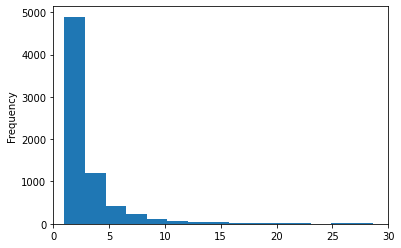

In [70]:
 df.author.value_counts().plot.hist(bins=100, xlim=(0, 30))

<AxesSubplot:>

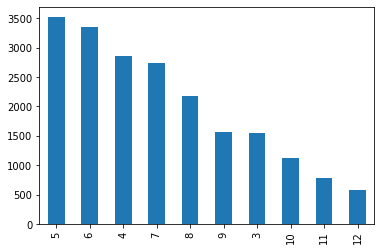

In [71]:
df.reading_time.value_counts()[:10].plot.bar()

In [72]:
 df.claps.describe()

count    22485.000000
mean       415.534356
std       1187.749359
min          0.000000
25%         54.000000
50%        142.000000
75%        355.000000
max      52000.000000
Name: claps, dtype: float64

<AxesSubplot:xlabel='year-week'>

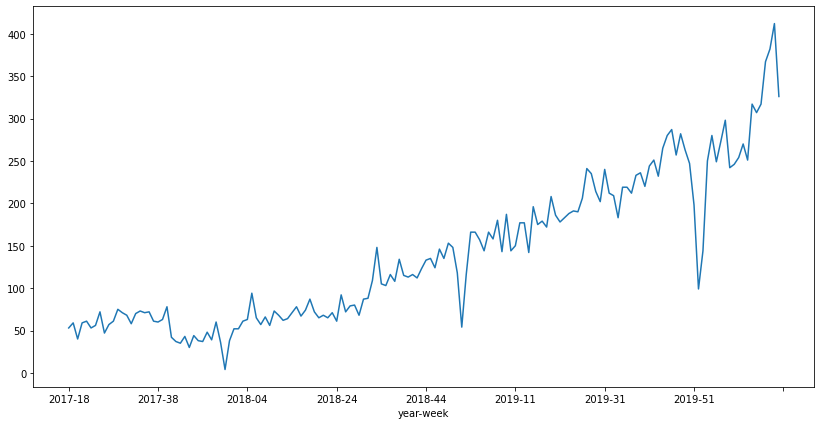

In [73]:
df.groupby("year-week").daily_rank.count().plot(figsize=(14, 7))

<AxesSubplot:xlabel='day_week_num', ylabel='claps'>

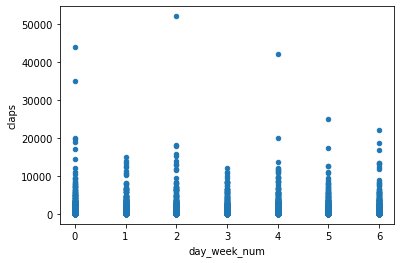

In [74]:
df.plot.scatter(x="day_week_num", y="claps")

### What separates overperformers from underperformers?

In [75]:
df_low = df[(df.daily_count >= 10) & (df.daily_perc >= 0.7)]

In [76]:
df_low.shape

(6696, 14)

In [77]:
df_up = df[(df.daily_count >= 10) & (df.daily_perc <= 0.3)] 
df_up.shape

(5878, 14)

In [78]:
 df_low.claps.describe()

count     6696.000000
mean        94.101553
std        219.101201
min          0.000000
25%         16.000000
50%         52.000000
75%        113.000000
max      12900.000000
Name: claps, dtype: float64

In [79]:
df_up.claps.describe()

count     5878.000000
mean       941.350289
std       1978.033638
min          4.000000
25%        207.000000
50%        436.000000
75%        907.750000
max      52000.000000
Name: claps, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:title={'center':'Overperformers'}>

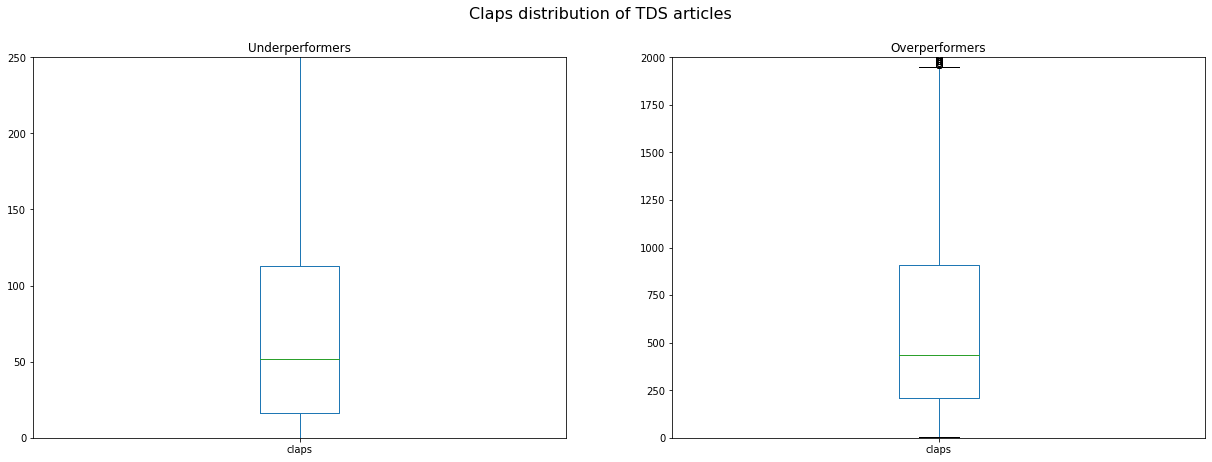

In [81]:
fig, ax = plt.subplots(1, 2, figsize=(21, 7)) 
fig.suptitle("Claps distribution of TDS articles", fontsize=16)
ax[0].set_title("Underperformers") 
df_low.claps.plot.box(ax=ax[0], ylim=(0, 250))
ax[1].set_title("Overperformers") 
df_up.claps.plot.box(ax=ax[1], ylim=(0, 2000))

### Is the secret in the title?

In [83]:
from sklearn.feature_extraction.text import CountVectorizer 
cv_low = CountVectorizer(ngram_range=(3, 3), stop_words=[])
cv_up = CountVectorizer(ngram_range=(3, 3), stop_words=[])


In [84]:
cv_low_fit = cv_low.fit_transform(df_low.title.values) 
cv_up_fit = cv_up.fit_transform(df_up.title.values)

In [86]:
word_list_low = cv_low.get_feature_names() 
count_list_low = cv_low_fit.toarray().sum(axis=0)

In [89]:
word_list_up = cv_up.get_feature_names() 
count_list_up = cv_up_fit.toarray().sum(axis=0)

In [91]:
df_freq_low = pd.DataFrame({"n_gram": word_list_low, "n": count_list_low}) 
df_freq_up = pd.DataFrame({"n_gram": word_list_up, "n": count_list_up})


In [92]:
 df_freq_up.sort_values("n")[::-1].head(10).set_index("n_gram")

,n
n_gram,
for data science,58
step by step,56
in machine learning,48
how to use,46
need to know,44
for data scientists,42
how to build,40
for machine learning,40
you need to,38


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:title={'center':'Overperformers'}>

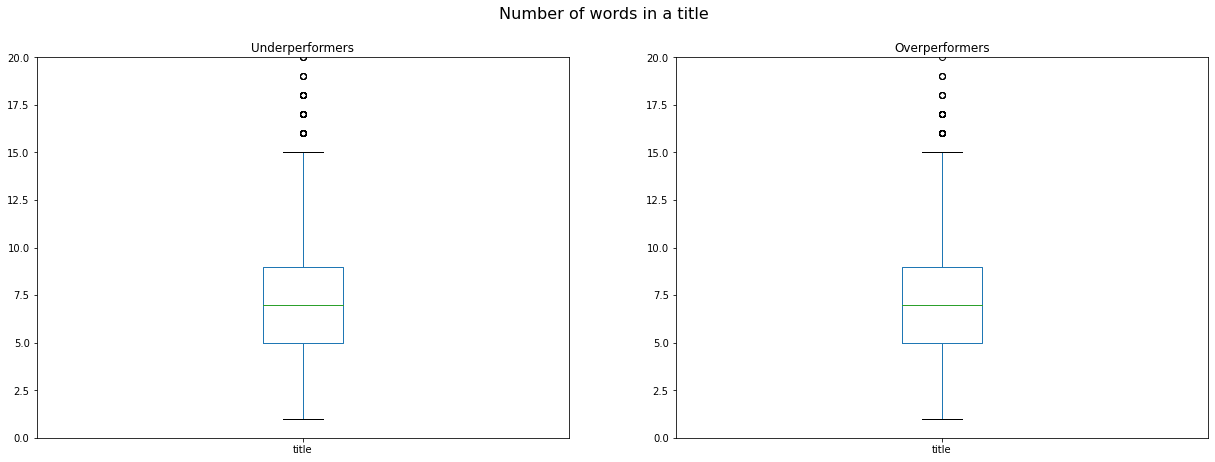

In [93]:
fig, ax = plt.subplots(1, 2, figsize=(21, 7)) 
fig.suptitle("Number of words in a title", fontsize=16)
ax[0].set_title("Underperformers")
df_low.title.str.split(" ").str.len().plot.box(ax=ax[0],ylim=(0, 20))
ax[1].set_title("Overperformers")
df_up.title.str.split(" ").str.len().plot.box(ax=ax[1], ylim=(0, 20))

### Is there a difference in the read time

<AxesSubplot:title={'center':'Overperformers'}>

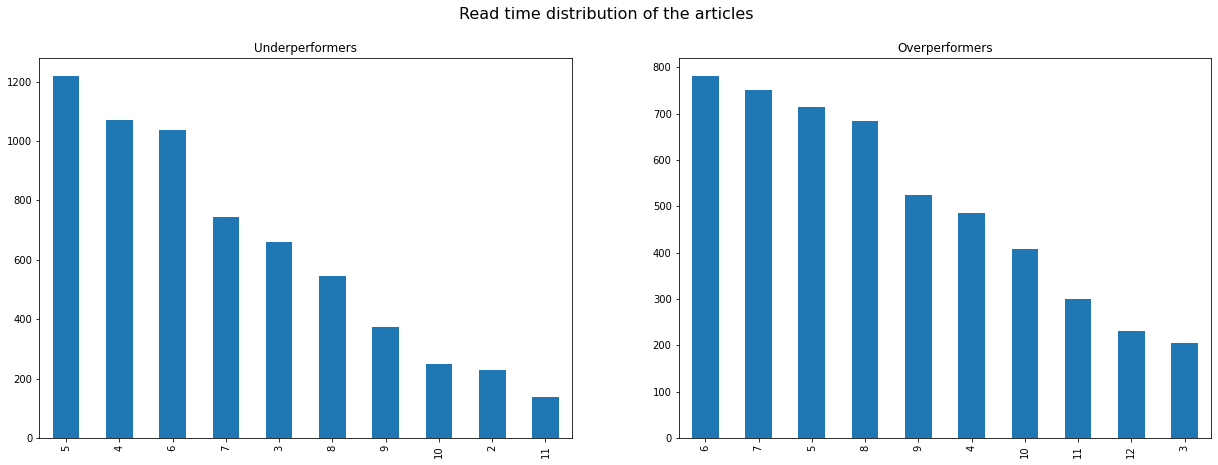

In [95]:
fig, ax = plt.subplots(1, 2, figsize=(21, 7))
fig.suptitle("Read time distribution of the articles", fontsize=16)
ax[0].set_title("Underperformers") 
df_low.reading_time.value_counts()[:10].plot.bar(ax=ax[0])
ax[1].set_title("Overperformers") 
df_up.reading_time.value_counts()[:10].plot.bar(ax=ax[1])